# T cells mapped to T2T version 2.0
# Pipeline to Extract and Analyze mC profiles from BAM files and look at Forward & Reverse strands

Modify the window of the input size

In [1]:
import sys
from pathlib import Path
from datetime import datetime

# Add the folder containing 'my_functions.py' to sys.path
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))

# Import the module or specific functions
# from /home/michalula/code/epiCausality/epiCode/utils/funcs_extract_mC_profiles_from_BAMs.py
# from funcs_extract_mC_profiles_from_BAMs import system_info, extract_from_bam
from funcs_extract_mC_profiles_from_BAMs import (
    system_info,
    get_reference_sequence,
    create_output_directory,
    extract_from_bam,
    process_extracted_reads,
    visualize_data,
    create_padded_reads,
    plot_padded_reads,
    save_padded_reads,
    process_extracted_reads_no_fully_unmethylated,
    create_padded_reads_no_fully_unmethylated
    # main,
)

modkit found with expected version 0.2.4


In [2]:
from funcs_analize_forward_reverse_extracted_mC_reads import analize_forward_reverse_CGs_pipeline

## Extract Extranded window around the 7KBs bp ROI of unedited primary T cells from Elain ES from nCATs nanopore experiment using minion R9

## Setting mC threshold in methylation calling confidance to 0.7

# Expend window size

In [ ]:
system_info()

experiment_name = "day28_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2"
threshold_mC =  0.7 #  0.9 #0.99
bam_path = "/home/michalula/data/cas9_nanopore/data/20250721_nCATs_Tcells_UNEDITED_Day28/merged_outputs/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20250721_nCATs_Tcells_UNEDITED_Day28_minion_merged_flowcells_output.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

# bam_path = "/home/michalula/data/cas9_nanopore/data/20241226_nCATs_K562_ZFPOFFpostSort_LOW70/pod5_converted_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_nCATs_K562_ZFPOFFpostSort_LOW70_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# "/home/michalula/data/cas9_nanopore/data/20241226_nCATs_K562_ZFPOFFpostSort_LOW70/pod5_converted_basecall/5mCG/to_t2t_v1_1/sort_align_t2t_v1_1_trim_20241226_nCATs_K562_ZFPOFFpostSort_LOW70_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
#  "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v1_1/sort_align_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

date_today = datetime.today().strftime('%Y-%m-%d')

# Make sure to use UpperCase fasta in the Reference genome, so that the mapping of the sequence is got giving erorrs
# awk '{if ($0 ~ /^>/) print $0; else print toupper($0)}' /home/michalula/data/ref_genomes/t2t_v2_0/chm13v2.0.fa > /home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta
# samtools faidx /home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta
ref_genome_path = Path('/home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta')
# '/home/michalula/data/ref_genomes/t2t_v2_0/chm13v2.0.fa')
reg_genome_version = "t2t_v2_0"
# t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'
region_chr = 'chr1'

# # 30 bps ROI:
# region_start = 206586162
# region_end = 206586192

# # Expend window size
# expand_window_size = 50 # 500 #500 #1500 # 0 
# expand_window_size
# print("Expend window size by 2 * ", expand_window_size)
# region_start = 206586162 - expand_window_size
# region_end = 206586192 + expand_window_size + 1

# # FULL 7 KB WINDOW: 1:206583000-206590000
# region_start = 206583000   # 206586162
# region_end = 206590000 # 20658619


# # EXACT cutting region 6785 pbs 
# # chr1:206,583,145-206,589,930
# region_start = 206583145    +30
# region_end = 206589930      -30 

# 6500bps: EXACT cutting region  
# chr1:206,583,334-206,589,873
region_start = 206583334    + 20
region_end = 206589874      - 20 
# CD55 TSS start: name: CD55-203
# # location: chr1:206586828-206606065 (+)
# 206586828 - 206583354, 206589854 - 206586828
# (before TSS: 3474, after TSS: 3026 bps)

region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
region_length = region_end - region_start
print("region_length", region_length)


save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

motifs=['CG,0']
ref_seq_list = get_reference_sequence(ref_genome_path, region_chr, region_start, region_end)

print('region_chr', region_chr)
print('region_start', region_start)
print('region_end', region_end)
print(f'{region_chr}:{region_start}-{region_end}')

System: Linux
Release: 6.8.0-60-generic
Version: #63~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Tue Apr 22 19:00:15 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
region_length 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTA

In [ ]:
# CD55 TSS start: name: CD55-203
# location: chr1:206586828-206606065 (+)
206586828 - 206583354, 206589854 - 206586828

# (3474, 3026)

(3474, 3026)

In [5]:
experiment_name

# region_start = 206586162
# region_end = 206586192

# region_end - region_start

'day28_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2'

Region length: 6500
No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.7 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20250721_nCATs_Tcells_UNEDITED_Day28_minion_merg…

          |    0%

          | Transferring 53 from reads.CG,0.txt into reads.combined_basemods.h5, new size 53   0% | 00:00<?

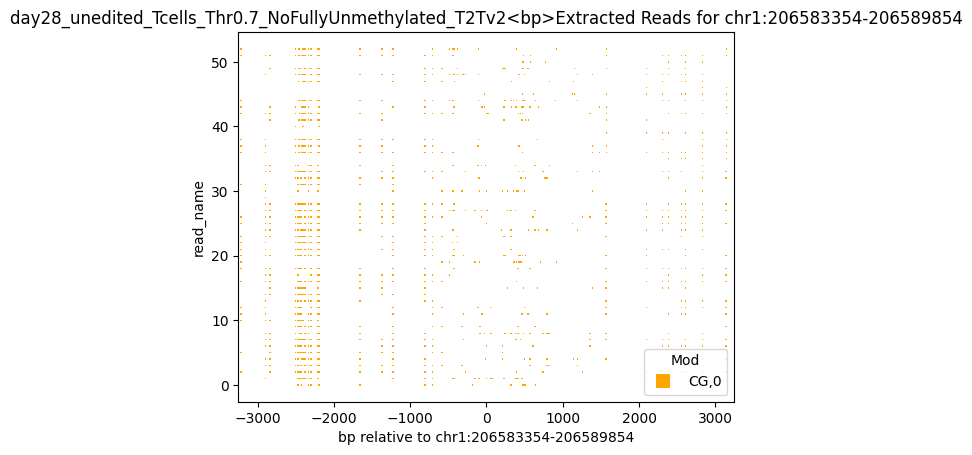

In [6]:
extract_file, extract_regions = extract_from_bam(
    experiment_name = experiment_name,
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)

In [7]:
extract_regions

PosixPath('dimelo_v2_output/extracted_reads/regions.processed.bed')

In [8]:
extract_file

PosixPath('dimelo_v2_output/extracted_reads/reads.combined_basemods.h5')

Found read coordinates: 53 reads
Unique read names with methylation: 53
Found 26 reads with full coverage
Reads with methylation data: 53
Overlap between full coverage and methylation: 26
After full coverage filtering: 662 reads with methylation data
Final result: 662 reads with methylation information out of 53 total reads


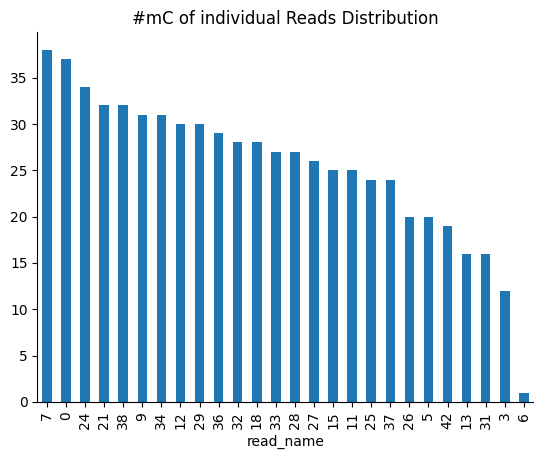

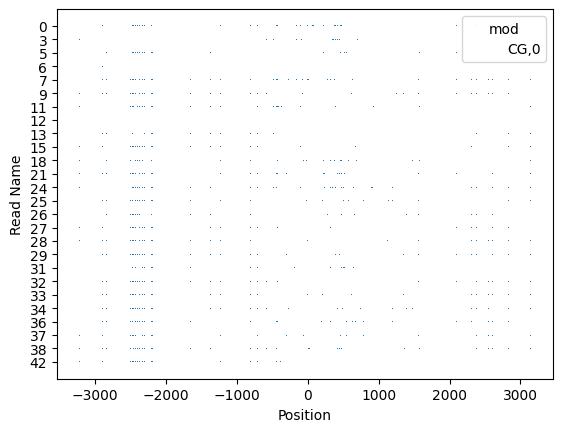

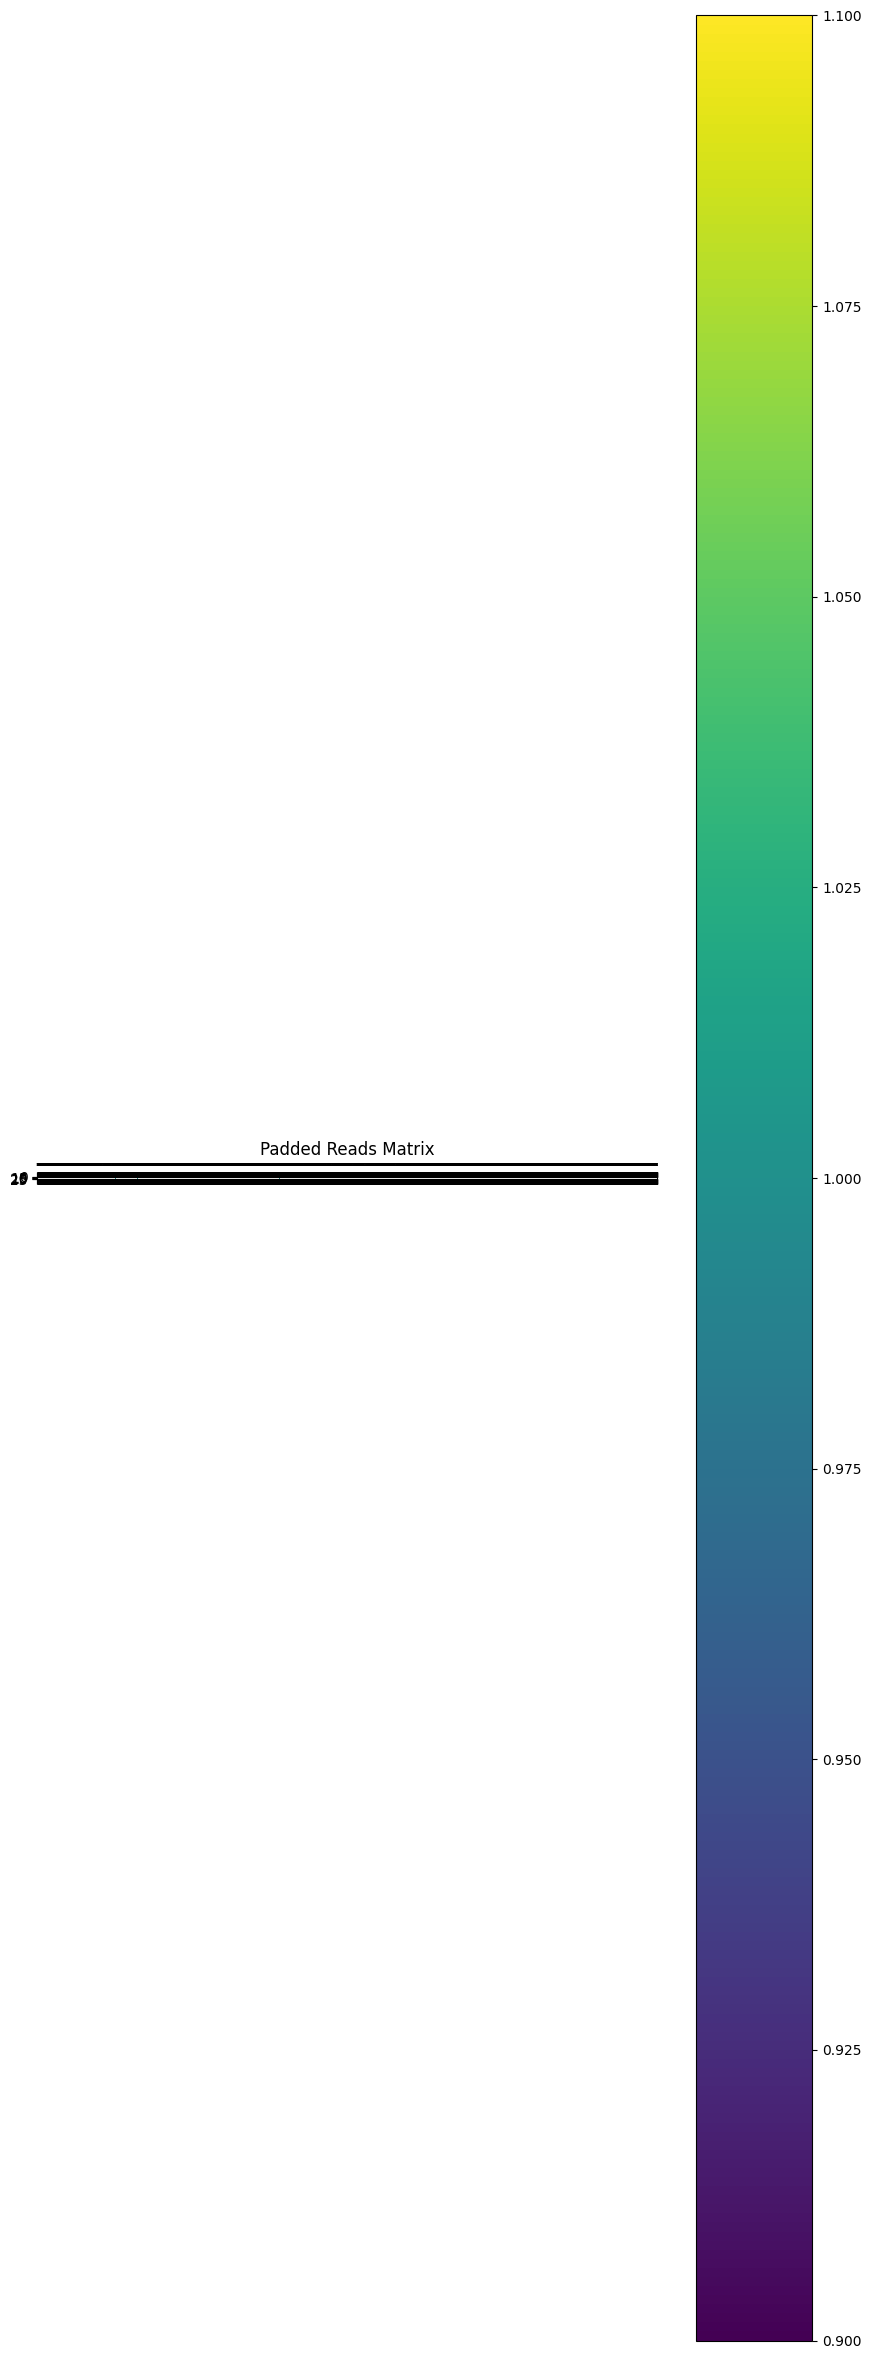

Padded reads saved to padded_reads_day28_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-08-02.npy


In [9]:
keep_full_coverage_reads_only=True

if extract_file:
    reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list, 
    keep_full_coverage_reads_only=keep_full_coverage_reads_only)
    visualize_data(reads_df)

    padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)


Padded reads loaded successfully.


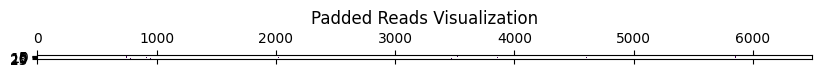

Visualization completed.
Region length: 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTAAAATTTCTTTTCTTTTTTTTTTTTTGAGACGGAGTTTTGCTCTCGTCCCCCAGGCTGGAGTGCAATGGCGCGATCTTGGCTCACTGCAACCTCCGCCTCCCAGGTTCAAGTGATTCTCCCGCCTCAGCCTCCCAAGTAGCTGGGATTACAGGCACCTGCCACAACGCCCAGCCAATTTTTGTATTTTTAGTAGAGACGGG

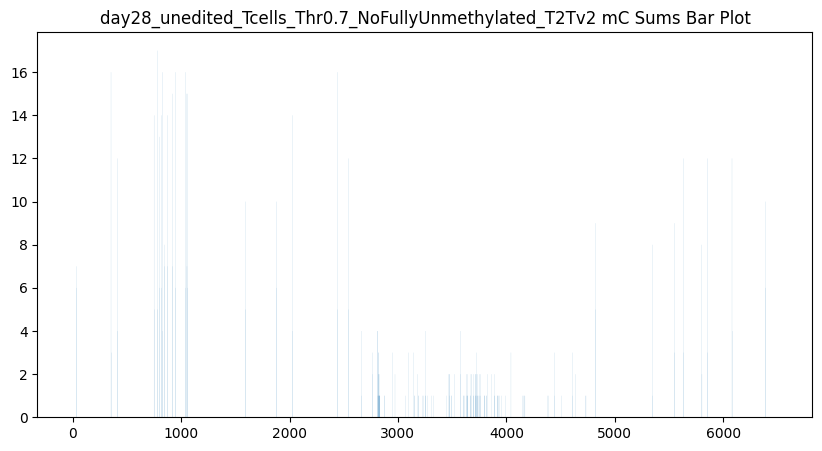

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


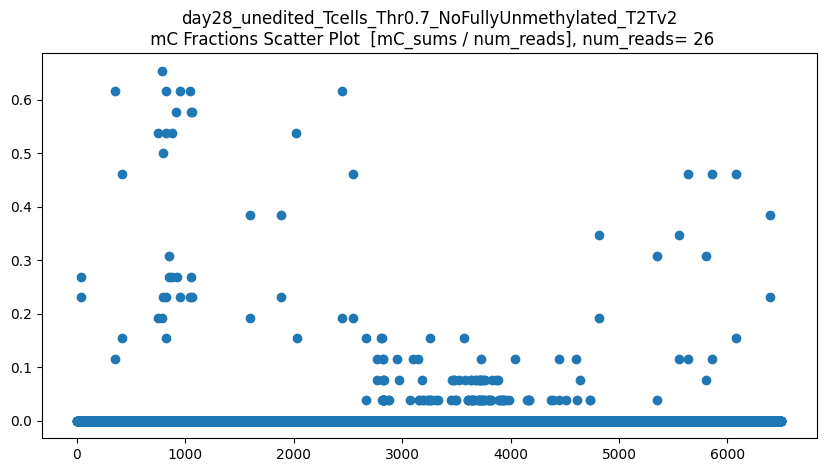

len(CGs_all) = 26
CGs_all.shape = (26, 137)
len(CGs_all_on_fwd_C_sums) = 6500
CGs_all_on_fwd_C_sums.shape = (6500,)


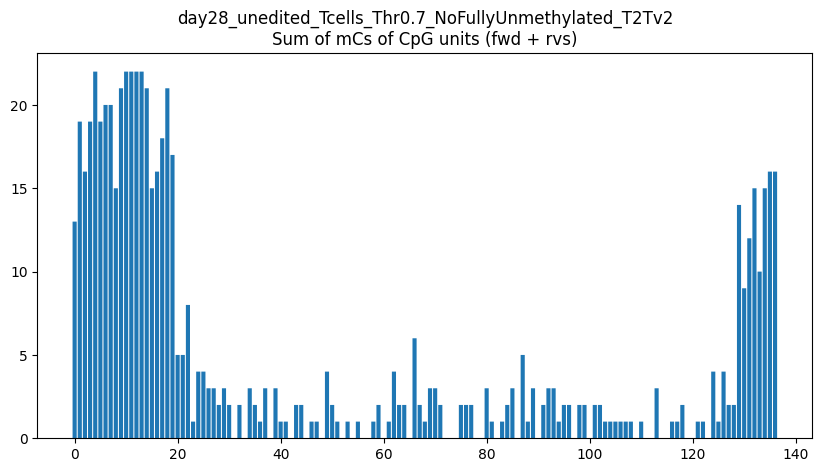

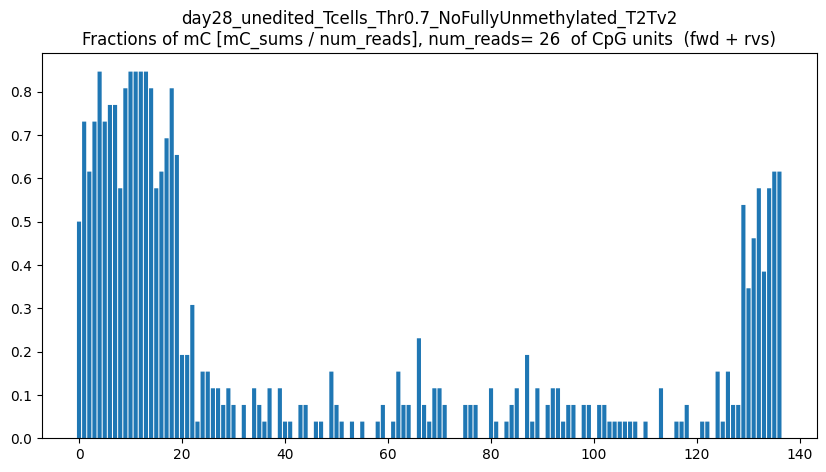

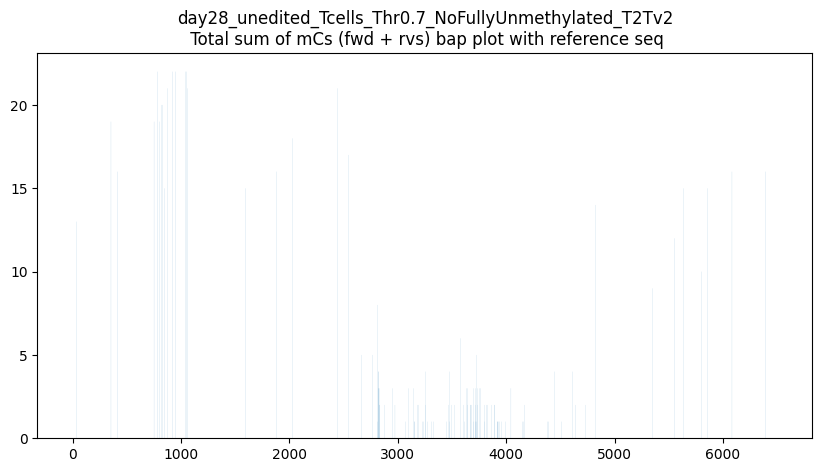

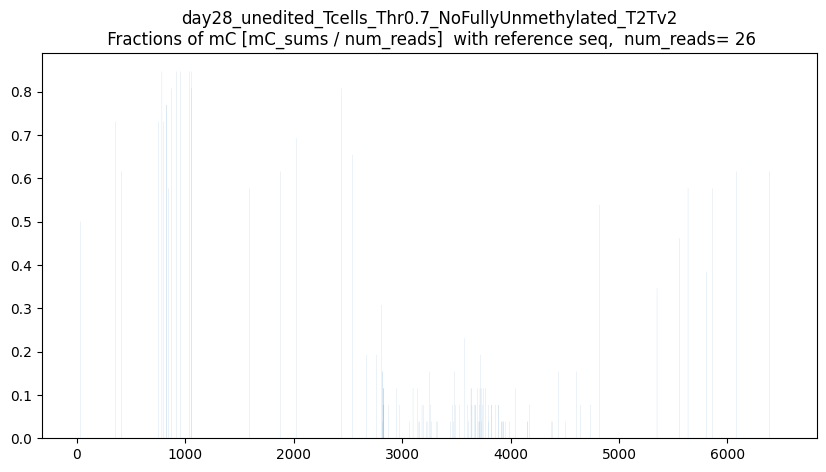

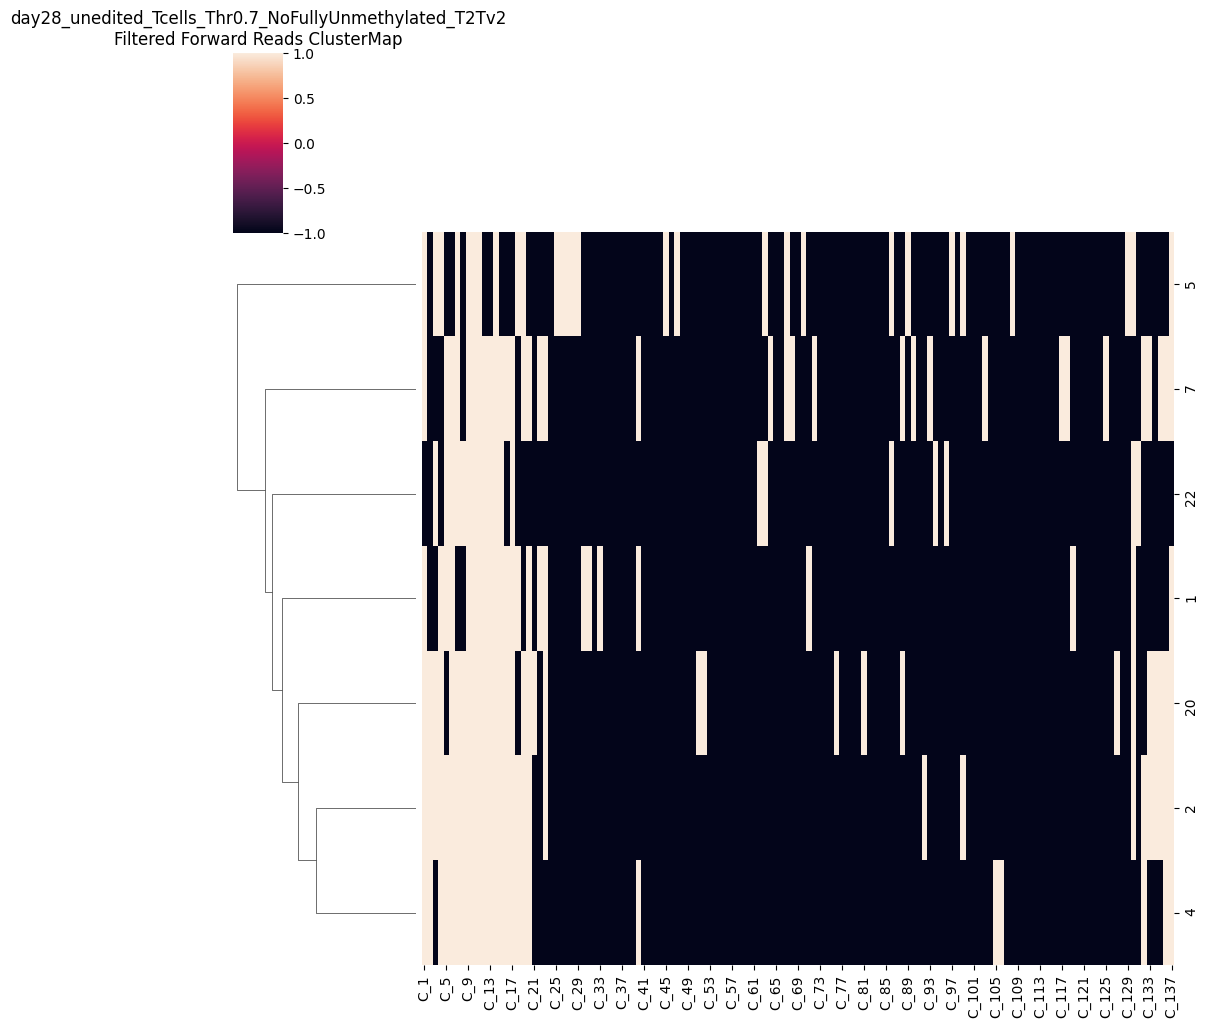

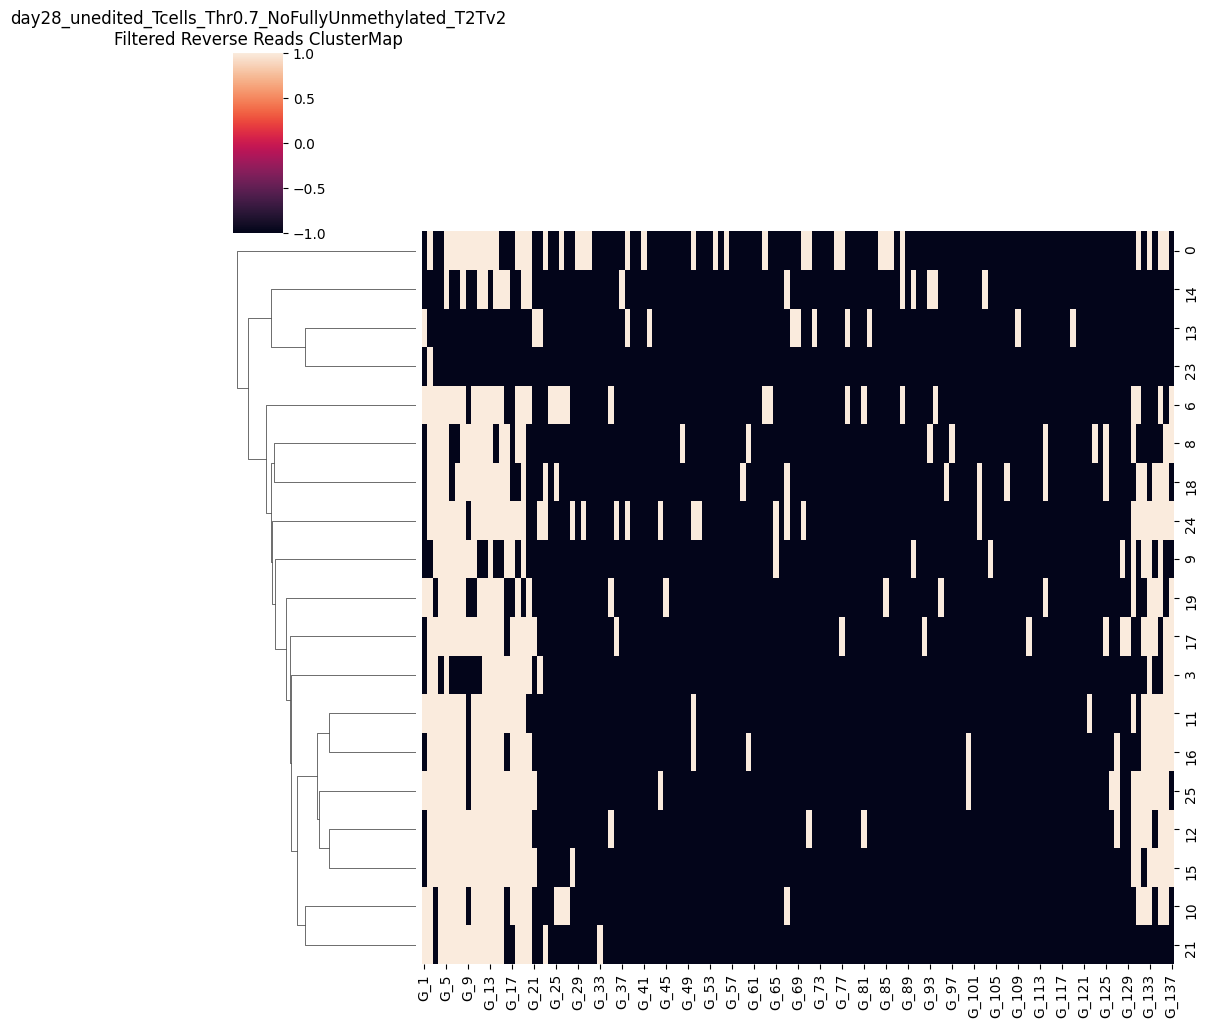

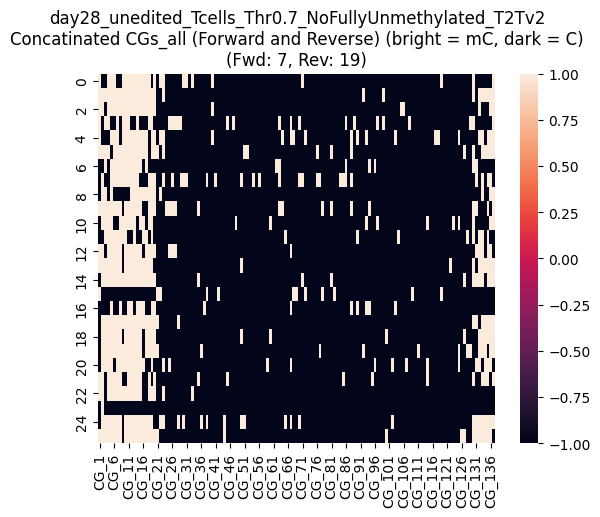

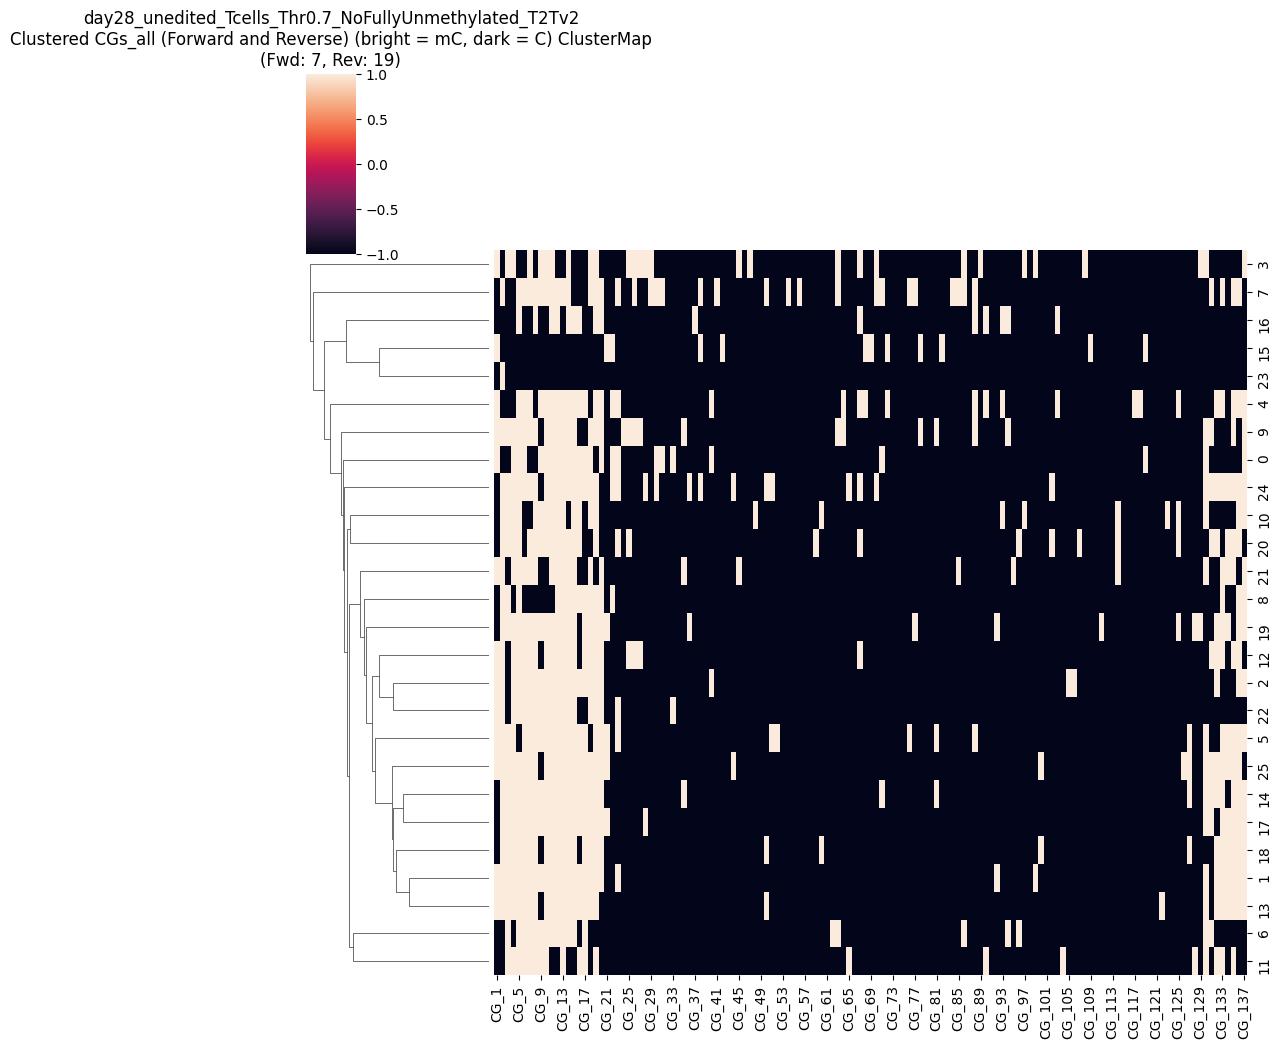

CGs_all saved as CG_137_padded_reads_day28_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-08-02_units_combined_numFWD7_numRVS19.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


In [10]:
"""
Main pipeline for processing and visualizing CpG units on forward and reverse strands 
"""
try:
    # Define constants
    # experiment_name = "unedited_T_primerES_nCATS"
    # save_folder_path = output_dir # "/home/michalula/code/epiCausality/epiCode/notebooks/dimelo_v2_output"
    # save_padded_reads_name_np = "padded_reads.npy"
    # ref_genome_file = "/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta"
    # region_chr = "chr1"
    # region_start = 206586162
    # region_end = 206586192

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates, CG_info_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


In [11]:
# CG_coordinates

In [12]:
CG_coordinates[68], CG_coordinates[69]

(206586966, 206586989)

In [13]:
# ref_seq_list

In [14]:
# CG_pair_idx

In [15]:
# region_start

In [16]:
# CG_coordinates

In [17]:
# # Calculate the genomic coordinates of the CGs
# cg_coordinates = [(region_start + idx) for idx in CG_pair_idx]

# # Print the genomic coordinates with CG order number
# for order, (idx, coord) in enumerate(zip(CG_pair_idx, cg_coordinates), start=1):
#     print(f"CG_{order} at index {idx} has genomic coordinate: {region_chr}:{coord}")

In [18]:
# cg_coordinates[22 - 1], cg_coordinates[23 - 1]

In [19]:
#206586929, 206586958)

### Results for ROI Extraction from Unedited cells:
From around   reads located near the ROI, 

only ~   reads have non-zery mC

(with 70% confidance at least one methylated C  in the mC call) 

Forward reads:   

Reverse reads: 

# Analyze the Edited cells from the same cells other sorted part 

System: Linux
Release: 6.8.0-60-generic
Version: #63~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Tue Apr 22 19:00:15 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
Region length: 6500
No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.7 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20250721_Day28_CROFF_T_cells_minion_merged_flowc…

          |    0%

          | Transferring 28 from reads.CG,0.txt into reads.combined_basemods.h5, new size 28   0% | 00:00<?

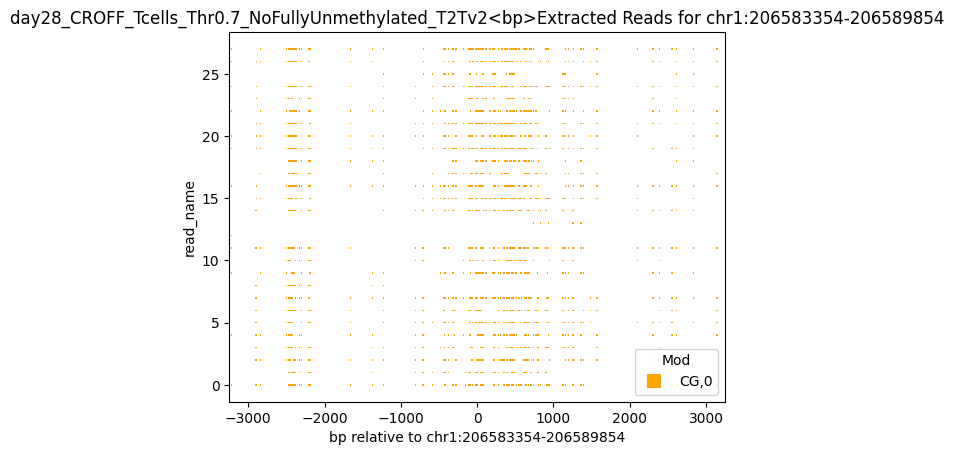

Found read coordinates: 28 reads
Unique read names with methylation: 28
Found 13 reads with full coverage
Reads with methylation data: 28
Overlap between full coverage and methylation: 13
After full coverage filtering: 919 reads with methylation data
Final result: 919 reads with methylation information out of 28 total reads


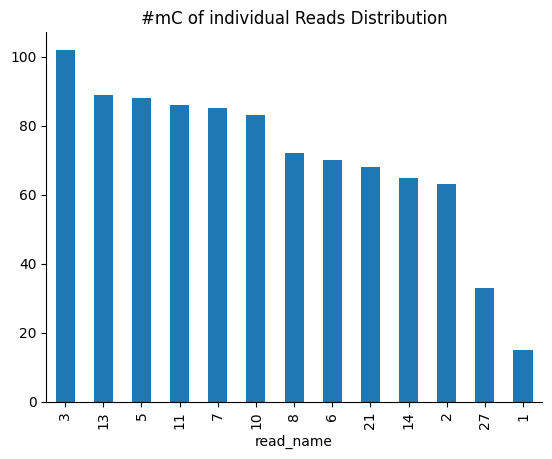

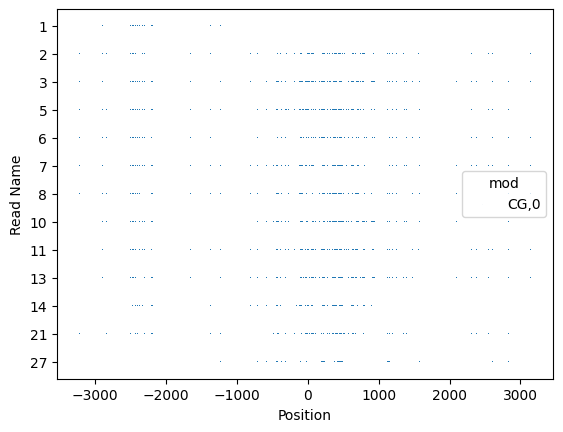

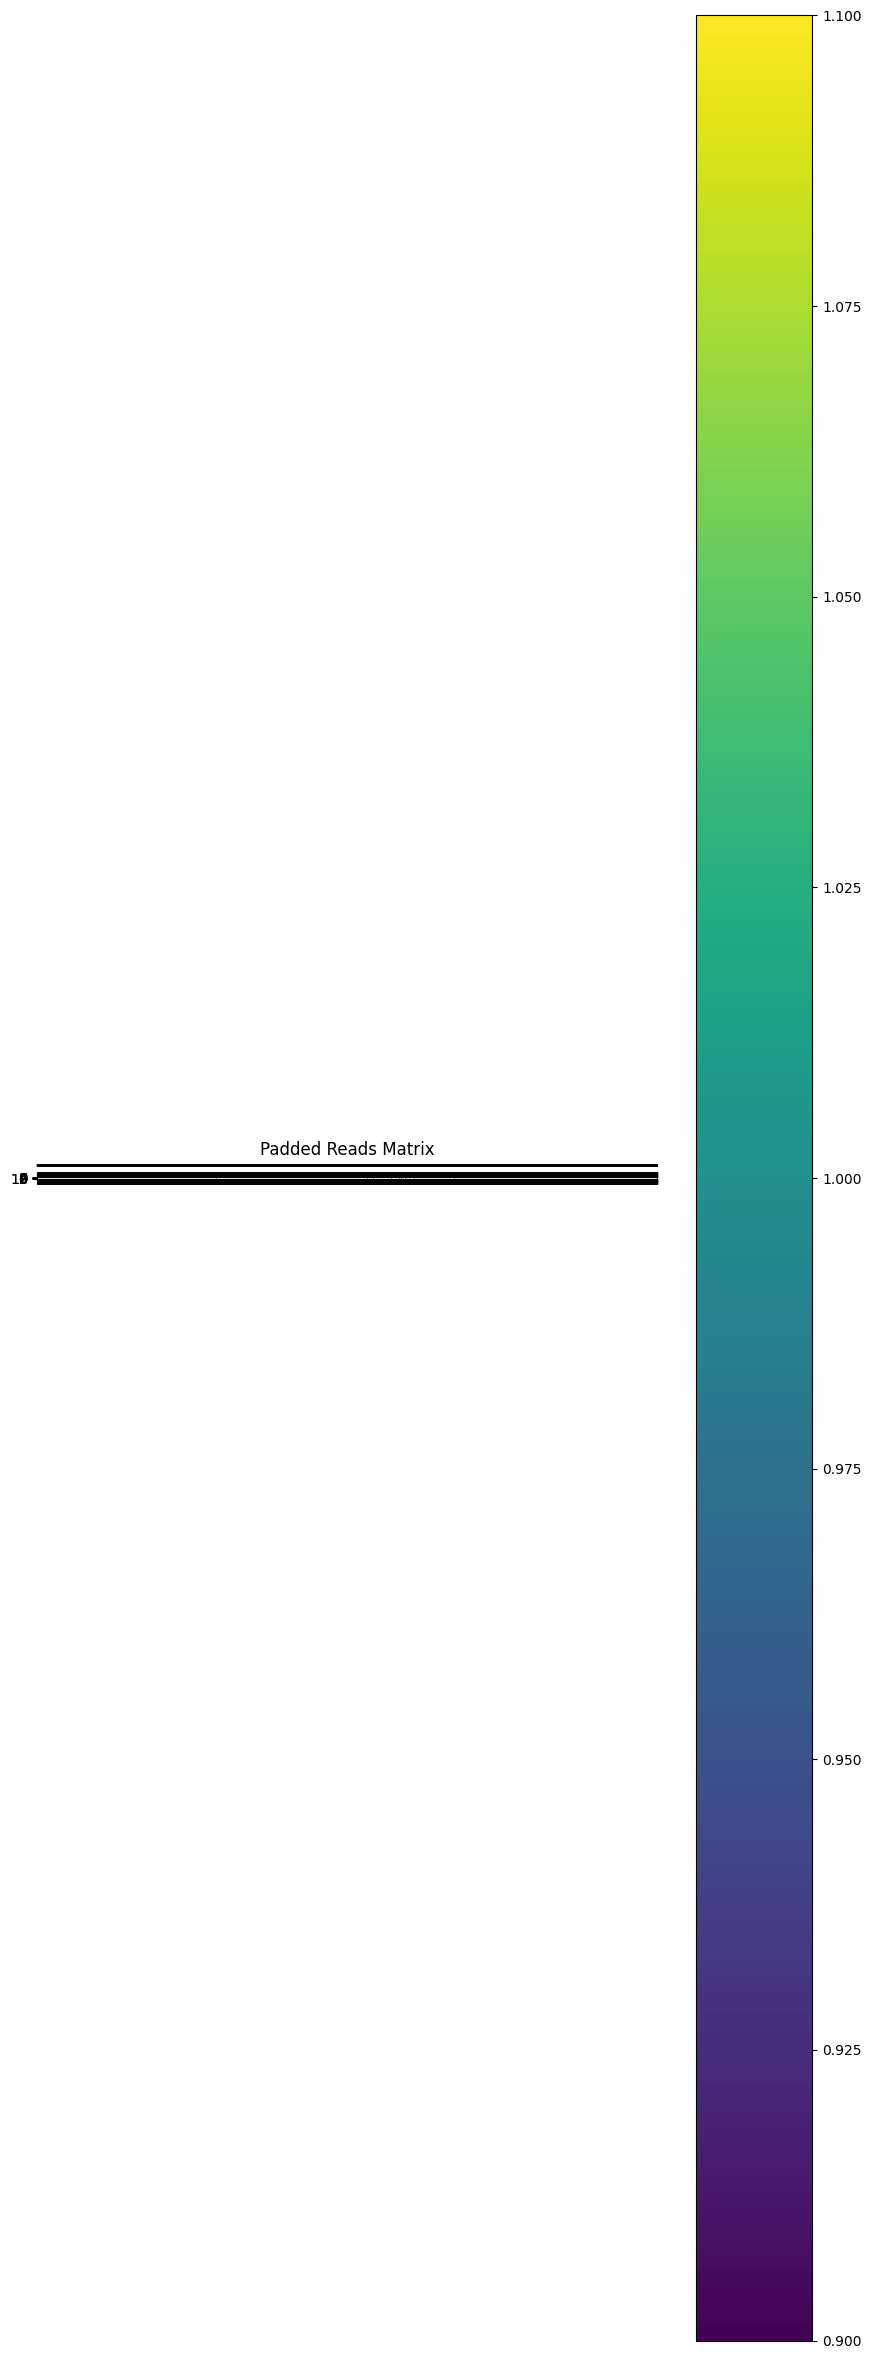

Padded reads saved to padded_reads_day28_CROFF_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-08-02.npy


In [20]:
system_info()

experiment_name = "day28_CROFF_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2" 

# threshold_mC = 0.7 # 0.9 # 0.75 # 0.99
bam_path = "/home/michalula/data/cas9_nanopore/data/20250721_nCATs_Tcells_CROFF_Day28/mergered_outputs/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20250721_Day28_CROFF_T_cells_minion_merged_flowcells_output.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# bam_path ="/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9/pod5_converted_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

# "/home/michalula/data/cas9_nanopore/data/20241226_nCATS_K562_ZFPOFFpostSort_HIGH/pod5_converted_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_nCATS_K562_ZFPOFFpostSort_HIGH_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

#  "/home/michalula/data/cas9_nanopore/data/20241226_nCATS_K562_ZFPOFFpostSort_HIGH/pod5_converted_basecall/5mCG/to_t2t_v1_1/sort_align_t2t_v1_1_trim_20241226_nCATS_K562_ZFPOFFpostSort_HIGH_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9/pod5_converted_basecall/5mCG/to_t2t_v1_1/sort_align_t2t_v1_1_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v1_1/sort_align_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

# date_today = datetime.today().strftime('%Y-%m-%d')
# ref_genome_v1_1_file = Path('/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta')
# reg_genome_version = "t2t_v1_1"
# t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'
# region_chr = 'chr1'
# region_start = 206586162
# # region_end = 206586192
# region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
# region_length = region_end - region_start
# print("region_length", region_length)


save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

# motifs=['CG,0']
# ref_seq_list = get_reference_sequence(ref_genome_v1_1_file, region_chr, region_start, region_end)


extract_file, extract_regions = extract_from_bam(
    experiment_name=experiment_name,
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)

# if extract_file:
#     reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
#     visualize_data(reads_df)

#     padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
#     if padded_reads is not None:
#         plot_padded_reads(padded_reads, ref_seq_list)
#         save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)

keep_unmethylated_reads = False
if extract_file:
    if not keep_unmethylated_reads:
        reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)

        padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    else:
        reads_df, regions_dict = process_extracted_reads_no_fully_unmethylated(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)
        padded_reads = create_padded_reads_no_fully_unmethylated(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)

In [21]:
save_padded_reads_name_np

'padded_reads_day28_CROFF_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-08-02.npy'

Padded reads loaded successfully.


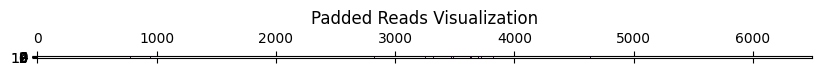

Visualization completed.
Region length: 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTAAAATTTCTTTTCTTTTTTTTTTTTTGAGACGGAGTTTTGCTCTCGTCCCCCAGGCTGGAGTGCAATGGCGCGATCTTGGCTCACTGCAACCTCCGCCTCCCAGGTTCAAGTGATTCTCCCGCCTCAGCCTCCCAAGTAGCTGGGATTACAGGCACCTGCCACAACGCCCAGCCAATTTTTGTATTTTTAGTAGAGACGGG

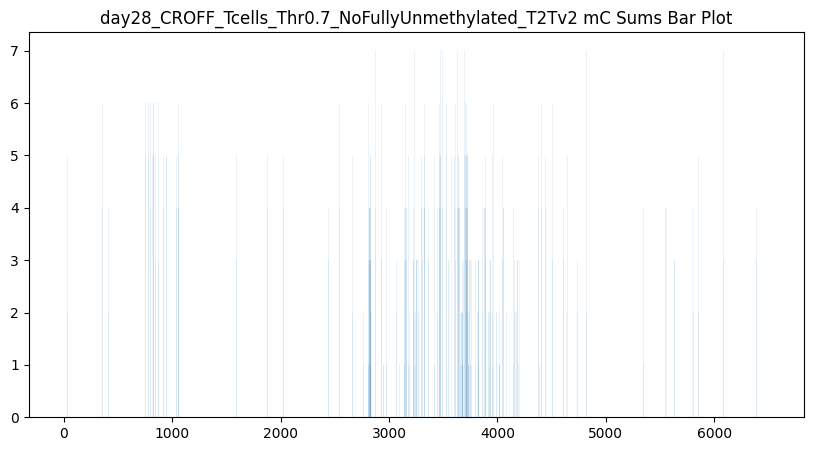

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


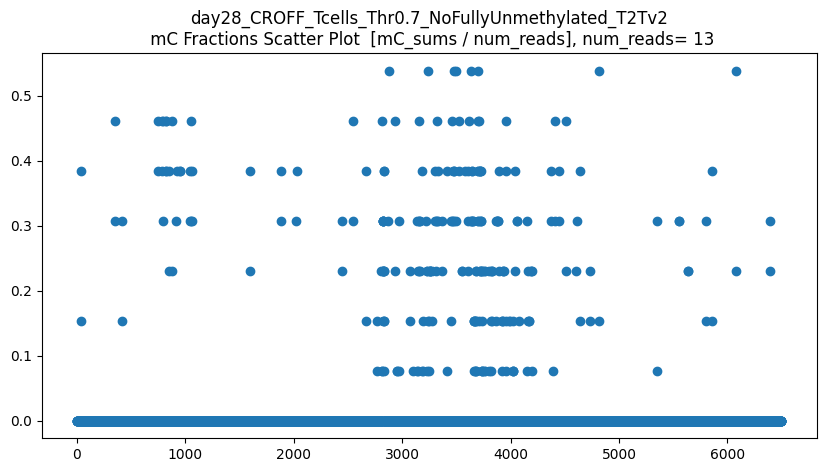

len(CGs_all) = 13
CGs_all.shape = (13, 137)
len(CGs_all_on_fwd_C_sums) = 6500
CGs_all_on_fwd_C_sums.shape = (6500,)


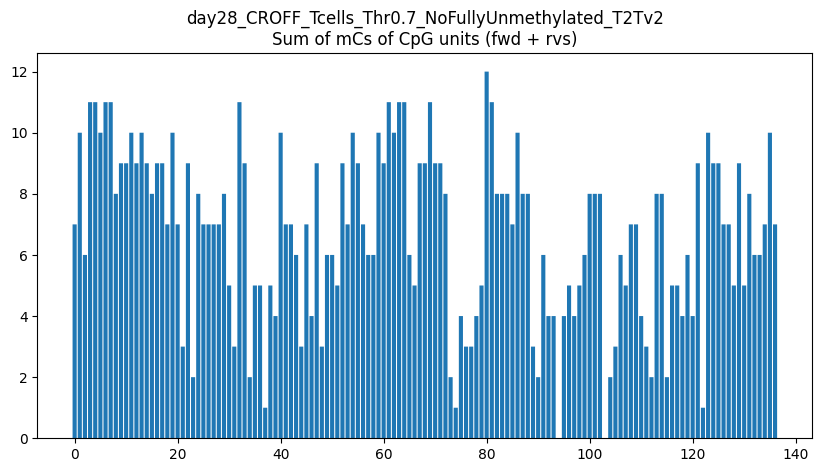

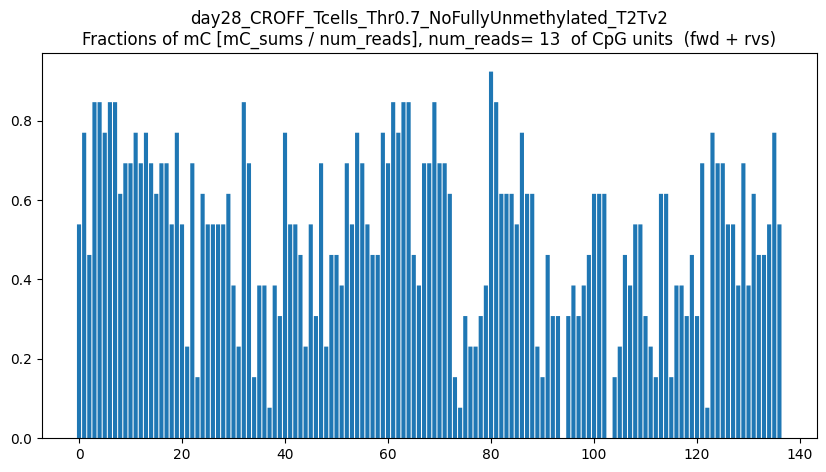

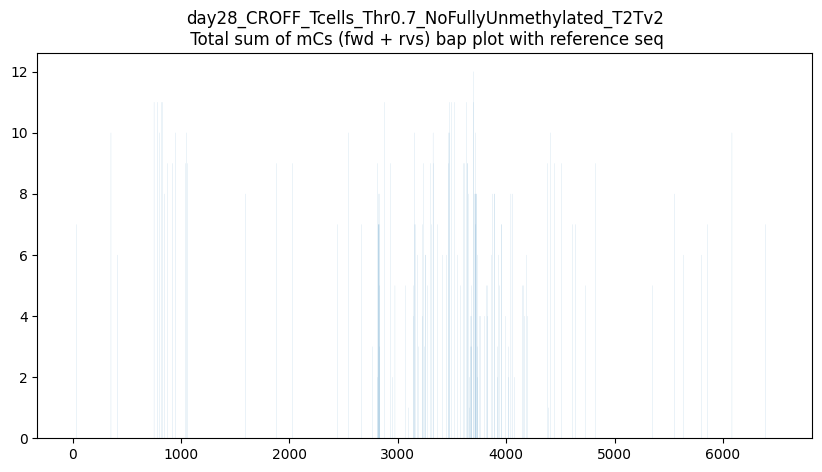

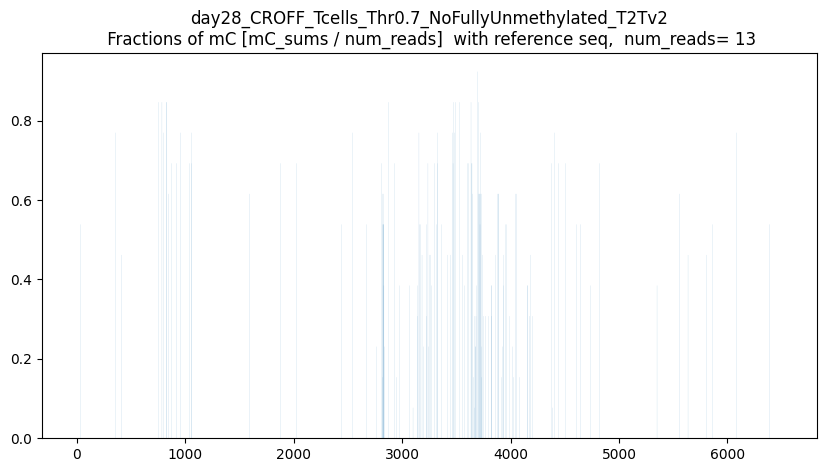

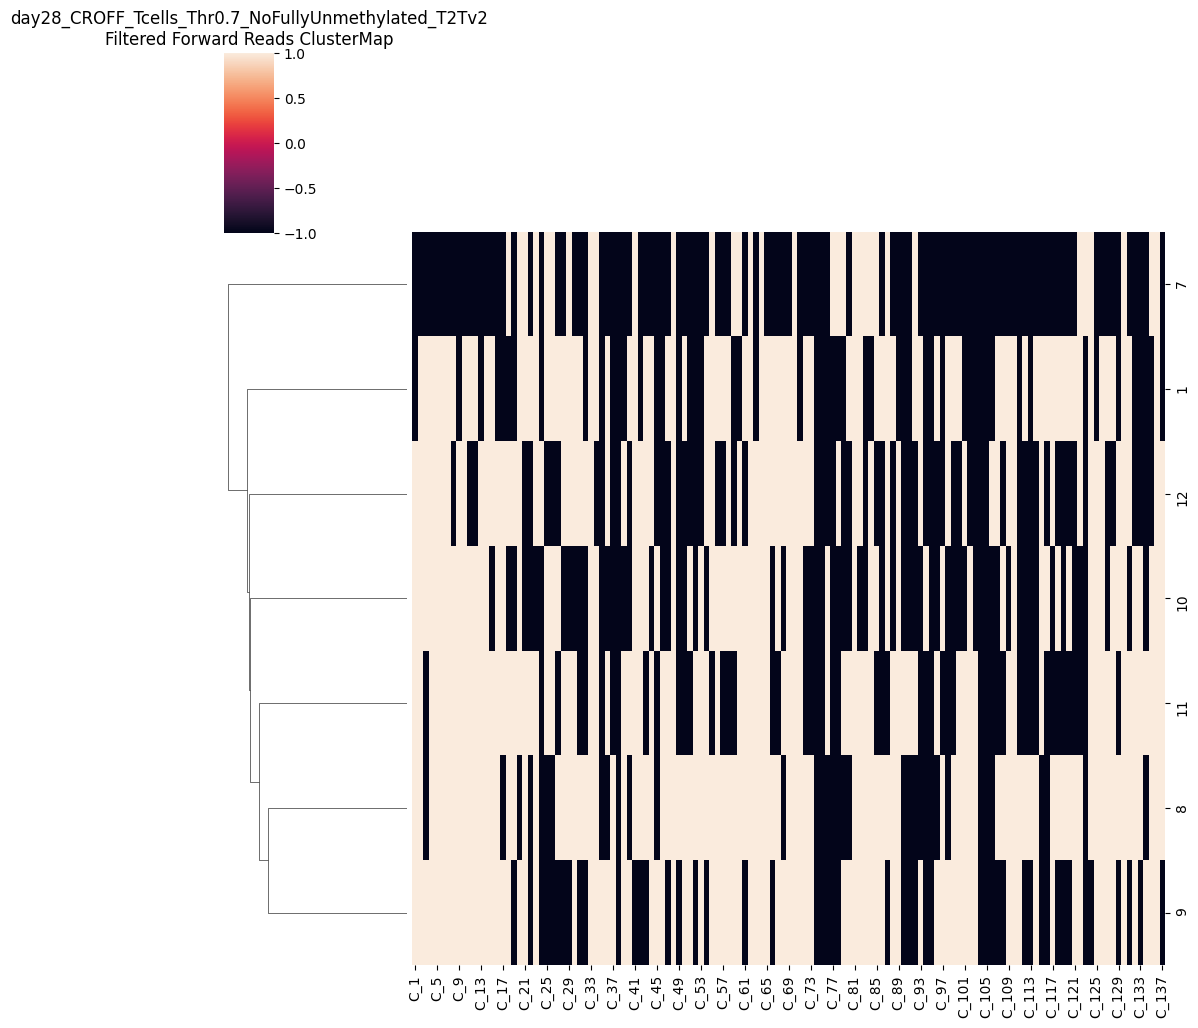

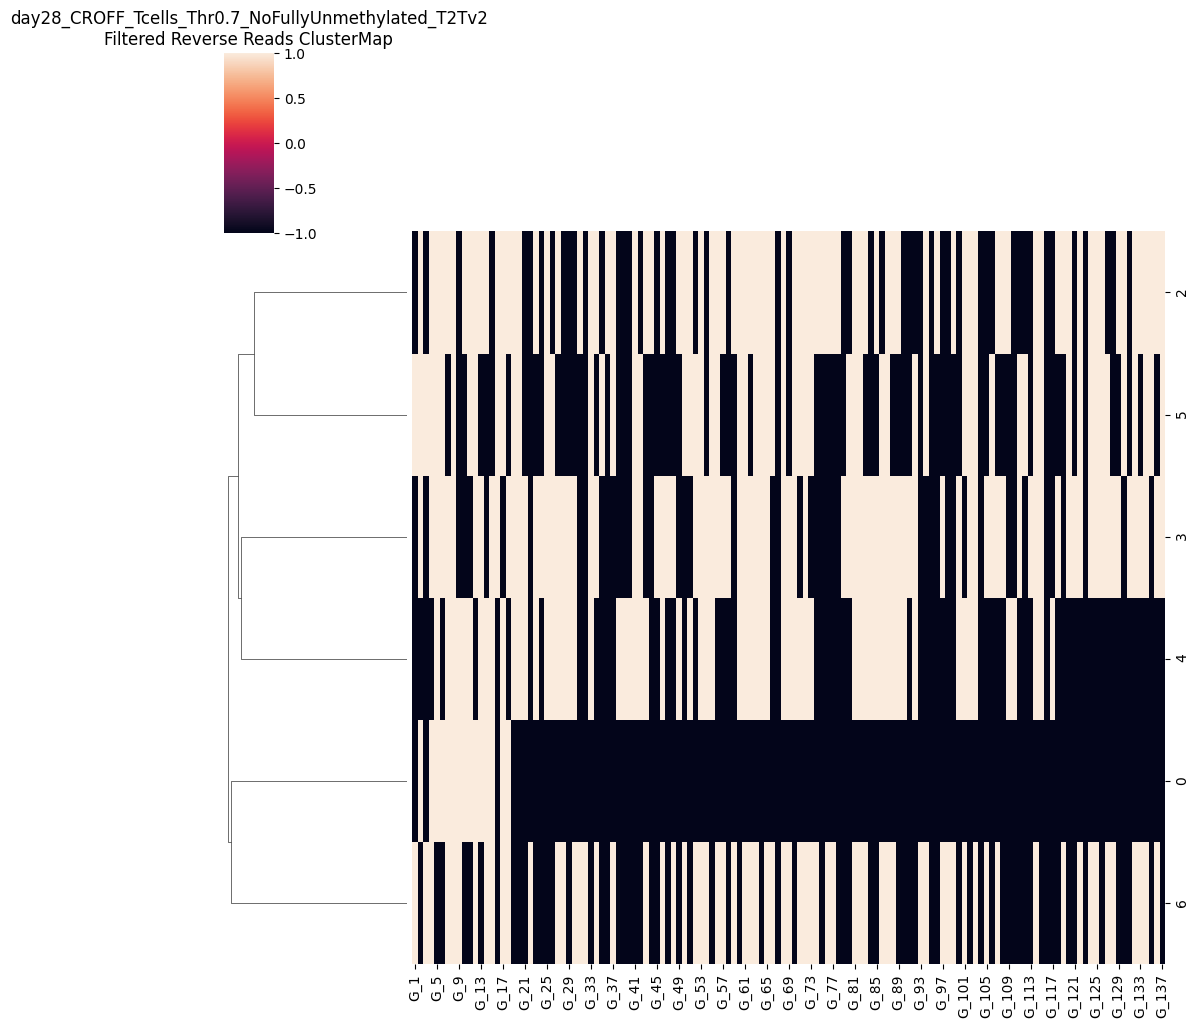

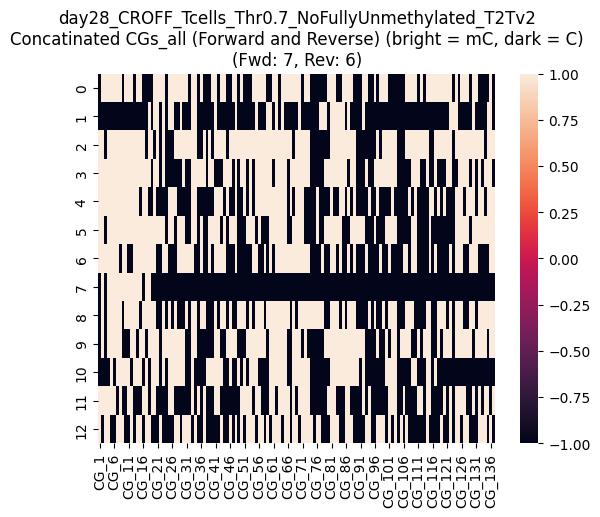

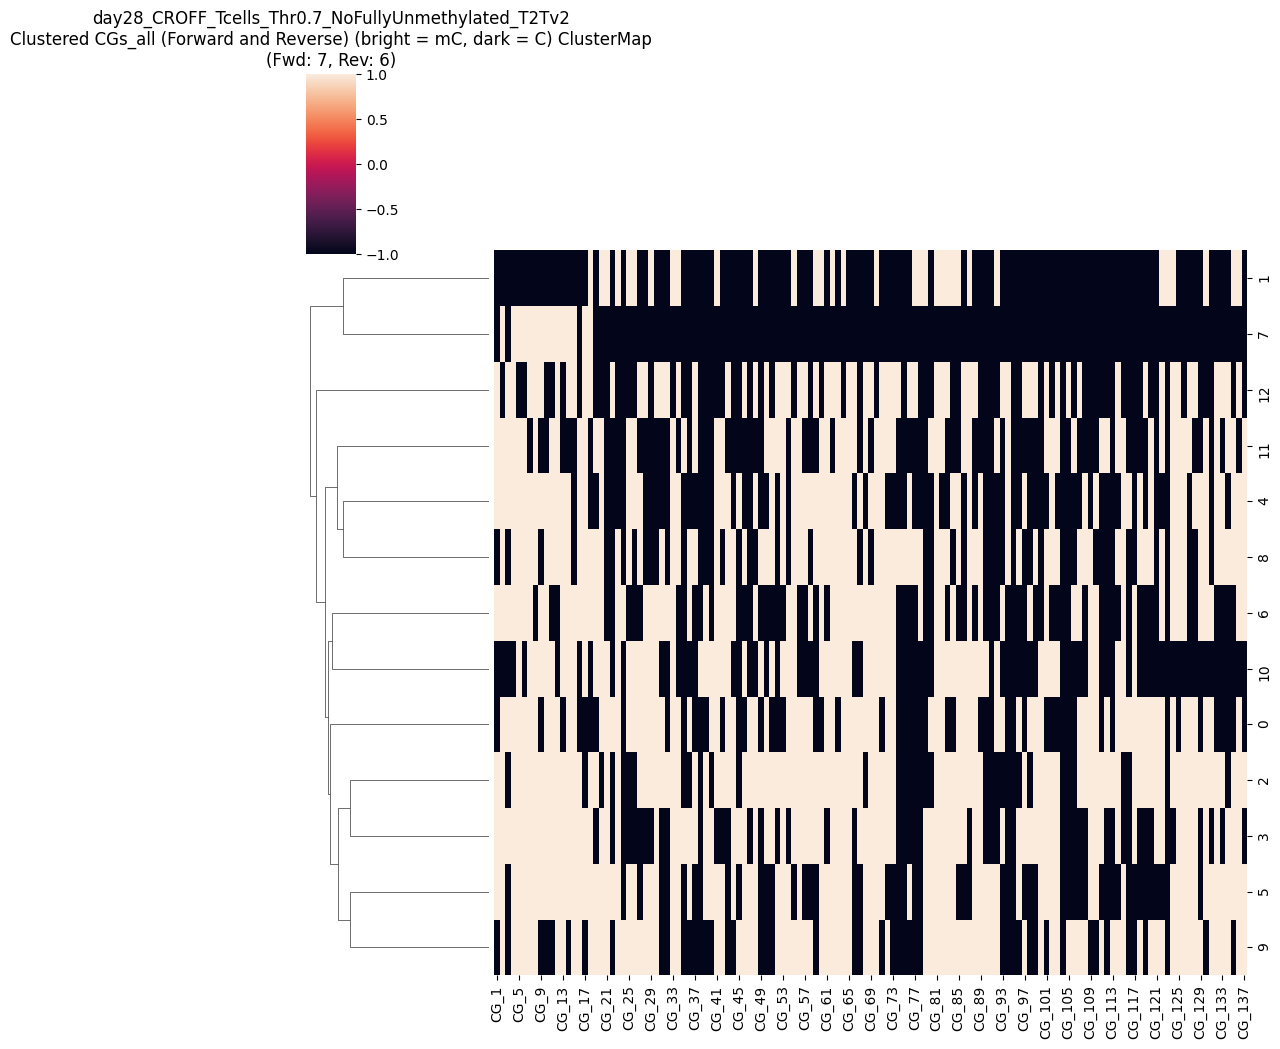

CGs_all saved as CG_137_padded_reads_day28_CROFF_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-08-02_units_combined_numFWD7_numRVS6.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


In [22]:
"""
Main pipeline for processing and visualizing CpG units on forward and reverse strands 
"""
try:
    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates, CG_info_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


In [23]:
# """
# Main pipeline for processing and visualizing CpG units on forward and reverse strands 
# """
# try:
#     # Define constants
#     # experiment_name = "unedited_T_primerES_nCATS"
#     # save_folder_path = output_dir # "/home/michalula/code/epiCausality/epiCode/notebooks/dimelo_v2_output"
#     # save_padded_reads_name_np = "padded_reads.npy"
#     # ref_genome_file = "/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta"
#     # region_chr = "chr1"
#     # region_start = 206586162
#     # region_end = 206586192

#     # Process pipeline
#     CGs_all_silenced, C_fwd_df_silenced, G_revs_df_silenced, padded_reads_df_silenced = analize_forward_reverse_CGs_pipeline(
#         experiment_name=experiment_name, save_folder_path=output_dir, 
#         save_padded_reads_name_np=save_padded_reads_name_np, 
#         ref_genome_file=ref_genome_v1_1_file, region_chr=region_chr, region_start=region_start, region_end=region_end
#     )

#     print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
#     # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

# except Exception as e:
#     print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


### ROI Extraction Results from  Silenced sorted cells :
From around   reads located near the ROI, 

 ~  reads have non-zery mC 
 
 (with 70% confidance in at least one methylated C the mC calls ) 

Forward reads:  

Reverse reads:  


# Change the mC threshold to 0.9 - only keep very confident mC values


System: Linux
Release: 6.8.0-60-generic
Version: #63~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Tue Apr 22 19:00:15 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
region_length 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTA

          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20250721_nCATs_Tcells_UNEDITED_Day28_minion_merg…

          |    0%

          | Transferring 53 from reads.CG,0.txt into reads.combined_basemods.h5, new size 53   0% | 00:00<?

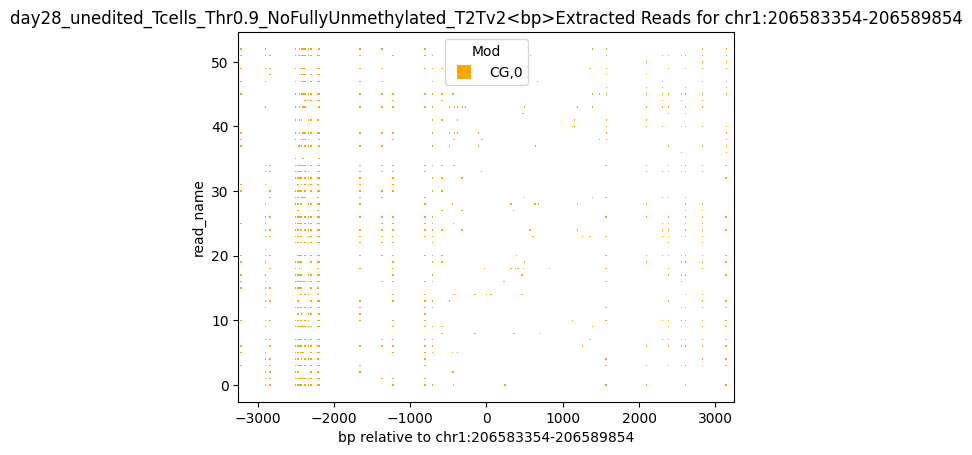

Found read coordinates: 53 reads
Unique read names with methylation: 53
Found 26 reads with full coverage
Reads with methylation data: 53
Overlap between full coverage and methylation: 26
After full coverage filtering: 480 reads with methylation data
Final result: 480 reads with methylation information out of 53 total reads


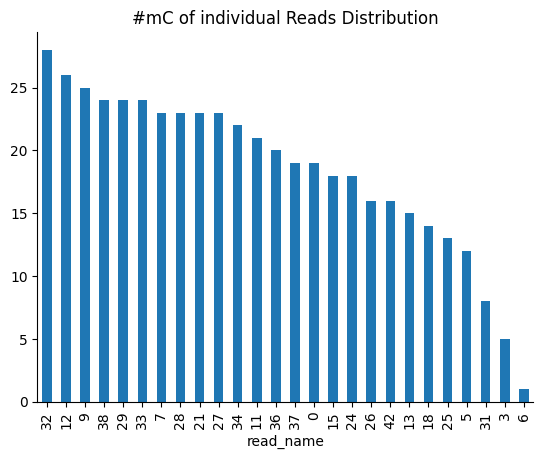

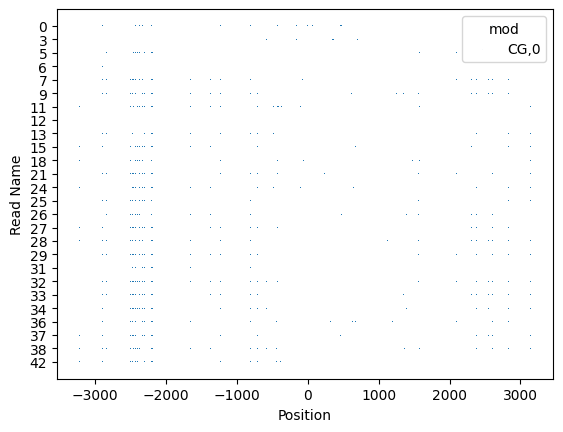

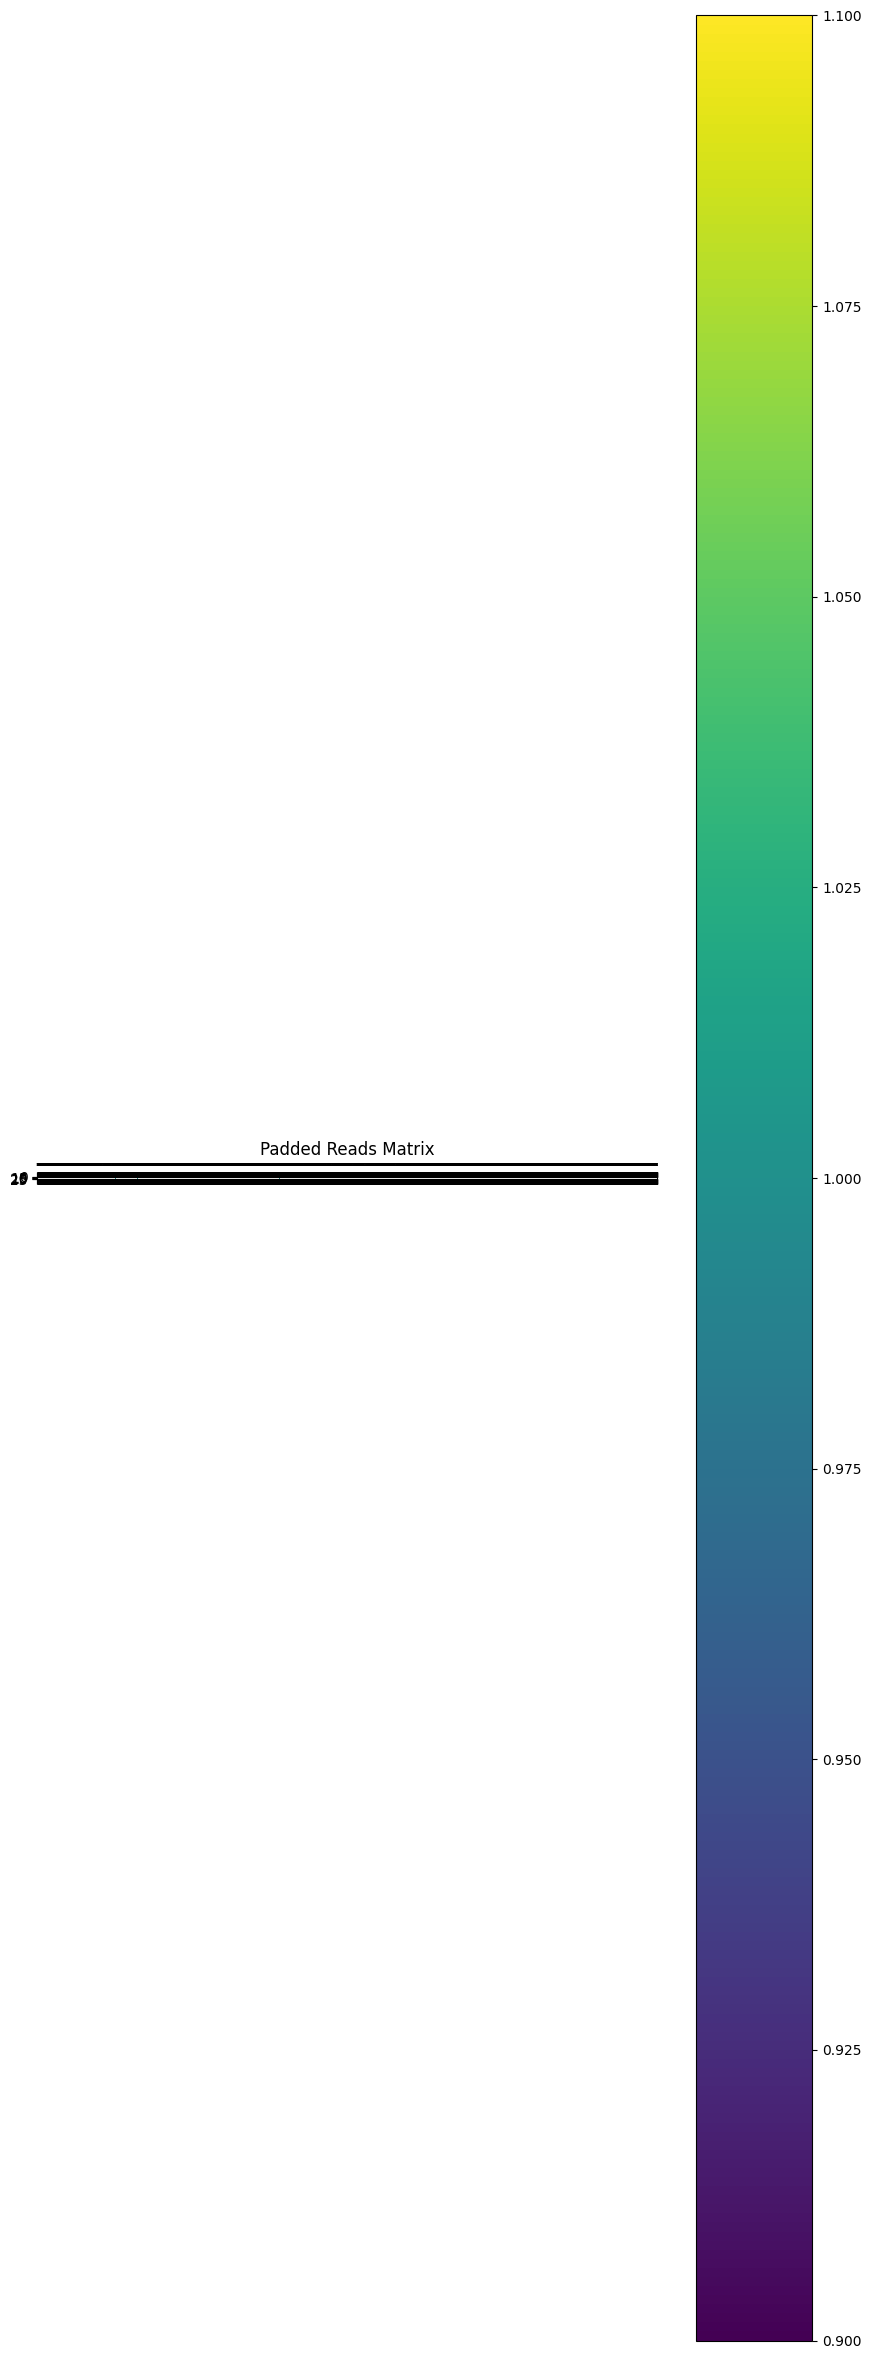

Padded reads saved to padded_reads_day28_unedited_Tcells_Thr0.9_NoFullyUnmethylated_T2Tv2_mCthresh0.9_t2t_v2_0_chr1:206583354-206589854_2025-08-02.npy


In [24]:
system_info()


experiment_name = "day28_unedited_Tcells_Thr0.9_NoFullyUnmethylated_T2Tv2"
threshold_mC =  0.9 #  0.9 #0.99
bam_path = "/home/michalula/data/cas9_nanopore/data/20250721_nCATs_Tcells_UNEDITED_Day28/merged_outputs/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20250721_nCATs_Tcells_UNEDITED_Day28_minion_merged_flowcells_output.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

# bam_path = "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# bam_path = "/home/michalula/data/cas9_nanopore/data/20241226_nCATs_K562_ZFPOFFpostSort_LOW70/pod5_converted_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_nCATs_K562_ZFPOFFpostSort_LOW70_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# "/home/michalula/data/cas9_nanopore/data/20241226_nCATs_K562_ZFPOFFpostSort_LOW70/pod5_converted_basecall/5mCG/to_t2t_v1_1/sort_align_t2t_v1_1_trim_20241226_nCATs_K562_ZFPOFFpostSort_LOW70_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

date_today = datetime.today().strftime('%Y-%m-%d')

# ref_genome_v1_1_file = Path('/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta')
# reg_genome_version = "t2t_v1_1"
# # t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'
# region_chr = 'chr1'
# region_start = 206586162
# region_end = 206586192
# region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
# region_length = region_end - region_start
print("region_length", region_length)


save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

motifs=['CG,0']
ref_seq_list = get_reference_sequence(ref_genome_path, region_chr, region_start, region_end)


extract_file, extract_regions = extract_from_bam(
    experiment_name=experiment_name,
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)

keep_unmethylated_reads = False

if extract_file:
    if not keep_unmethylated_reads:
        reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)

        padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    else:
        reads_df, regions_dict = process_extracted_reads_no_fully_unmethylated(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)
        padded_reads = create_padded_reads_no_fully_unmethylated(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)

Padded reads loaded successfully.


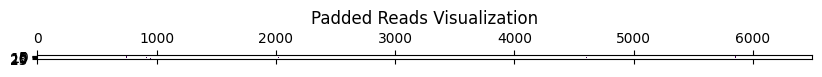

Visualization completed.
Region length: 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTAAAATTTCTTTTCTTTTTTTTTTTTTGAGACGGAGTTTTGCTCTCGTCCCCCAGGCTGGAGTGCAATGGCGCGATCTTGGCTCACTGCAACCTCCGCCTCCCAGGTTCAAGTGATTCTCCCGCCTCAGCCTCCCAAGTAGCTGGGATTACAGGCACCTGCCACAACGCCCAGCCAATTTTTGTATTTTTAGTAGAGACGGG

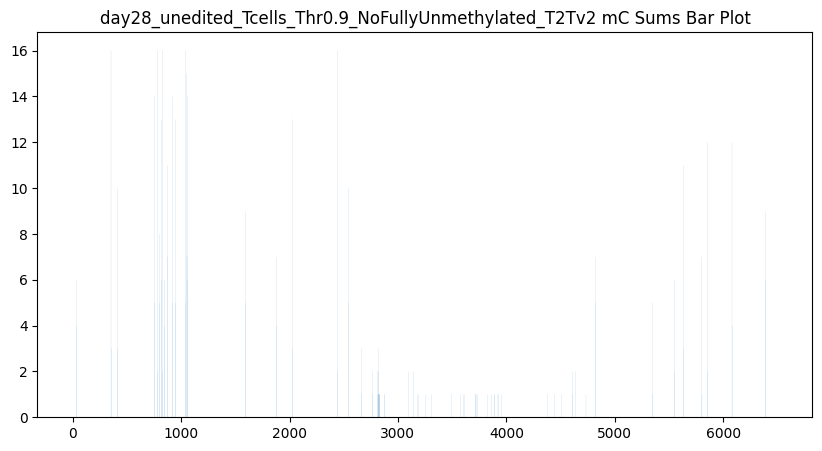

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


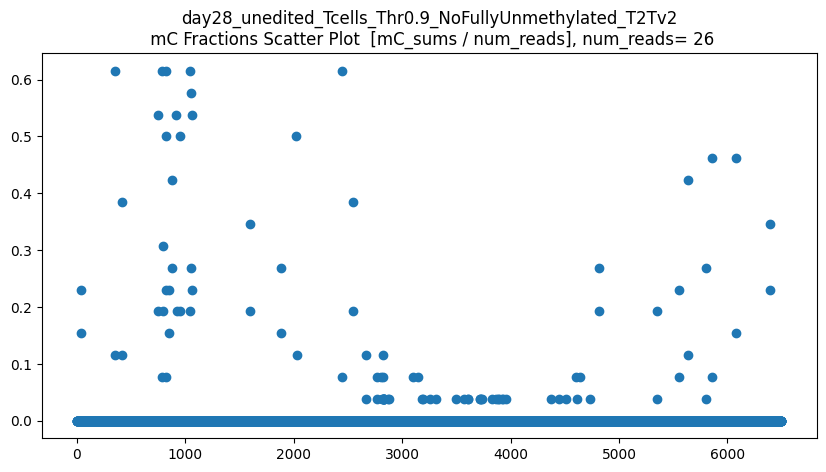

len(CGs_all) = 26
CGs_all.shape = (26, 137)
len(CGs_all_on_fwd_C_sums) = 6500
CGs_all_on_fwd_C_sums.shape = (6500,)


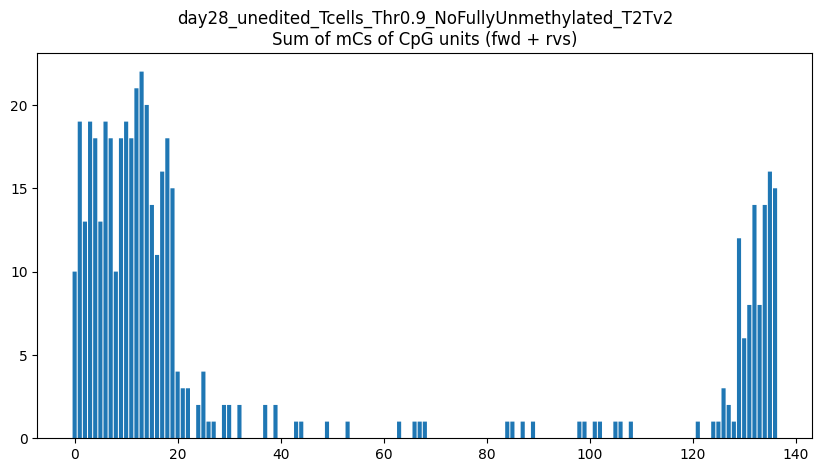

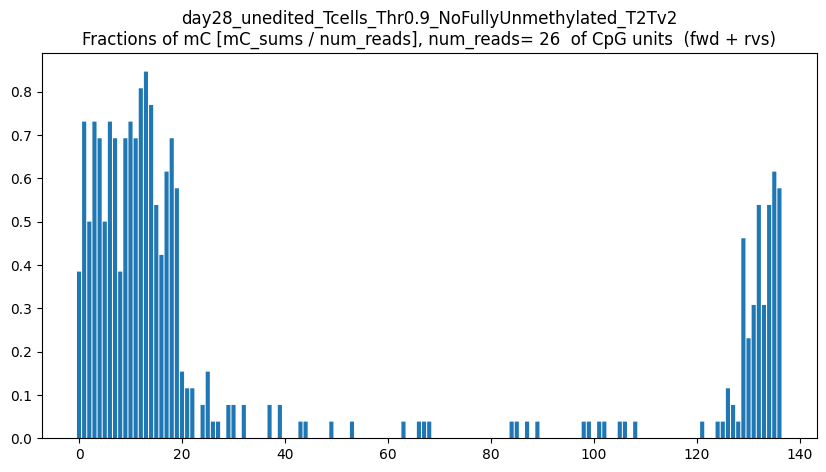

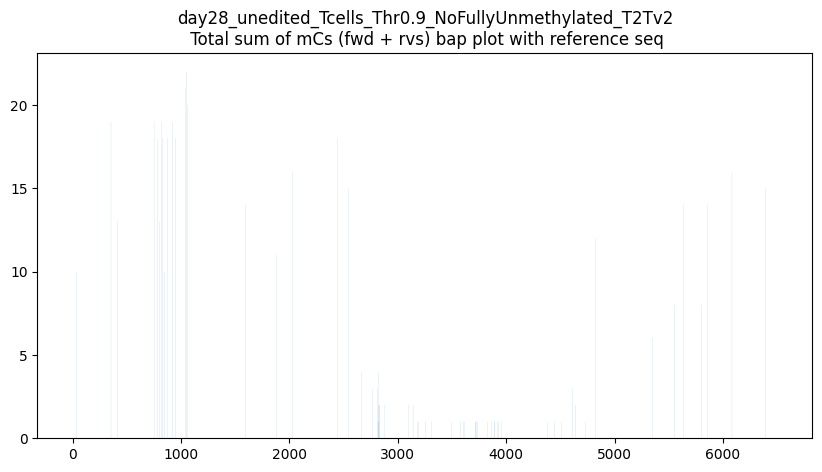

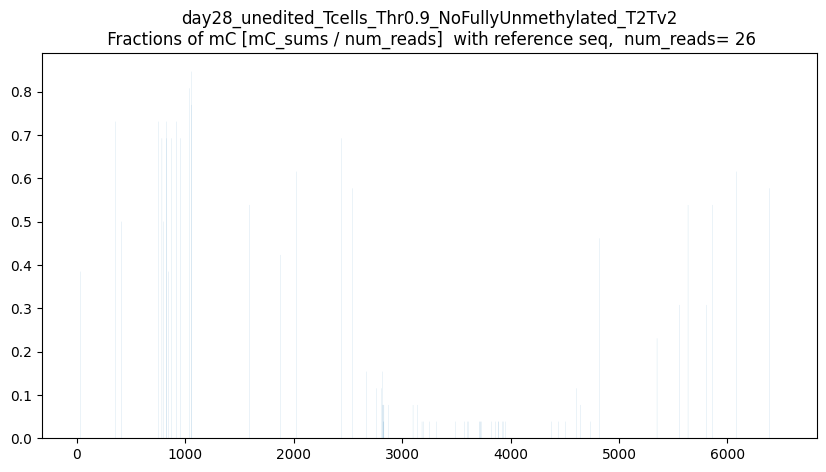

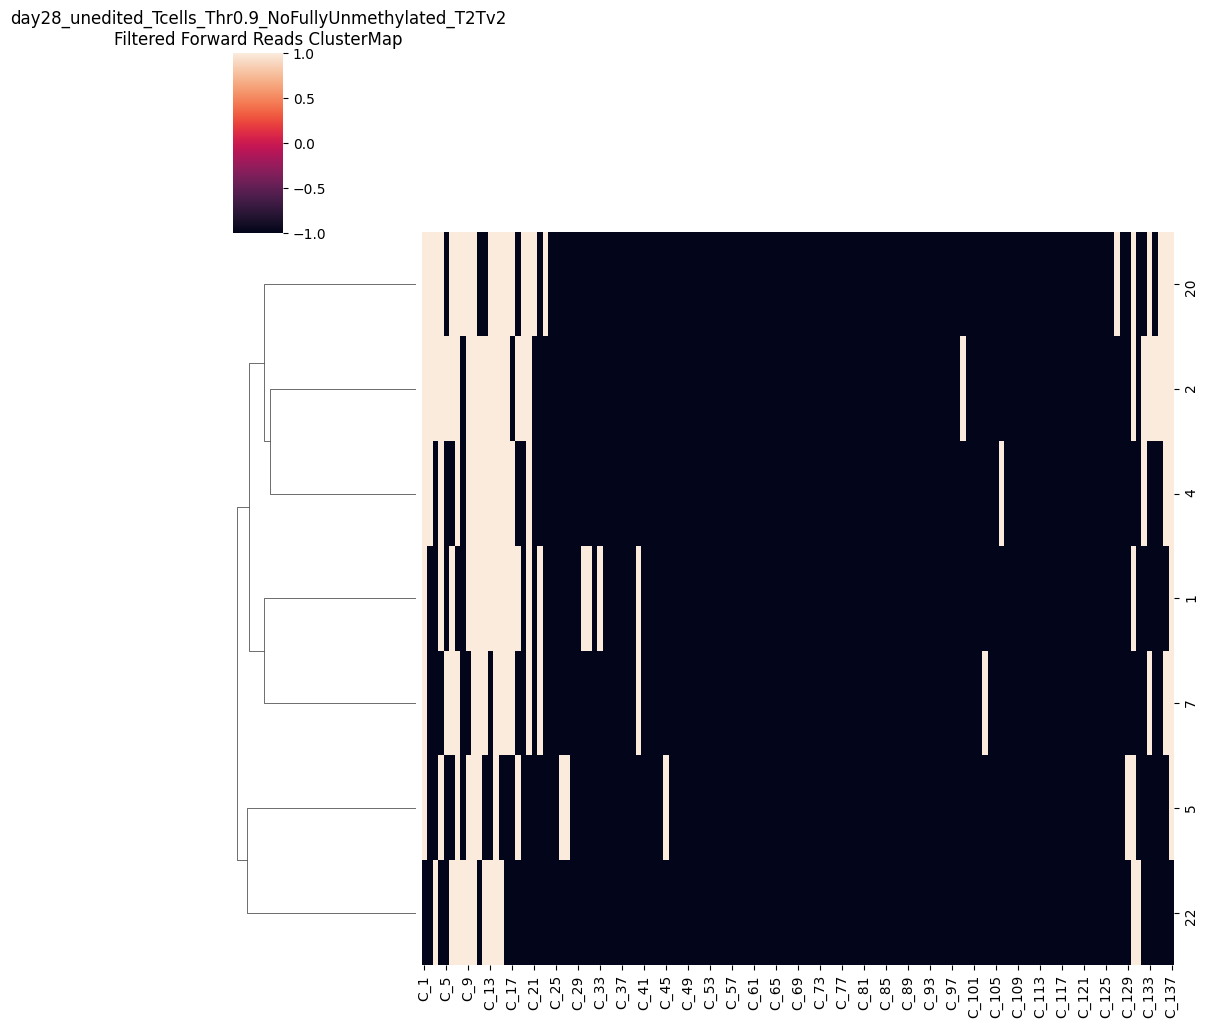

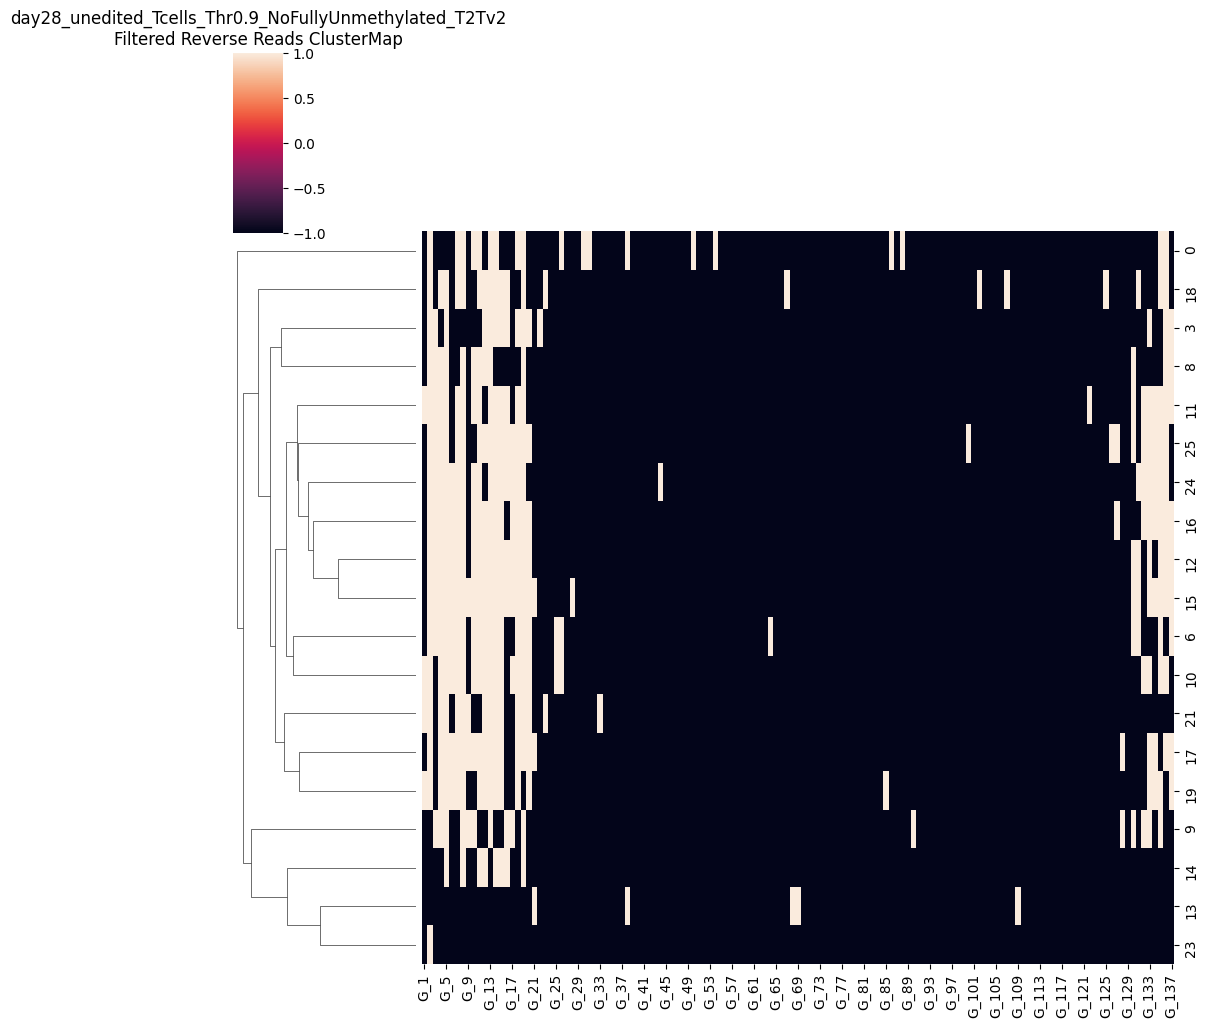

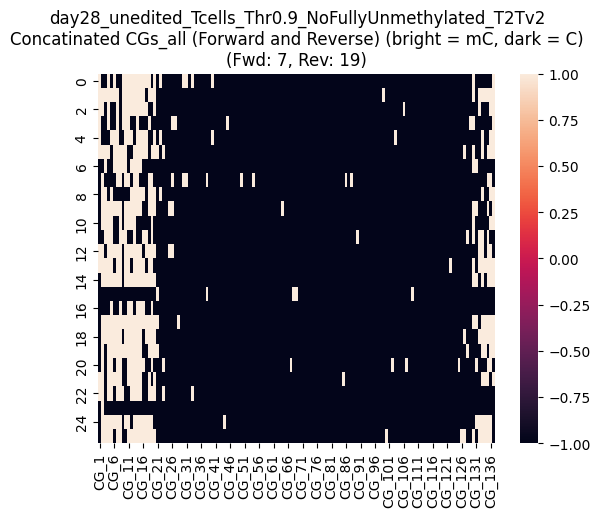

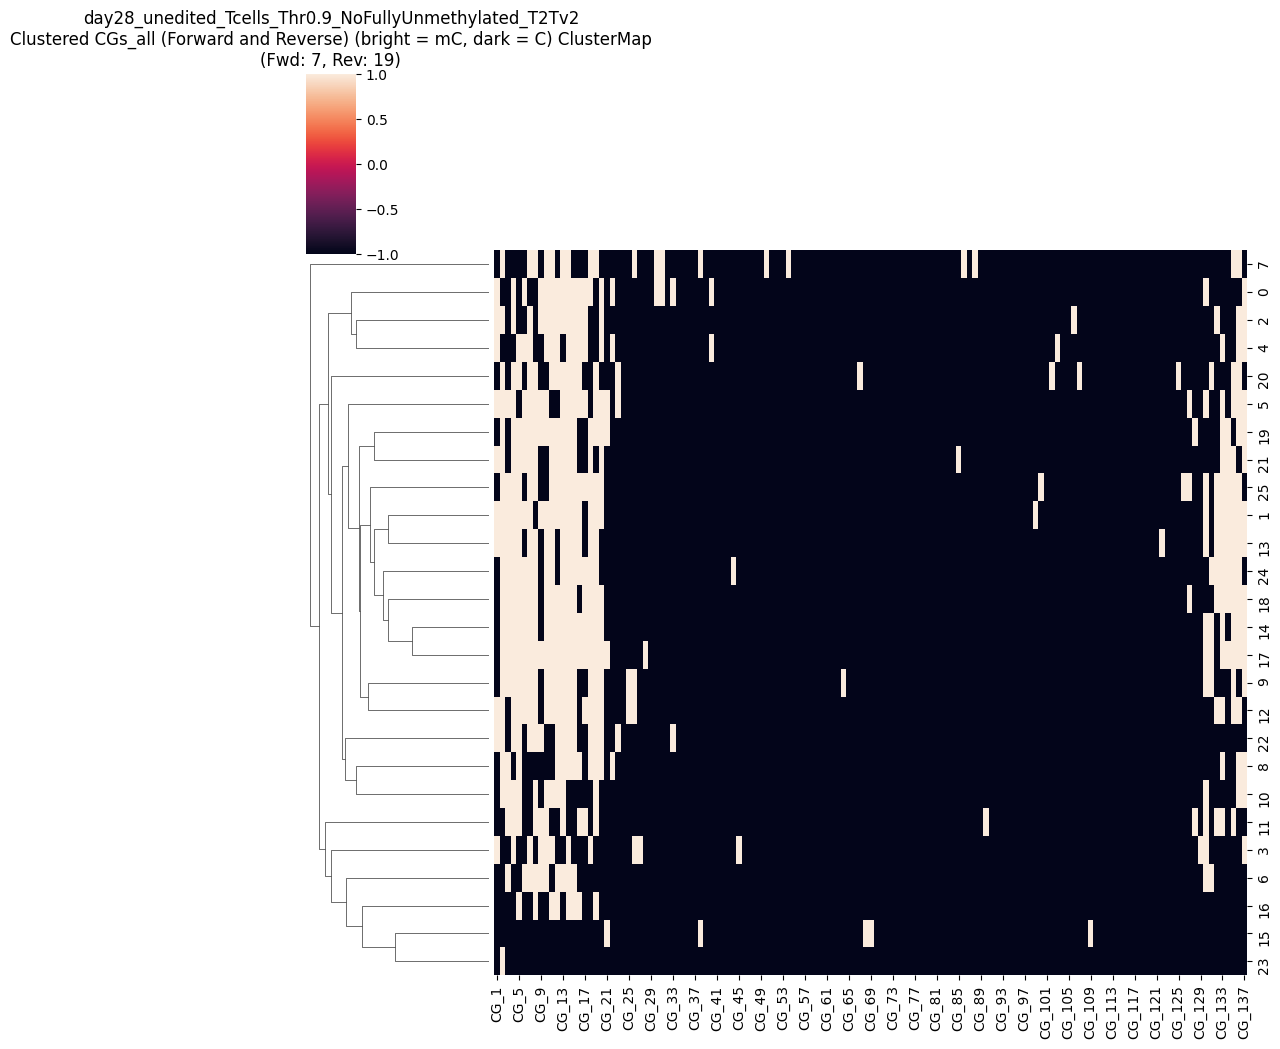

CGs_all saved as CG_137_padded_reads_day28_unedited_Tcells_Thr0.9_NoFullyUnmethylated_T2Tv2_mCthresh0.9_t2t_v2_0_chr1:206583354-206589854_2025-08-02_units_combined_numFWD7_numRVS19.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


In [25]:
"""
Main pipeline for processing and visualizing CpG units on forward and reverse strands 
"""
try:
    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates, CG_info_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


In [26]:
# save_padded_reads_name_np[:-4]

### Results for ROI Extraction from Unedited T cells:
From around  reads located near the ROI, 

only  reads have non-zery mC

(with 90% confidance at least one methylated C  in the mC call) 

Forward reads:  

Reverse reads:   

# Analyze the Edited CRISPROff cells from the same T prime cells from Elaine ES

System: Linux
Release: 6.8.0-60-generic
Version: #63~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Tue Apr 22 19:00:15 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
Region length: 6500
No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.9 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20250721_Day28_CROFF_T_cells_minion_merged_flowc…

          |    0%

          | Transferring 28 from reads.CG,0.txt into reads.combined_basemods.h5, new size 28   0% | 00:00<?

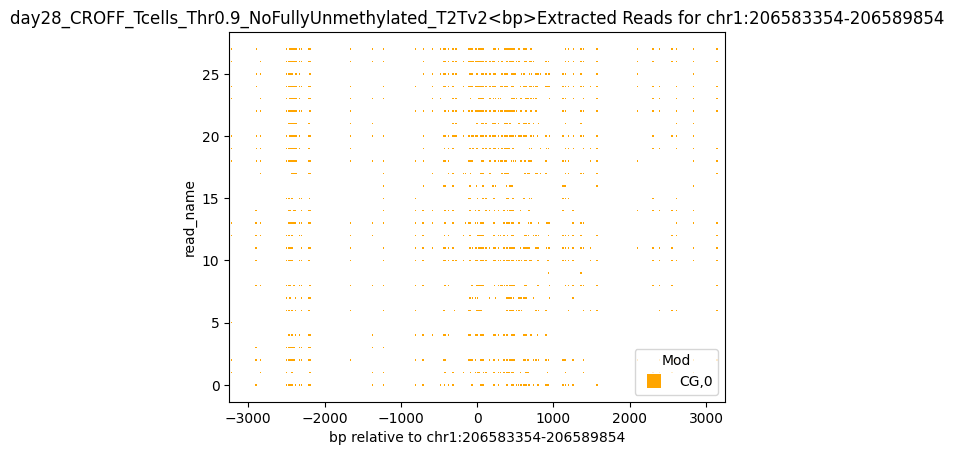

Found read coordinates: 28 reads
Unique read names with methylation: 28
Found 13 reads with full coverage
Reads with methylation data: 28
Overlap between full coverage and methylation: 13
After full coverage filtering: 788 reads with methylation data
Final result: 788 reads with methylation information out of 28 total reads


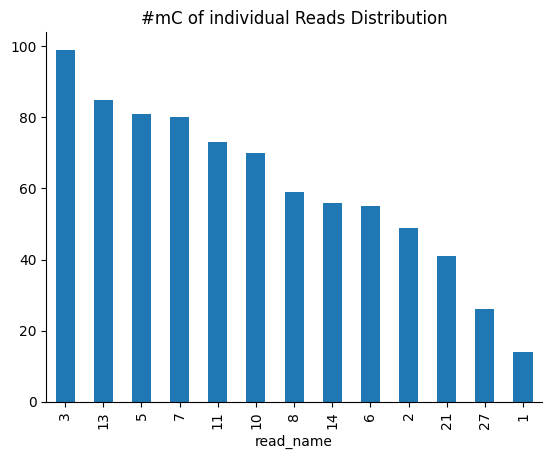

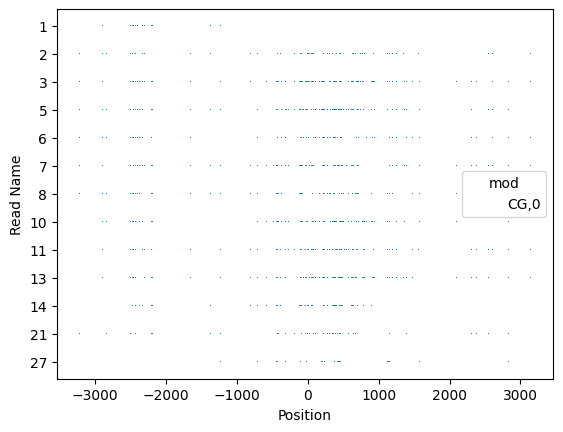

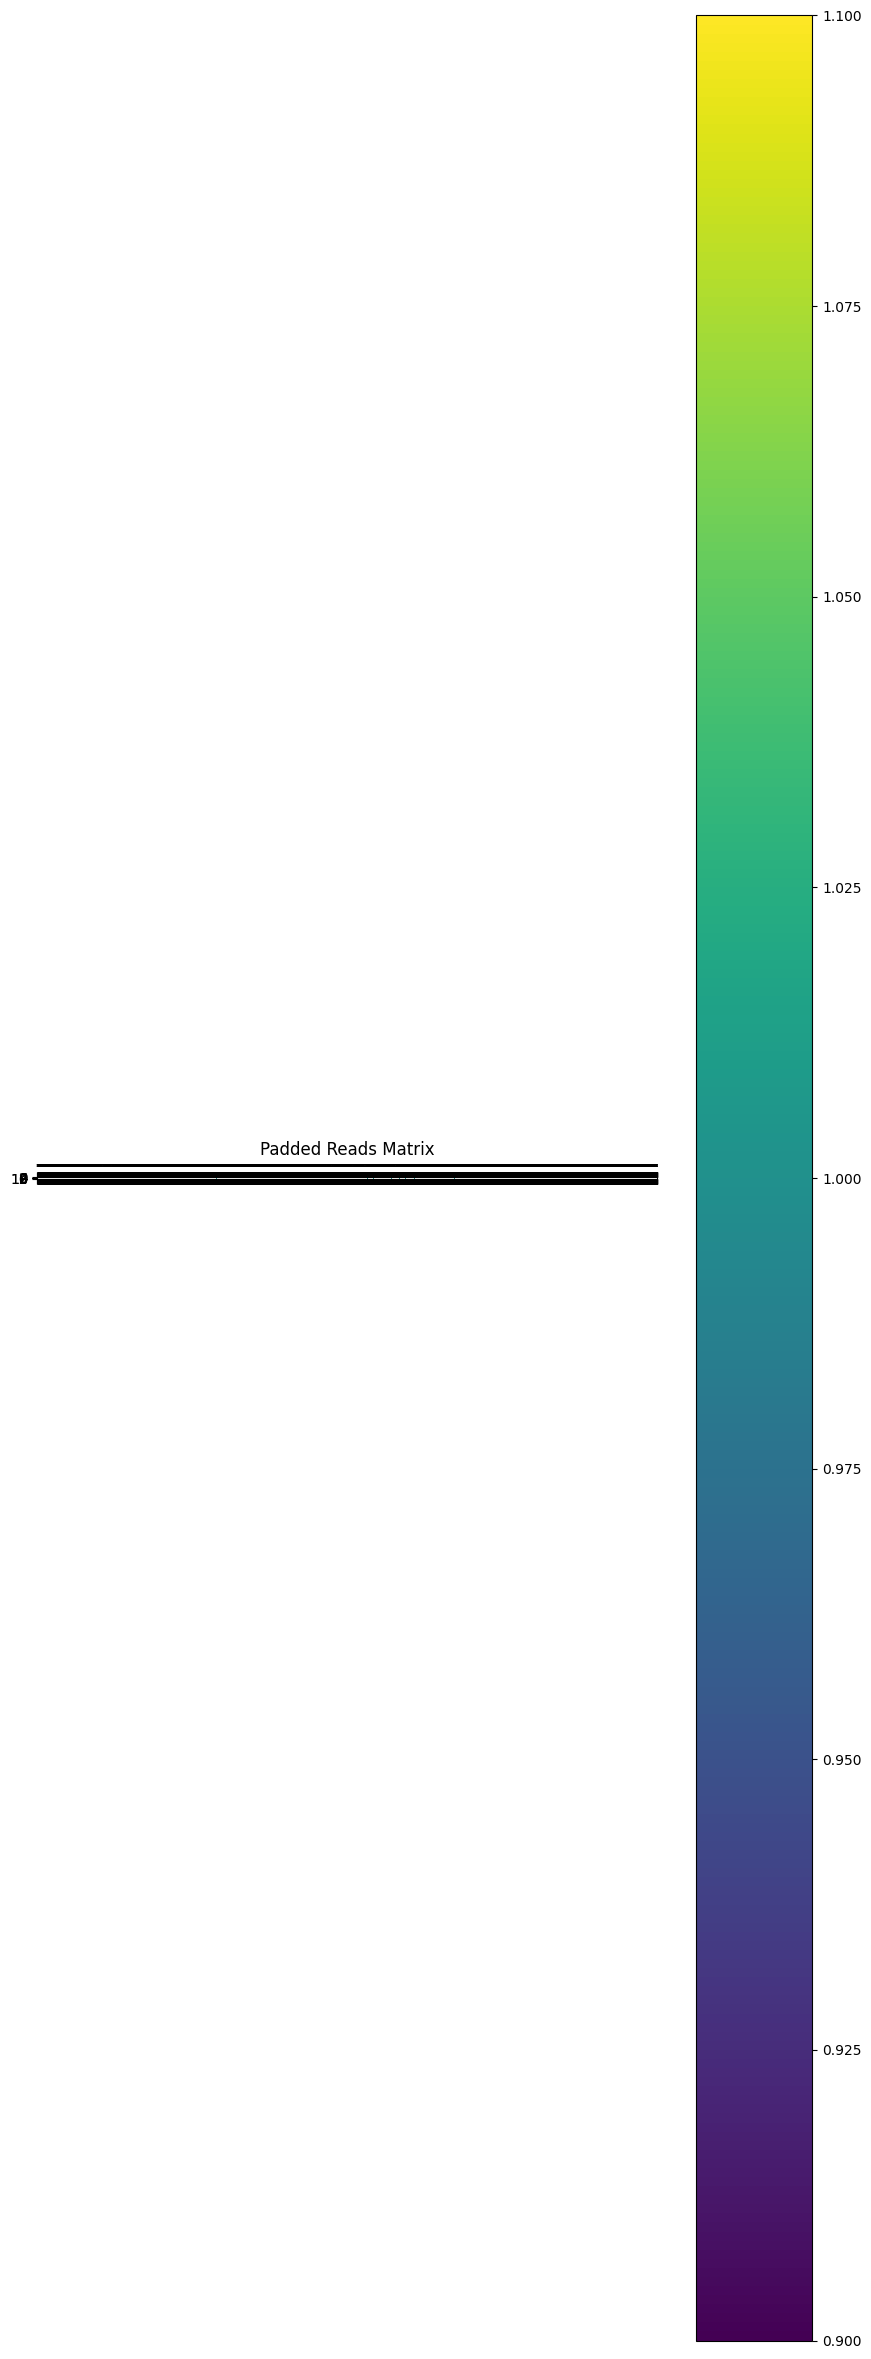

Padded reads saved to padded_reads_day28_CROFF_Tcells_Thr0.9_NoFullyUnmethylated_T2Tv2_mCthresh0.9_t2t_v2_0_chr1:206583354-206589854_2025-08-02.npy


In [27]:
system_info()

experiment_name = "day28_CROFF_Tcells_Thr0.9_NoFullyUnmethylated_T2Tv2" 
threshold_mC = 0.9 # 0.75 # 0.99
bam_path = "/home/michalula/data/cas9_nanopore/data/20250721_nCATs_Tcells_CROFF_Day28/mergered_outputs/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20250721_Day28_CROFF_T_cells_minion_merged_flowcells_output.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9/pod5_converted_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"


save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

# motifs=['CG,0']
# ref_seq_list = get_reference_sequence(ref_genome_v1_1_file, region_chr, region_start, region_end)


extract_file, extract_regions = extract_from_bam(
    experiment_name=experiment_name,
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)

keep_unmethylated_reads = False
if extract_file:
    if not keep_unmethylated_reads:
        reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)

        padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    else:
        reads_df, regions_dict = process_extracted_reads_no_fully_unmethylated(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)
        padded_reads = create_padded_reads_no_fully_unmethylated(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)

In [28]:
save_padded_reads_name_np

'padded_reads_day28_CROFF_Tcells_Thr0.9_NoFullyUnmethylated_T2Tv2_mCthresh0.9_t2t_v2_0_chr1:206583354-206589854_2025-08-02.npy'

Padded reads loaded successfully.


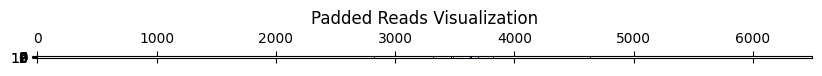

Visualization completed.
Region length: 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTAAAATTTCTTTTCTTTTTTTTTTTTTGAGACGGAGTTTTGCTCTCGTCCCCCAGGCTGGAGTGCAATGGCGCGATCTTGGCTCACTGCAACCTCCGCCTCCCAGGTTCAAGTGATTCTCCCGCCTCAGCCTCCCAAGTAGCTGGGATTACAGGCACCTGCCACAACGCCCAGCCAATTTTTGTATTTTTAGTAGAGACGGG

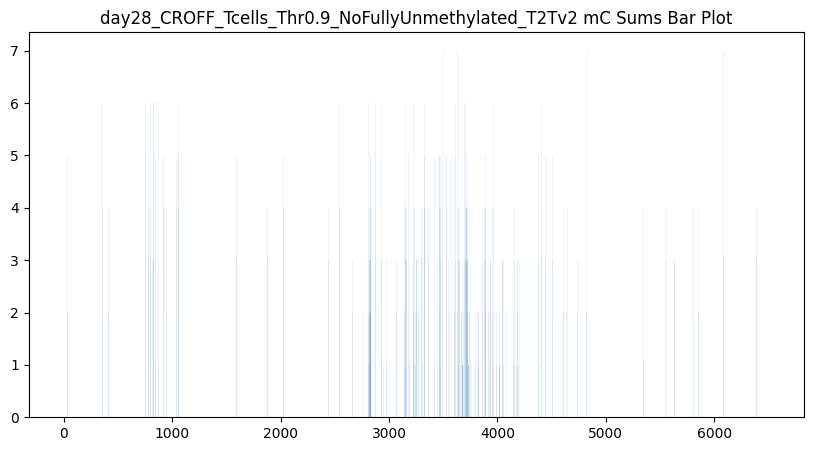

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


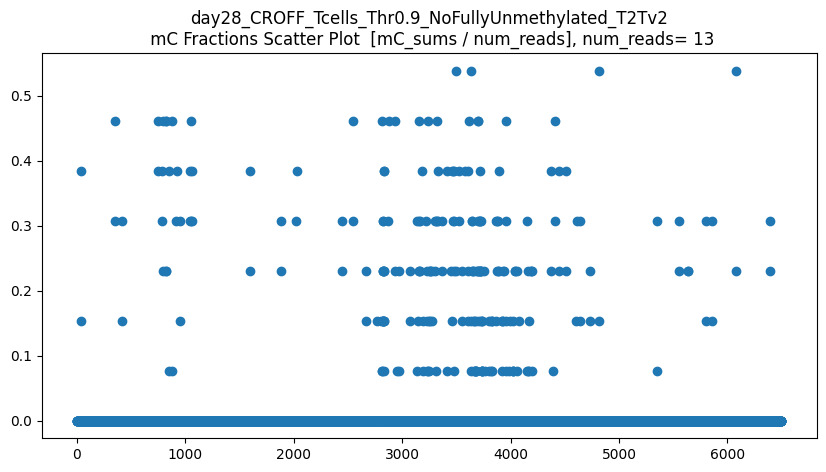

len(CGs_all) = 13
CGs_all.shape = (13, 137)
len(CGs_all_on_fwd_C_sums) = 6500
CGs_all_on_fwd_C_sums.shape = (6500,)


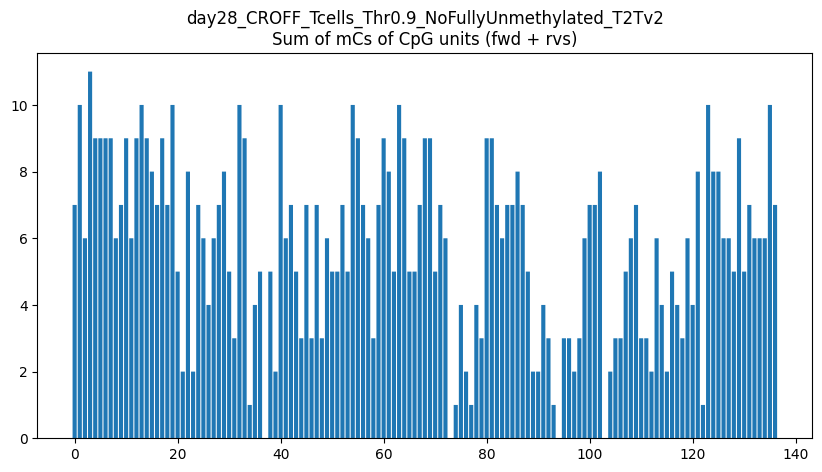

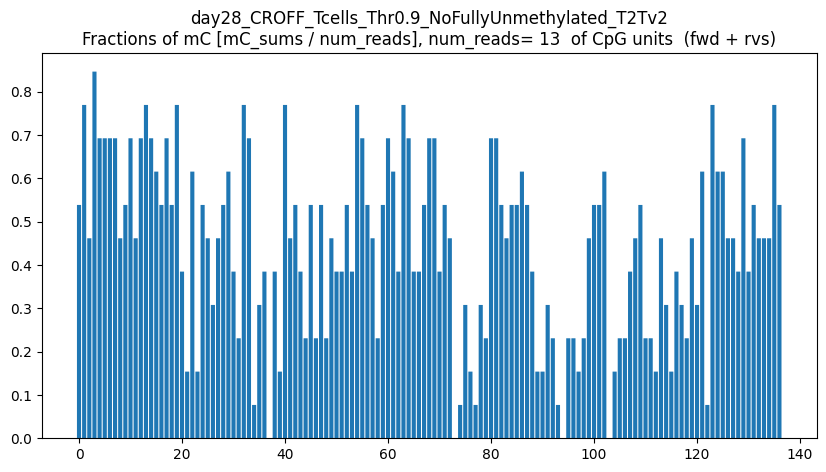

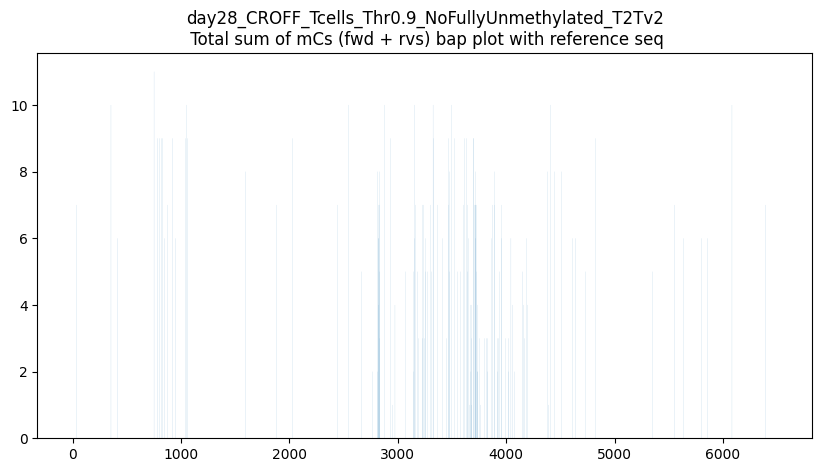

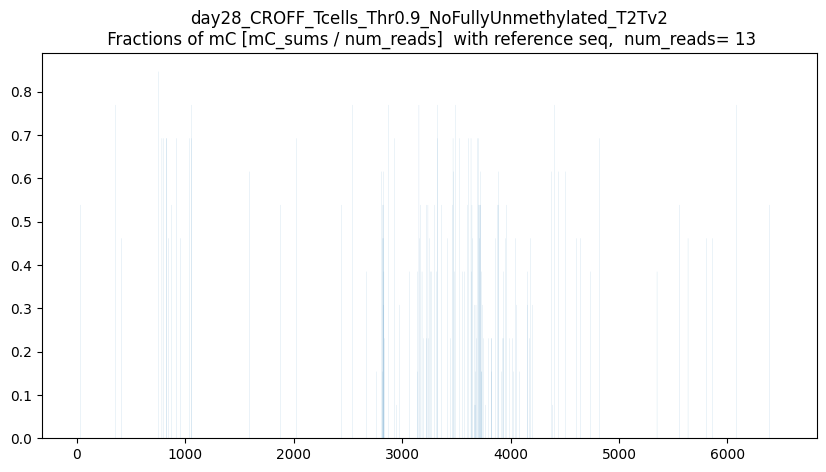

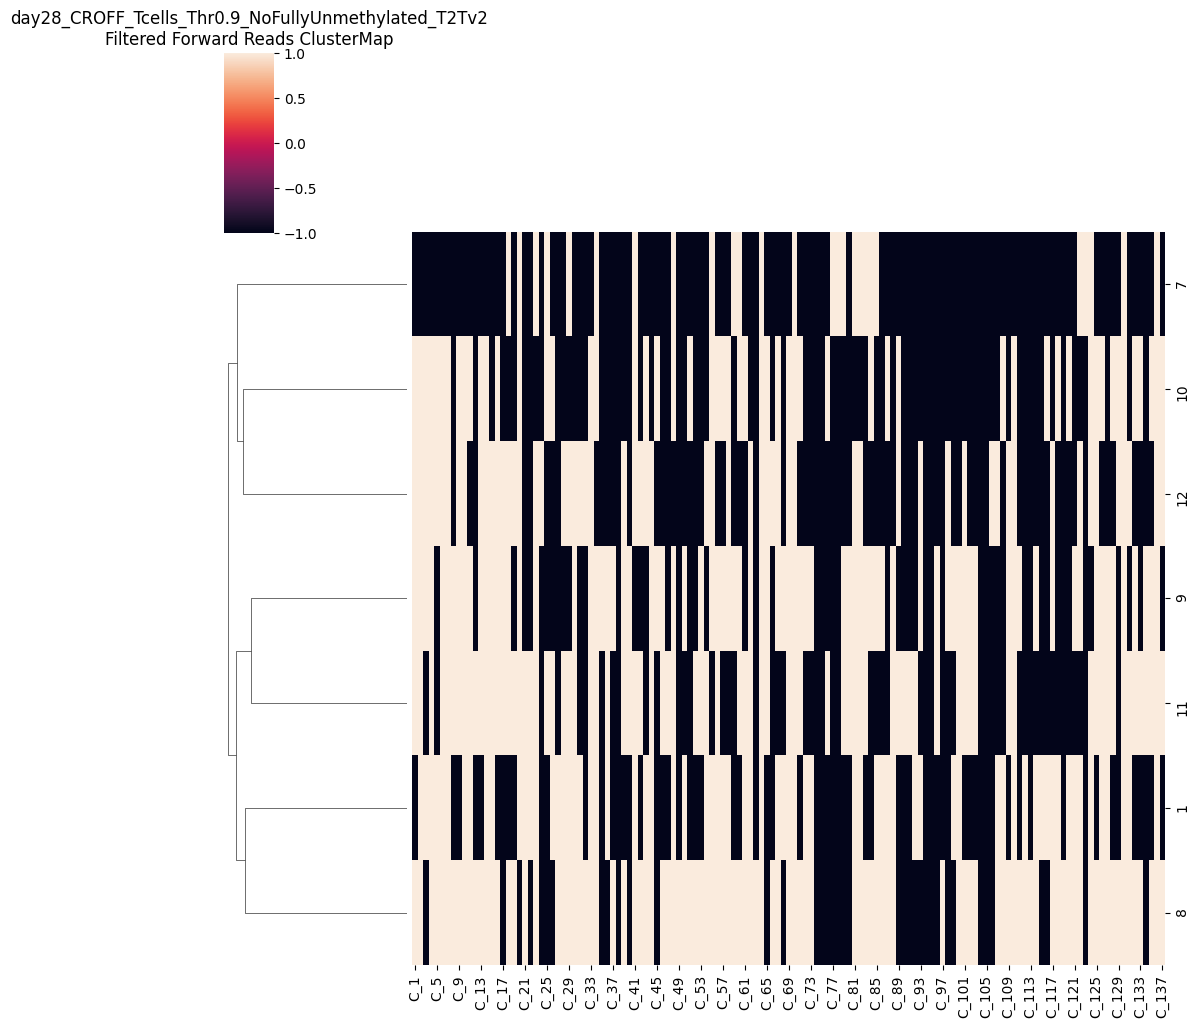

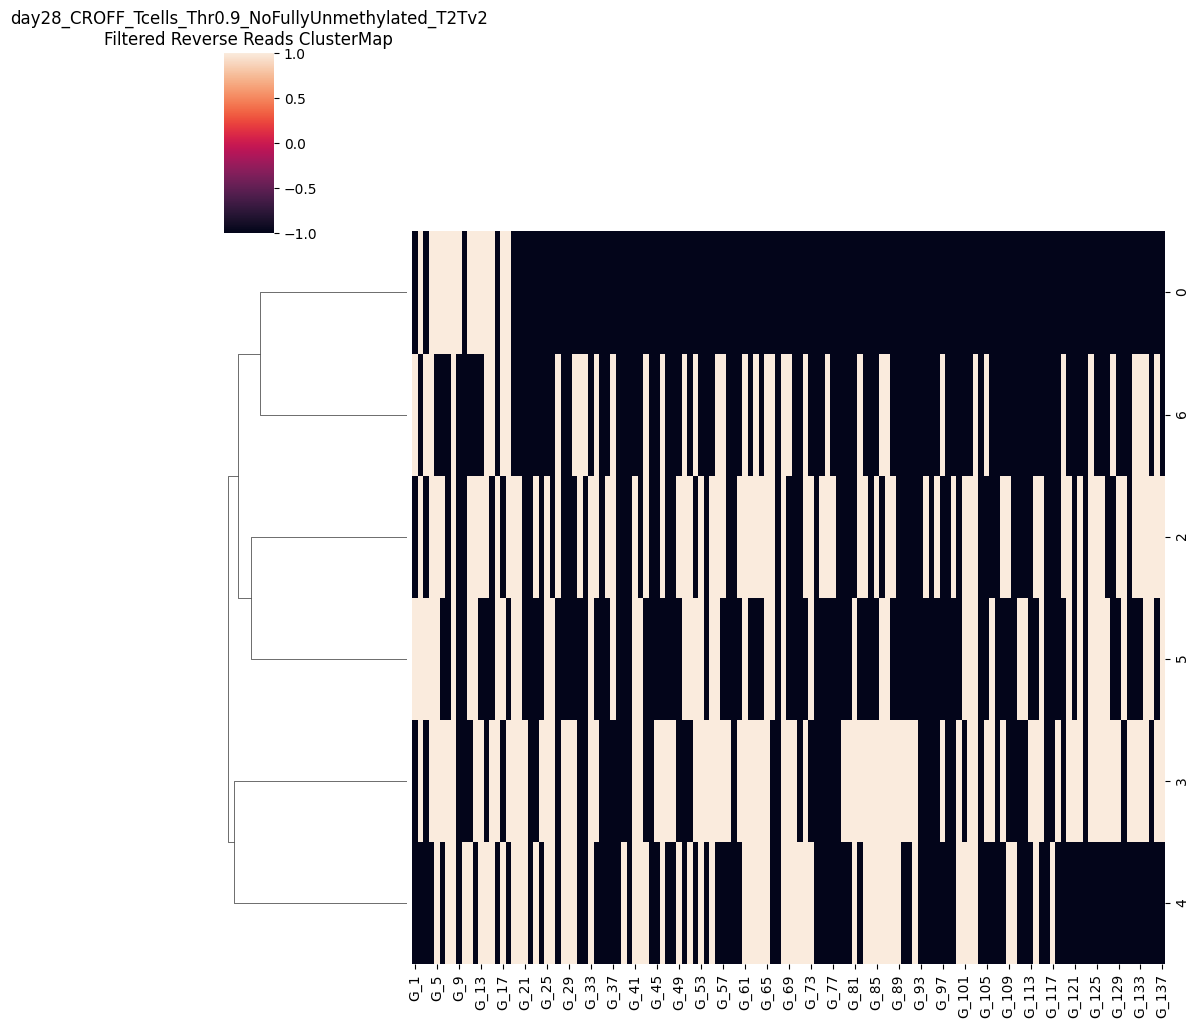

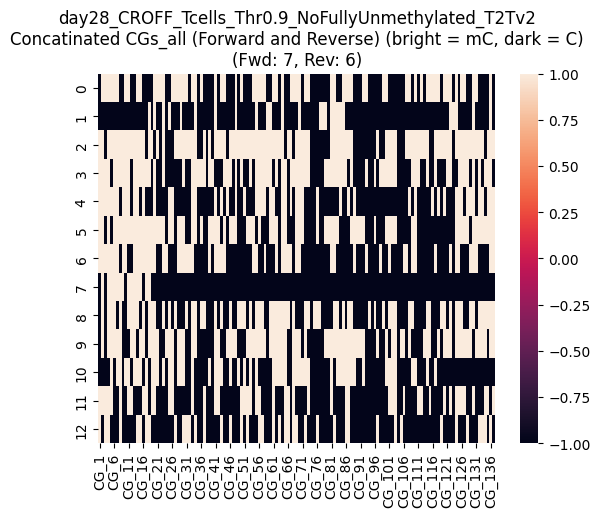

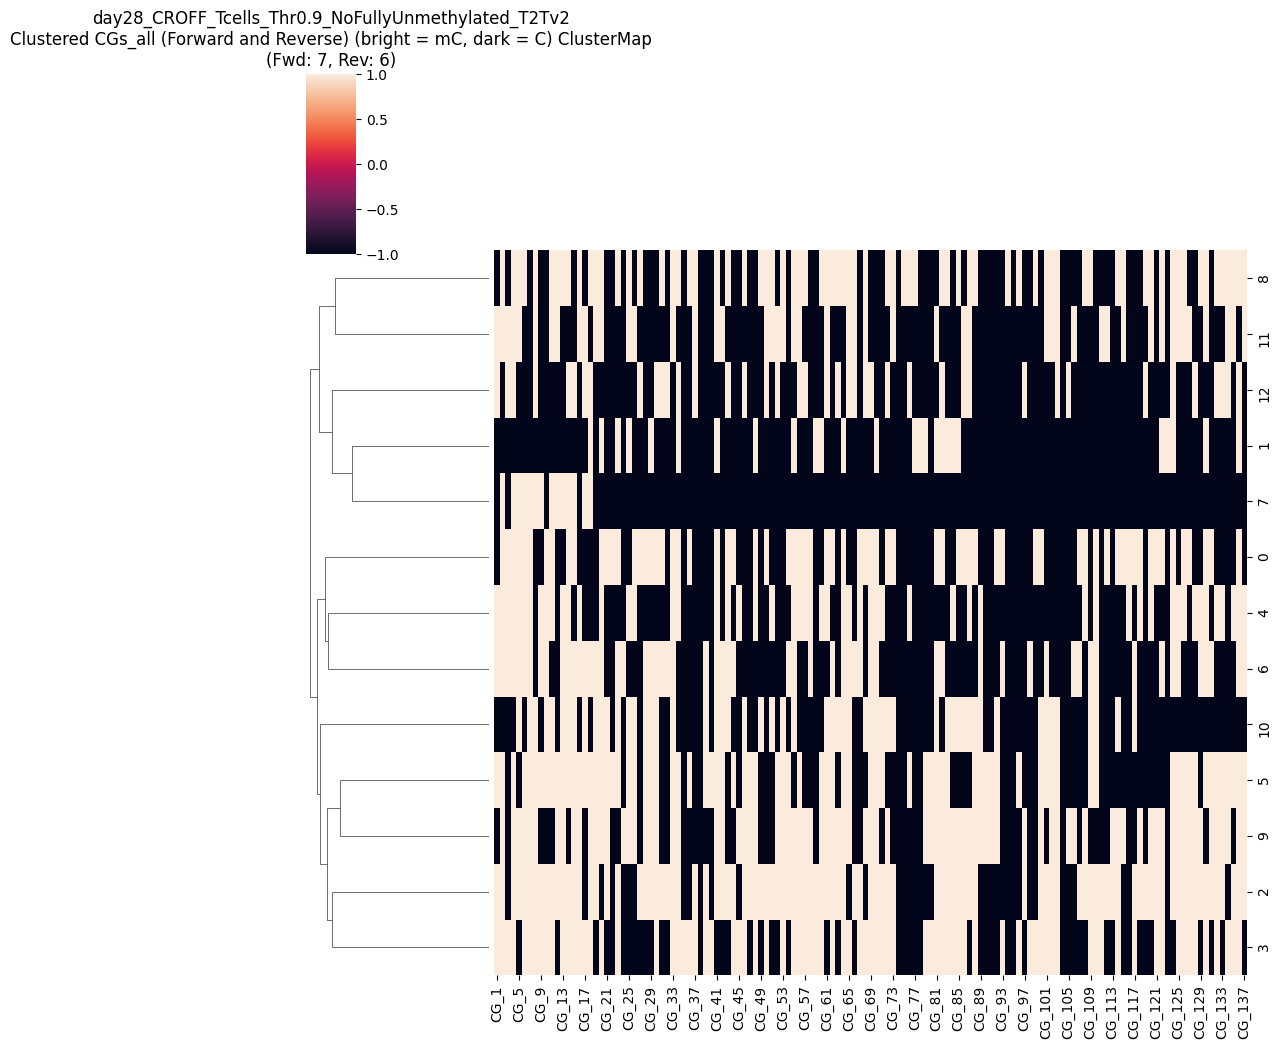

CGs_all saved as CG_137_padded_reads_day28_CROFF_Tcells_Thr0.9_NoFullyUnmethylated_T2Tv2_mCthresh0.9_t2t_v2_0_chr1:206583354-206589854_2025-08-02_units_combined_numFWD7_numRVS6.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


In [29]:
"""
Main pipeline for processing and visualizing CpG units on forward and reverse strands 
"""
try:
    # Process pipeline
    # CGs_all_silenced, C_fwd_df_silenced, G_revs_df_silenced, padded_reads_df_silenced
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates, CG_info_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


### ROI Extraction Results from  Silence  cells from ES:
From around  reads located near the ROI, 

 ~ reads have non-zery mC 
 
 (with 90% confidance in at least one methylated C the mC calls ) 


Forward reads:  

Reverse reads:  

~ 90% of those Day 6 CRISPROff cells are silenced according to Elaines Flow data

# Change the mC threshold to 0.99 - only keep very confident mC values


System: Linux
Release: 6.8.0-60-generic
Version: #63~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Tue Apr 22 19:00:15 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
region_length 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTA

          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20250721_nCATs_Tcells_UNEDITED_Day28_minion_merg…

          |    0%

          | Transferring 53 from reads.CG,0.txt into reads.combined_basemods.h5, new size 53   0% | 00:00<?

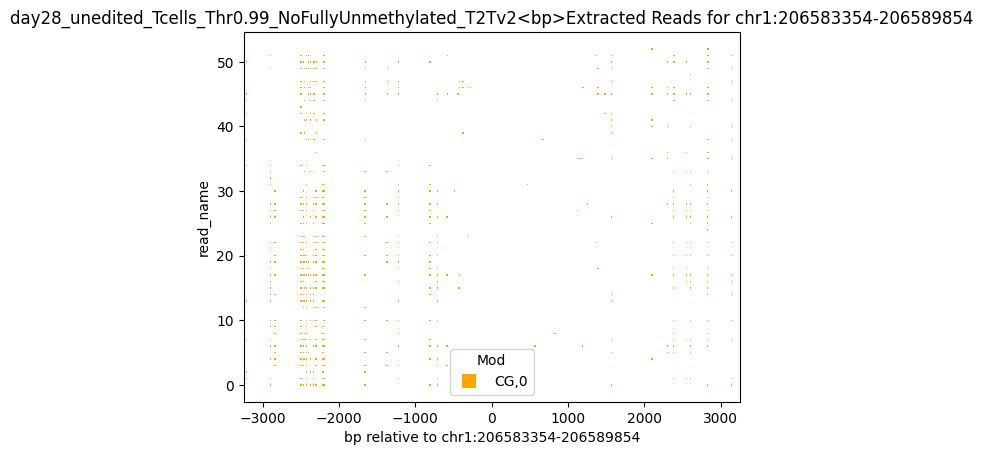

Found read coordinates: 53 reads
Unique read names with methylation: 51
Found 26 reads with full coverage
Reads with methylation data: 51
Overlap between full coverage and methylation: 25
After full coverage filtering: 337 reads with methylation data
Final result: 337 reads with methylation information out of 53 total reads


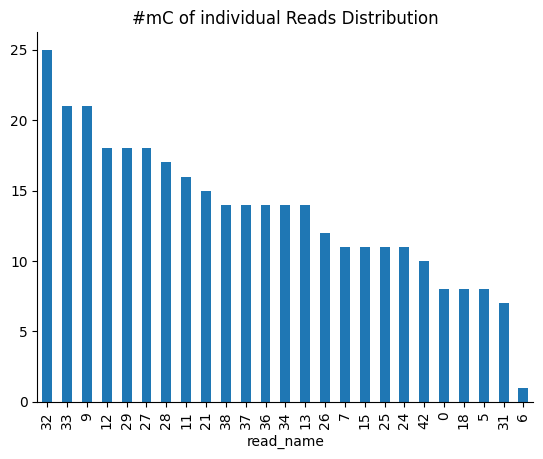

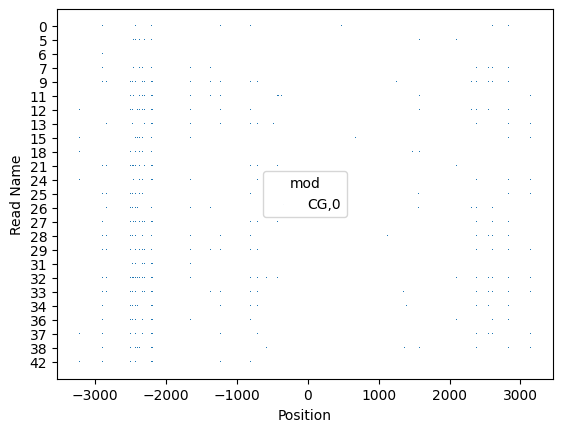

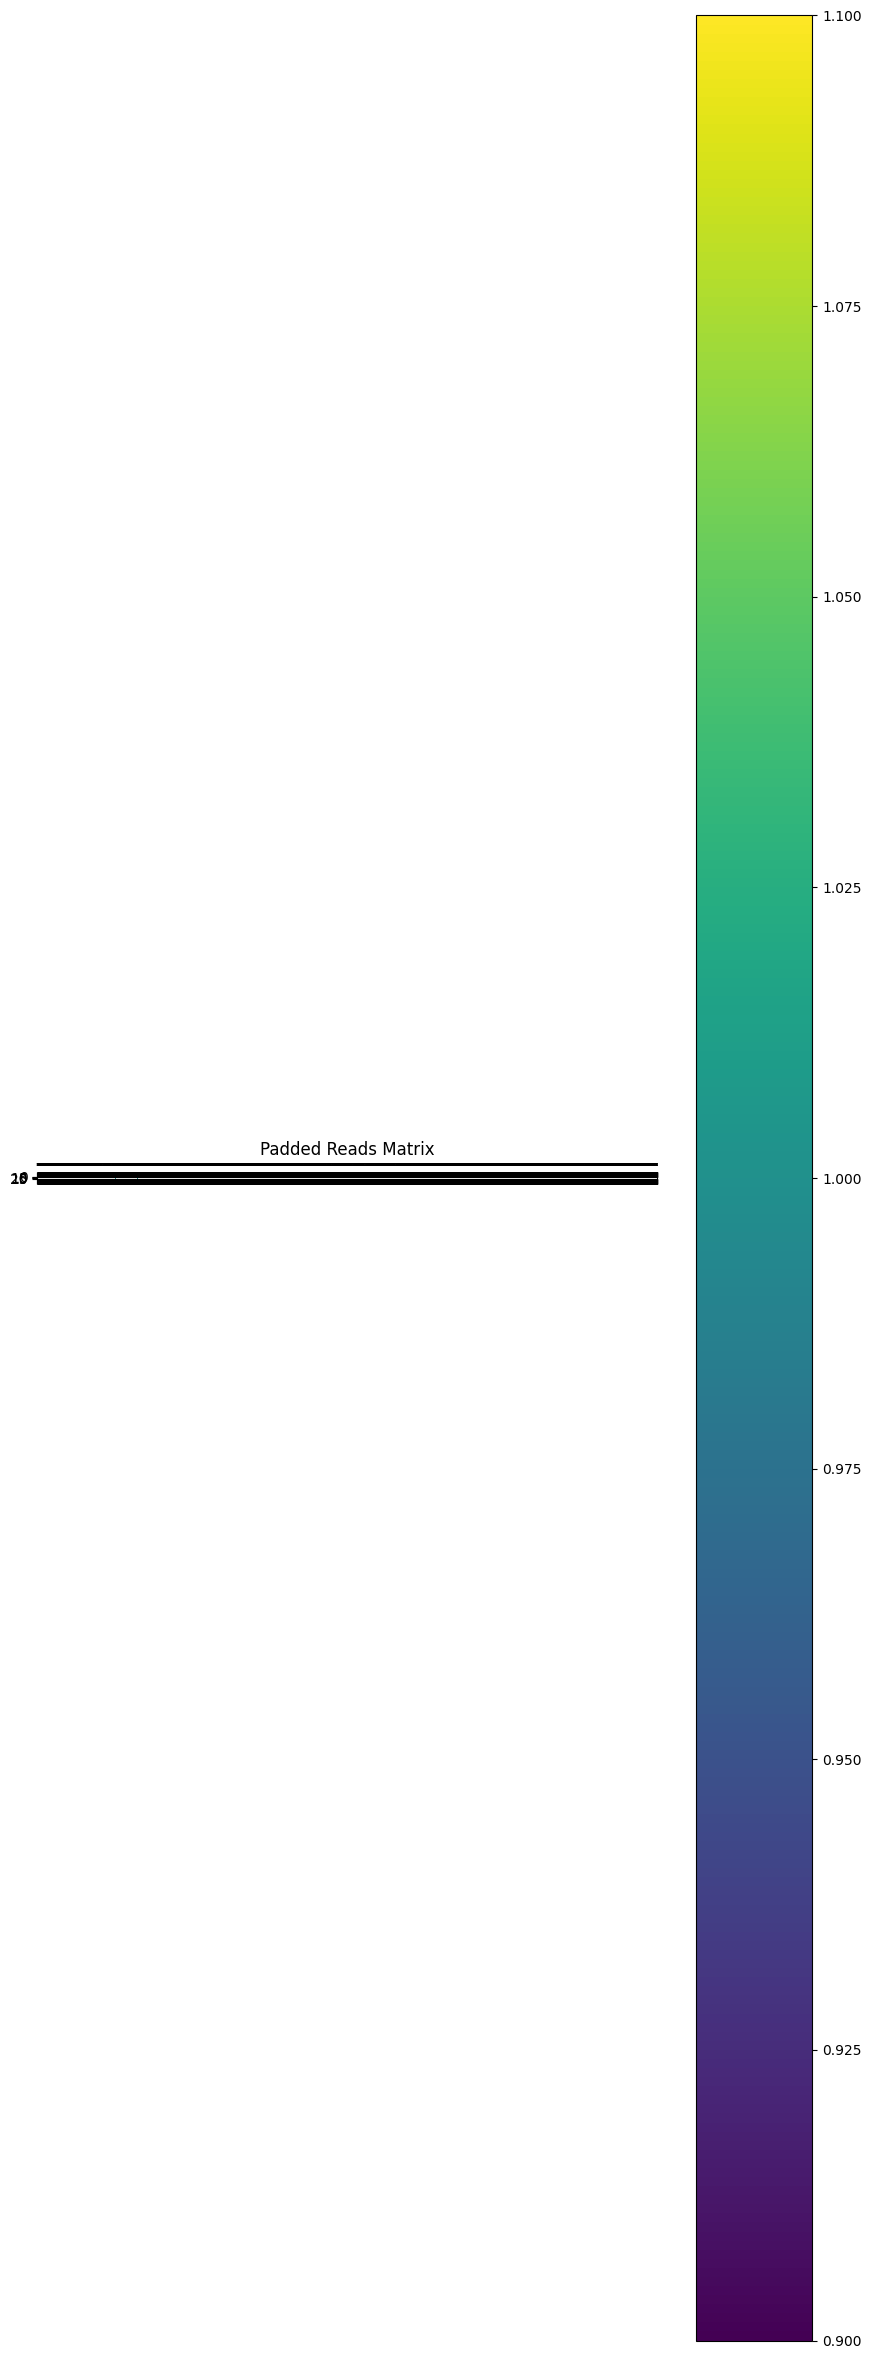

Padded reads saved to padded_reads_day28_unedited_Tcells_Thr0.99_NoFullyUnmethylated_T2Tv2_mCthresh0.99_t2t_v2_0_chr1:206583354-206589854_2025-08-02.npy


In [30]:
system_info()


experiment_name = "day28_unedited_Tcells_Thr0.99_NoFullyUnmethylated_T2Tv2"
threshold_mC =  0.99 #  0.9 #0.99
bam_path = "/home/michalula/data/cas9_nanopore/data/20250721_nCATs_Tcells_UNEDITED_Day28/merged_outputs/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20250721_nCATs_Tcells_UNEDITED_Day28_minion_merged_flowcells_output.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

date_today = datetime.today().strftime('%Y-%m-%d') 
print("region_length", region_length)


save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

motifs=['CG,0']
ref_seq_list = get_reference_sequence(ref_genome_path, region_chr, region_start, region_end)


extract_file, extract_regions = extract_from_bam(
    experiment_name=experiment_name,
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)

keep_unmethylated_reads = False

if extract_file:
    if not keep_unmethylated_reads:
        reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)

        padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    else:
        reads_df, regions_dict = process_extracted_reads_no_fully_unmethylated(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)
        padded_reads = create_padded_reads_no_fully_unmethylated(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)

Padded reads loaded successfully.


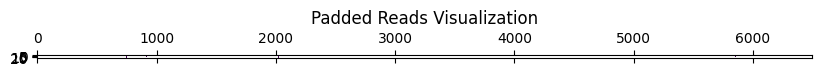

Visualization completed.
Region length: 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTAAAATTTCTTTTCTTTTTTTTTTTTTGAGACGGAGTTTTGCTCTCGTCCCCCAGGCTGGAGTGCAATGGCGCGATCTTGGCTCACTGCAACCTCCGCCTCCCAGGTTCAAGTGATTCTCCCGCCTCAGCCTCCCAAGTAGCTGGGATTACAGGCACCTGCCACAACGCCCAGCCAATTTTTGTATTTTTAGTAGAGACGGG

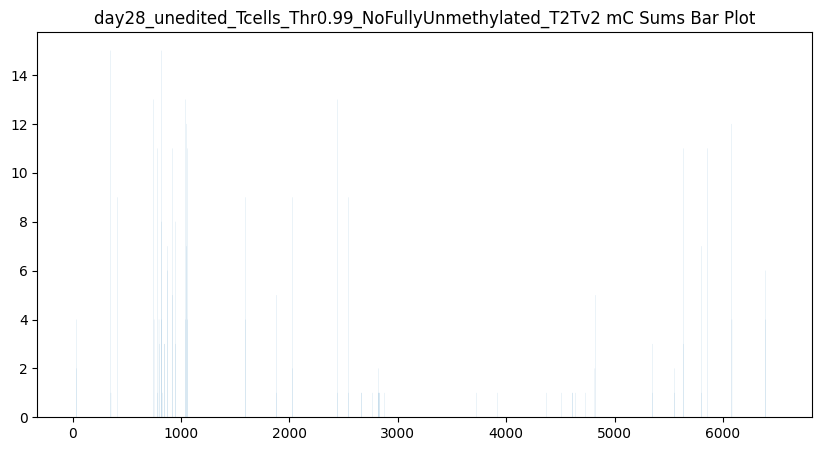

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


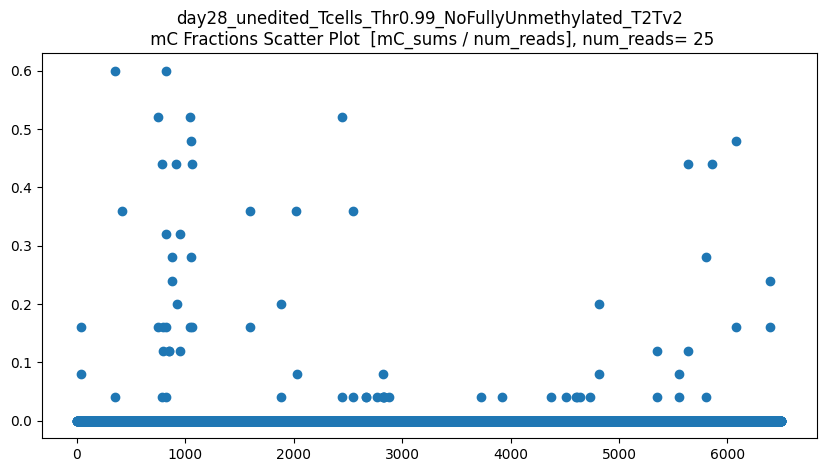

len(CGs_all) = 25
CGs_all.shape = (25, 137)
len(CGs_all_on_fwd_C_sums) = 6500
CGs_all_on_fwd_C_sums.shape = (6500,)


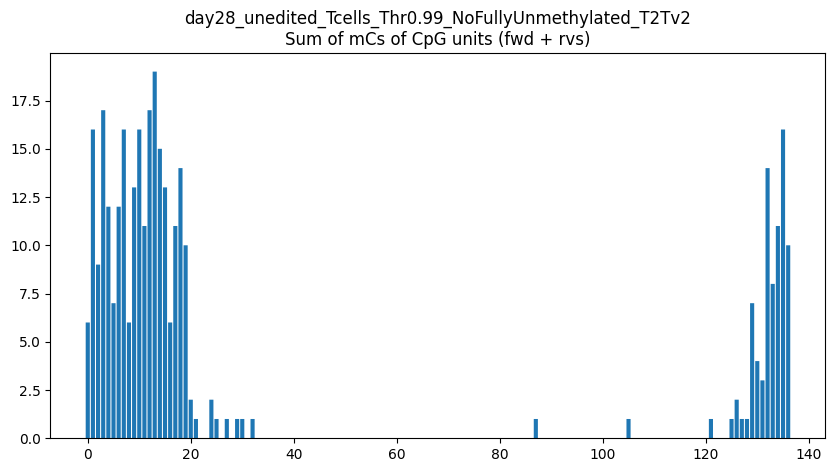

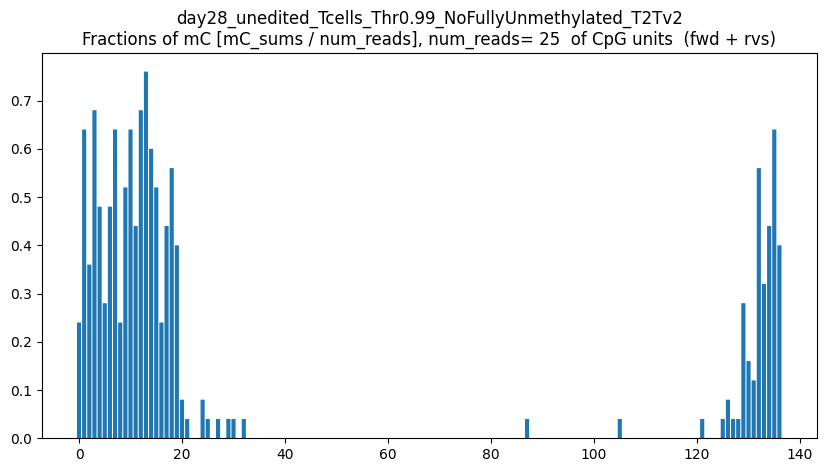

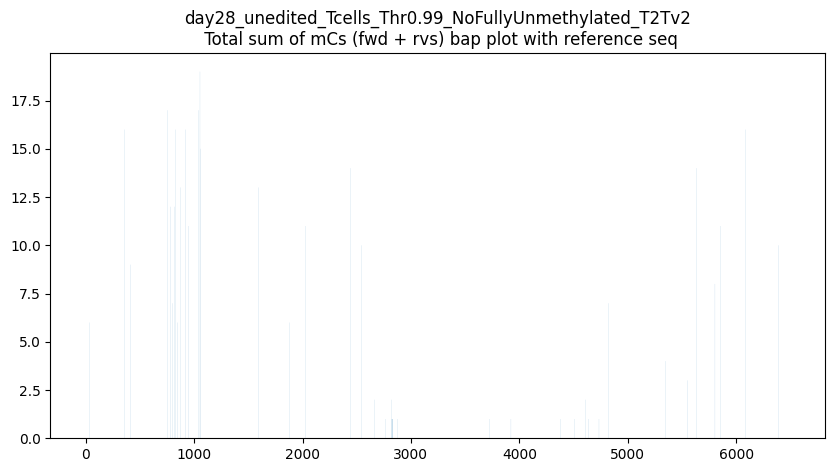

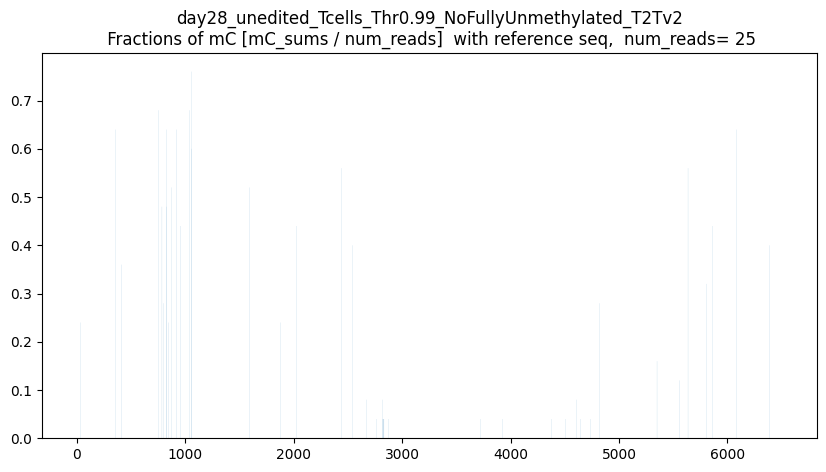

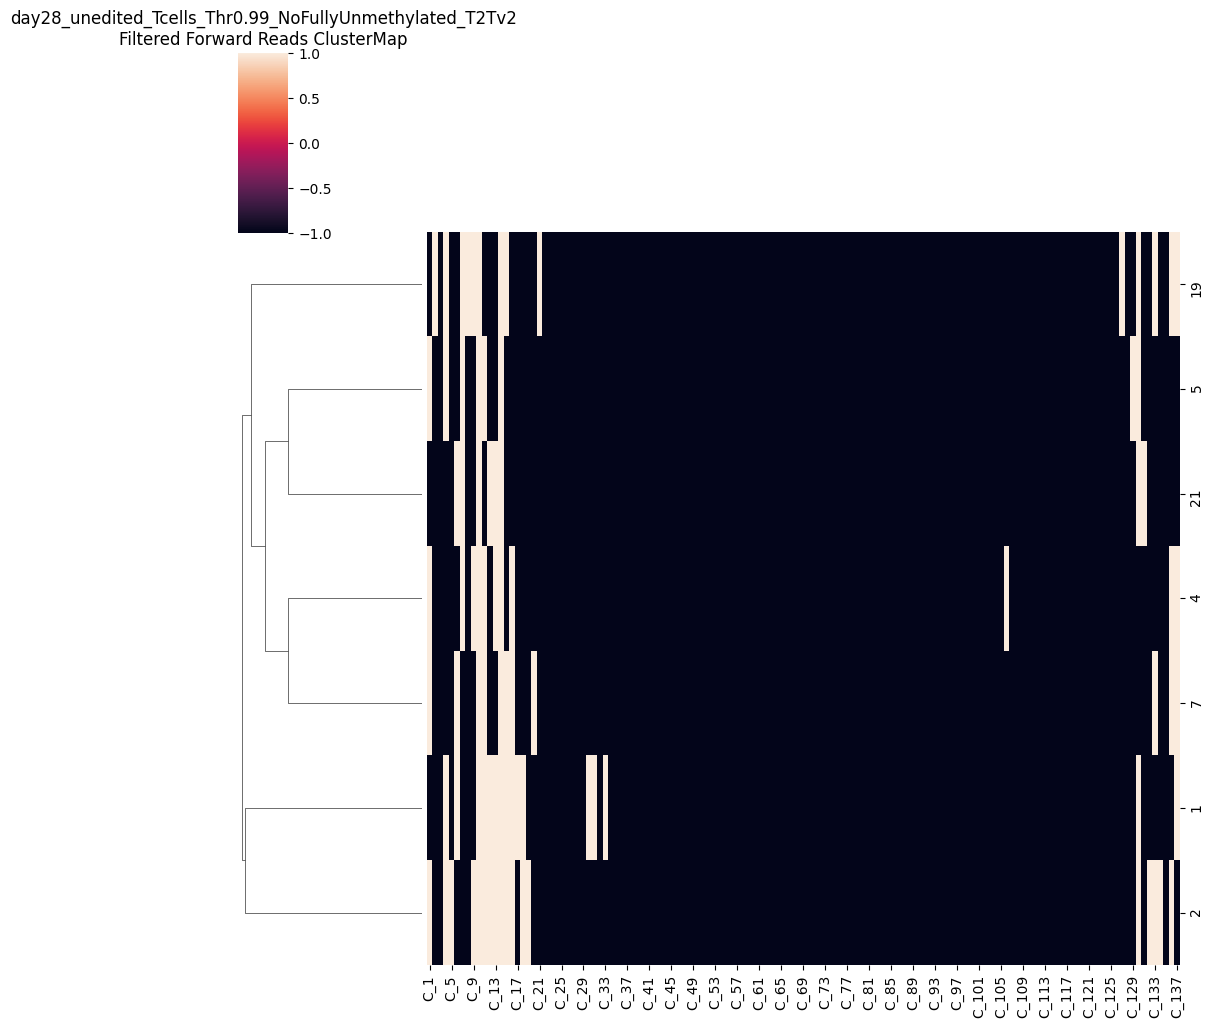

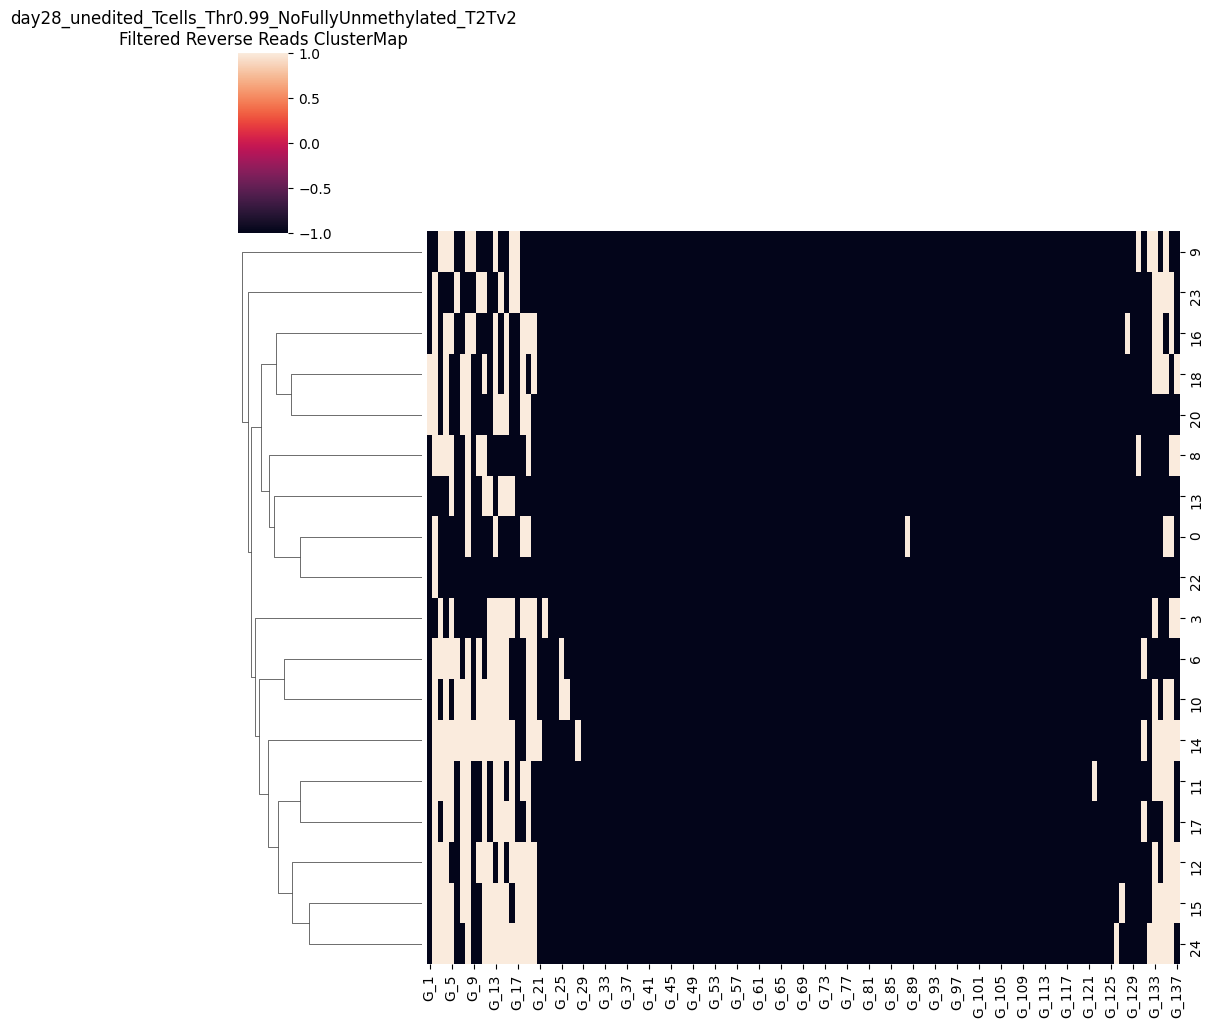

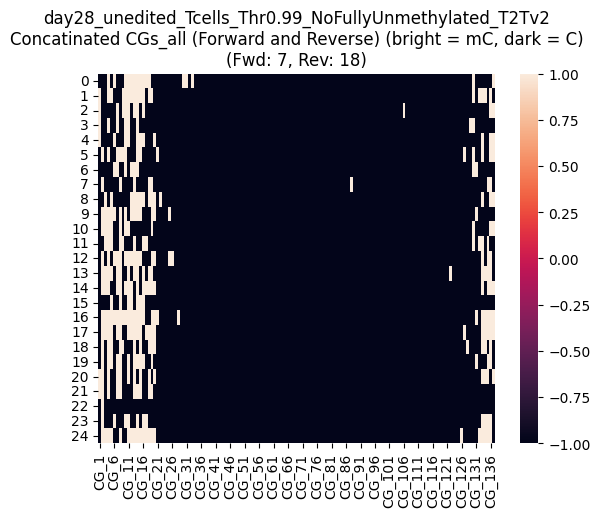

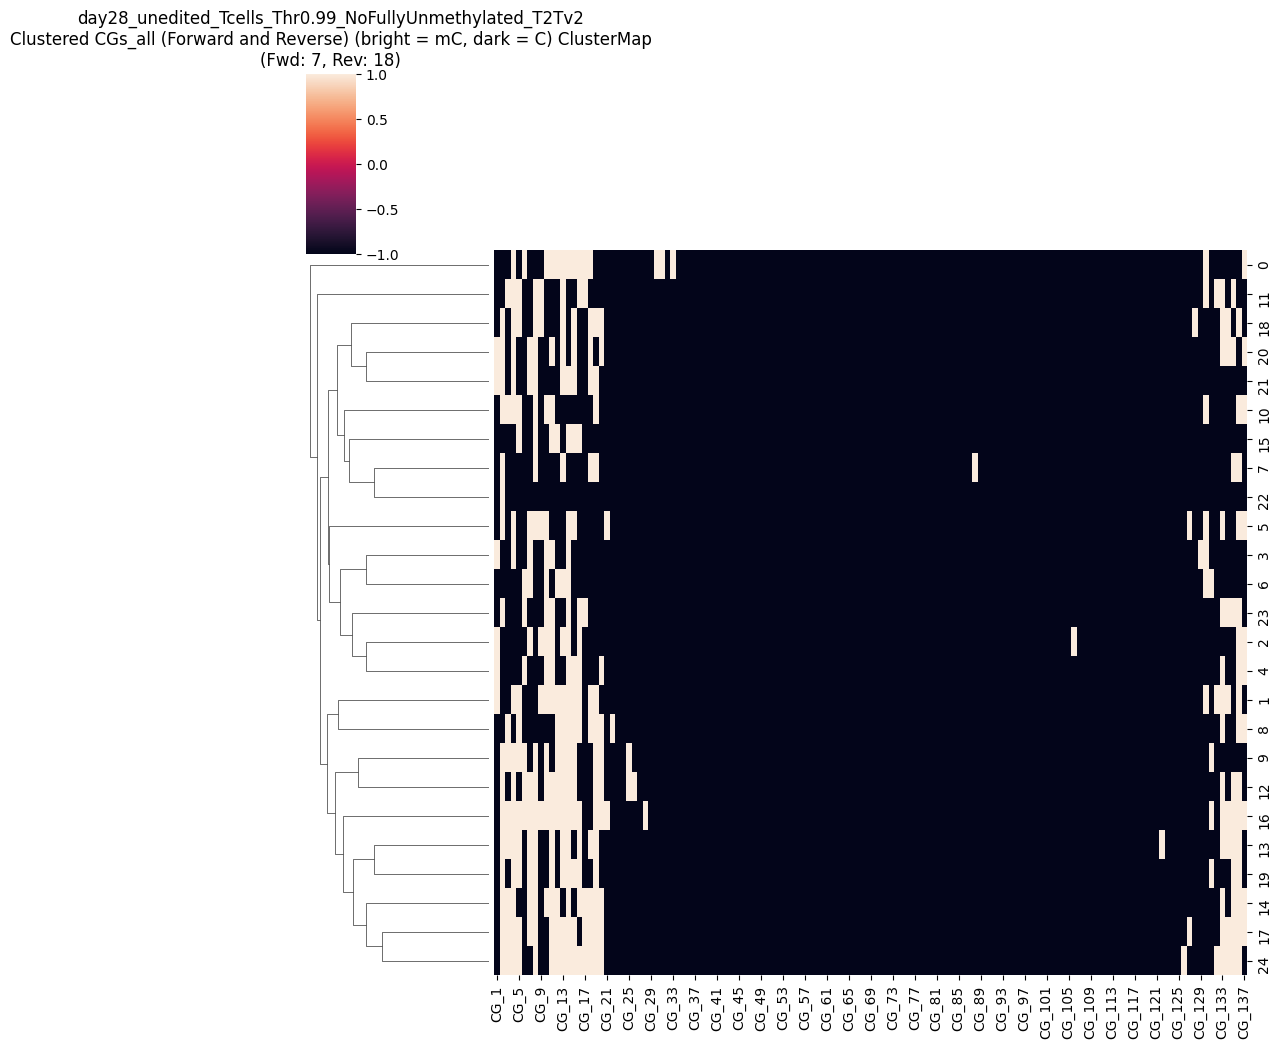

CGs_all saved as CG_137_padded_reads_day28_unedited_Tcells_Thr0.99_NoFullyUnmethylated_T2Tv2_mCthresh0.99_t2t_v2_0_chr1:206583354-206589854_2025-08-02_units_combined_numFWD7_numRVS18.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


In [31]:
"""
Main pipeline for processing and visualizing CpG units on forward and reverse strands 
"""
try:
    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates, CG_info_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


In [32]:
# save_padded_reads_name_np[:-4]

### Results for ROI Extraction from Unedited T cells:
From around  reads located near the ROI, 

only  reads have non-zery mC

(with 70, 90 and 99% confidance at least one methylated C  in the mC call) 


Forward reads:  

Reverse reads:   

# Analyze the Edited CRISPROff cells from the same T prime cells from Elaine ES

System: Linux
Release: 6.8.0-60-generic
Version: #63~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Tue Apr 22 19:00:15 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
Region length: 6500
No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.99 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20250721_Day28_CROFF_T_cells_minion_merged_flowc…

          |    0%

          | Transferring 28 from reads.CG,0.txt into reads.combined_basemods.h5, new size 28   0% | 00:00<?

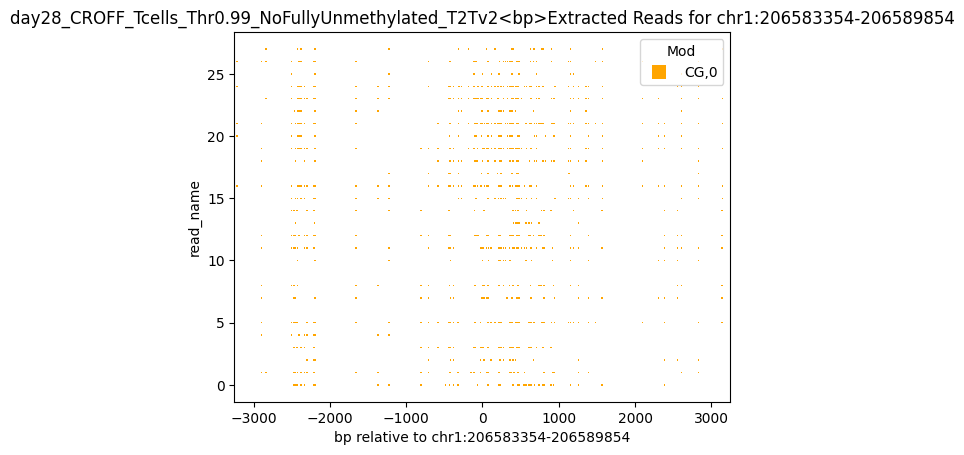

Found read coordinates: 28 reads
Unique read names with methylation: 26
Found 13 reads with full coverage
Reads with methylation data: 26
Overlap between full coverage and methylation: 13
After full coverage filtering: 587 reads with methylation data
Final result: 587 reads with methylation information out of 28 total reads


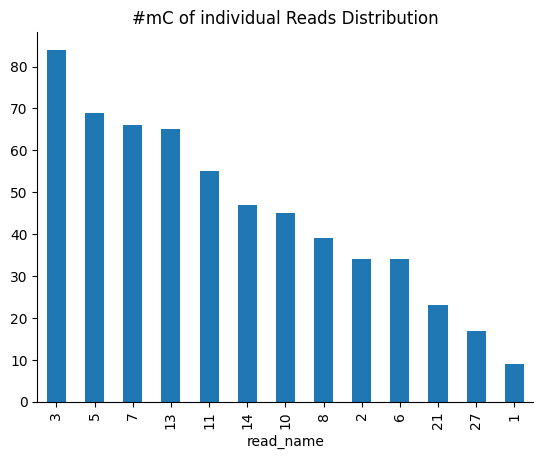

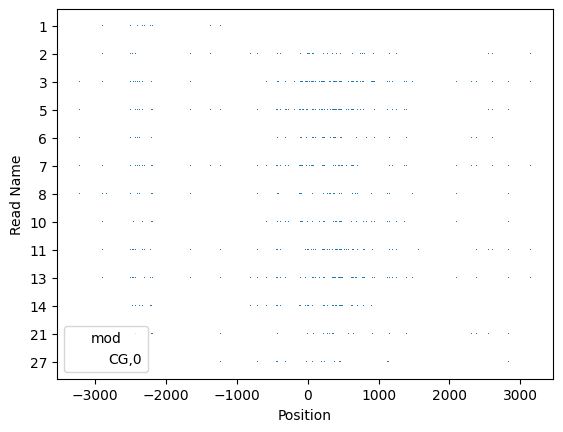

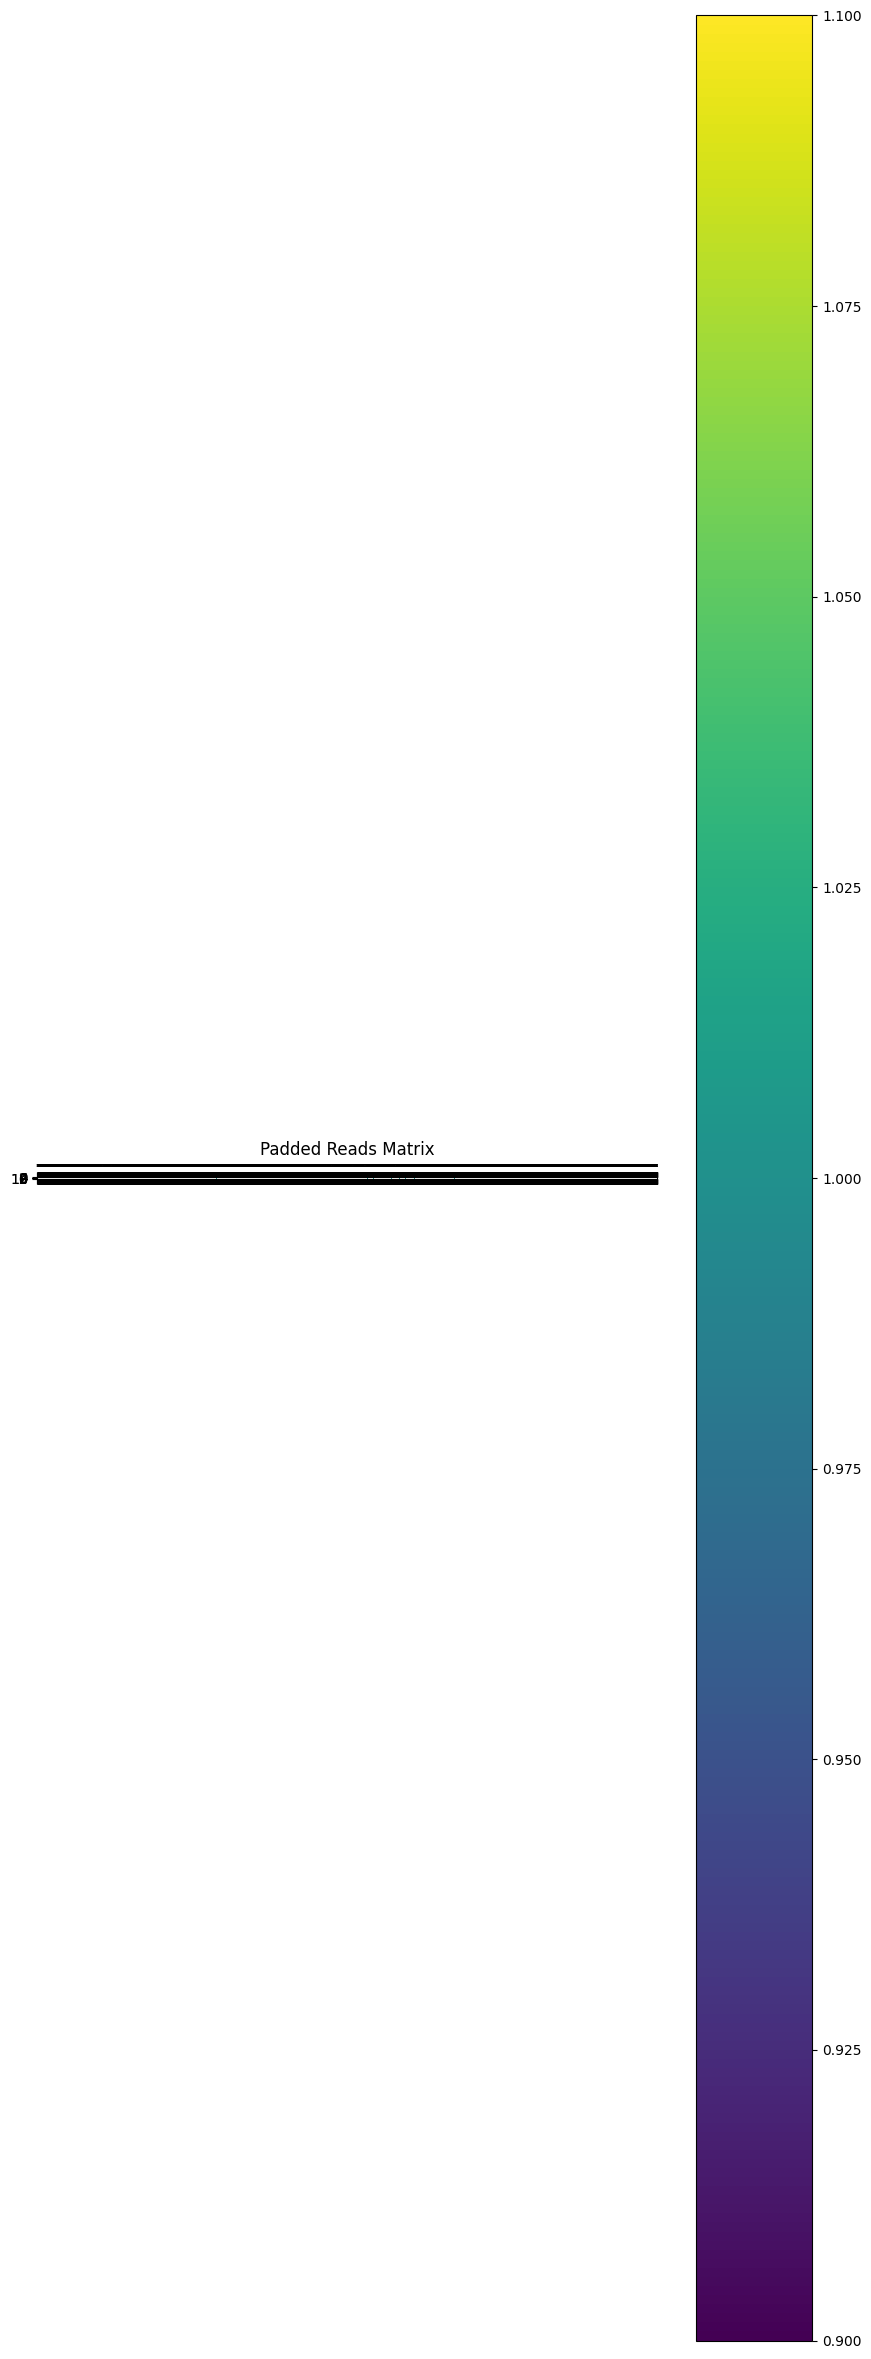

Padded reads saved to padded_reads_day28_CROFF_Tcells_Thr0.99_NoFullyUnmethylated_T2Tv2_mCthresh0.99_t2t_v2_0_chr1:206583354-206589854_2025-08-02.npy


In [33]:
system_info()

experiment_name = "day28_CROFF_Tcells_Thr0.99_NoFullyUnmethylated_T2Tv2" 
threshold_mC = 0.99 # 0.75 # 0.99
bam_path = "/home/michalula/data/cas9_nanopore/data/20250721_nCATs_Tcells_CROFF_Day28/mergered_outputs/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20250721_Day28_CROFF_T_cells_minion_merged_flowcells_output.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9/pod5_converted_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"


save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

# motifs=['CG,0']
# ref_seq_list = get_reference_sequence(ref_genome_v1_1_file, region_chr, region_start, region_end)


extract_file, extract_regions = extract_from_bam(
    experiment_name=experiment_name,
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)

keep_unmethylated_reads = False
if extract_file:
    if not keep_unmethylated_reads:
        reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)

        padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    else:
        reads_df, regions_dict = process_extracted_reads_no_fully_unmethylated(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)
        padded_reads = create_padded_reads_no_fully_unmethylated(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)

In [34]:
save_padded_reads_name_np

'padded_reads_day28_CROFF_Tcells_Thr0.99_NoFullyUnmethylated_T2Tv2_mCthresh0.99_t2t_v2_0_chr1:206583354-206589854_2025-08-02.npy'

Padded reads loaded successfully.


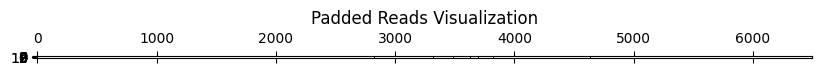

Visualization completed.
Region length: 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTAAAATTTCTTTTCTTTTTTTTTTTTTGAGACGGAGTTTTGCTCTCGTCCCCCAGGCTGGAGTGCAATGGCGCGATCTTGGCTCACTGCAACCTCCGCCTCCCAGGTTCAAGTGATTCTCCCGCCTCAGCCTCCCAAGTAGCTGGGATTACAGGCACCTGCCACAACGCCCAGCCAATTTTTGTATTTTTAGTAGAGACGGG

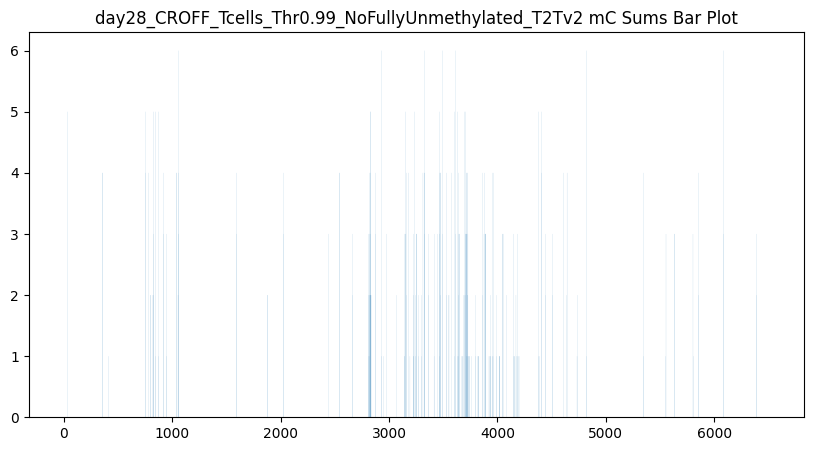

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


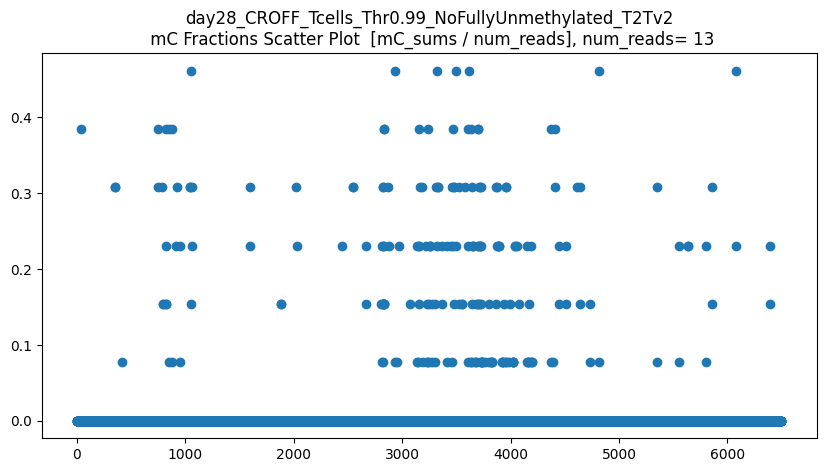

len(CGs_all) = 13
CGs_all.shape = (13, 137)
len(CGs_all_on_fwd_C_sums) = 6500
CGs_all_on_fwd_C_sums.shape = (6500,)


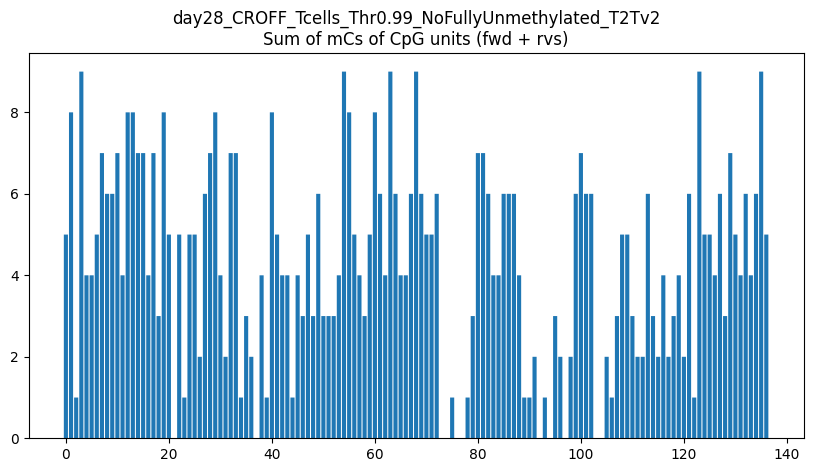

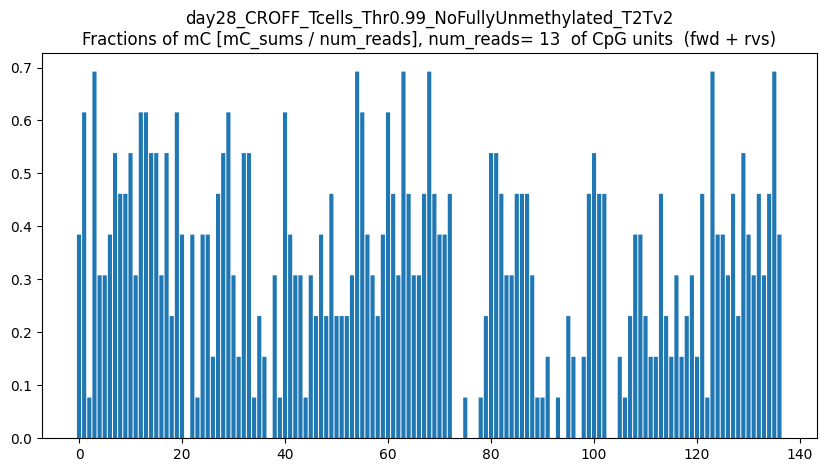

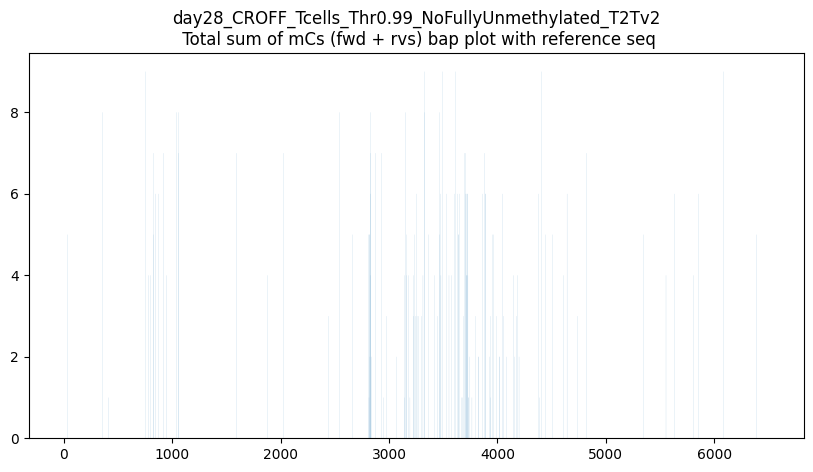

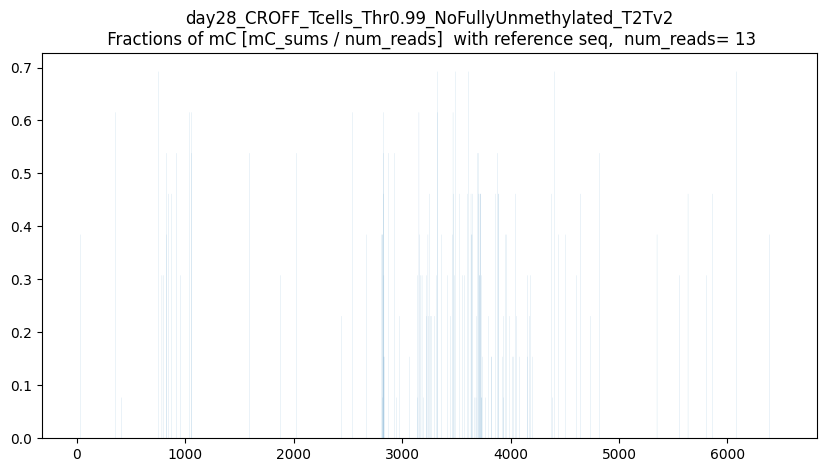

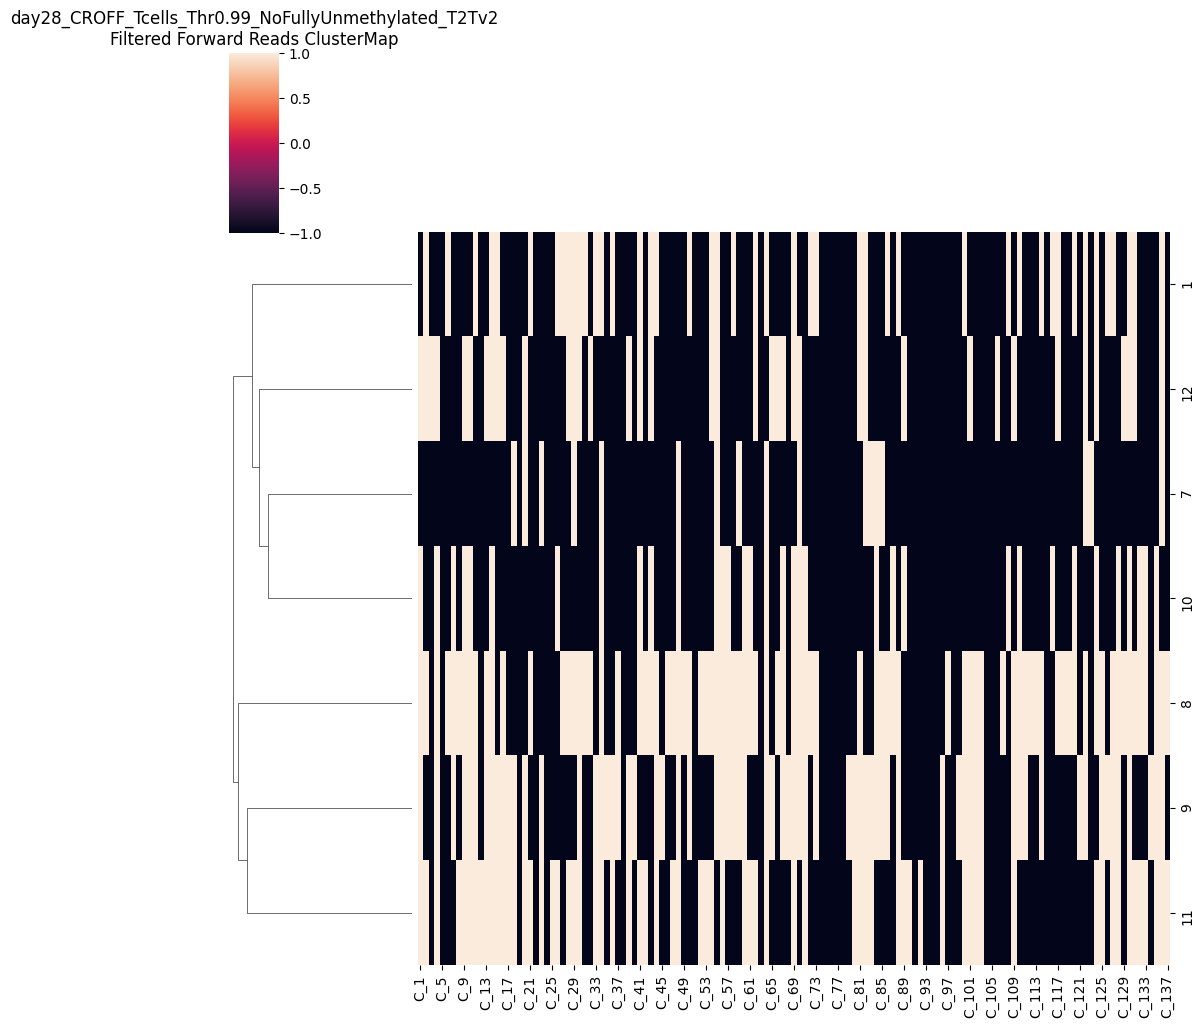

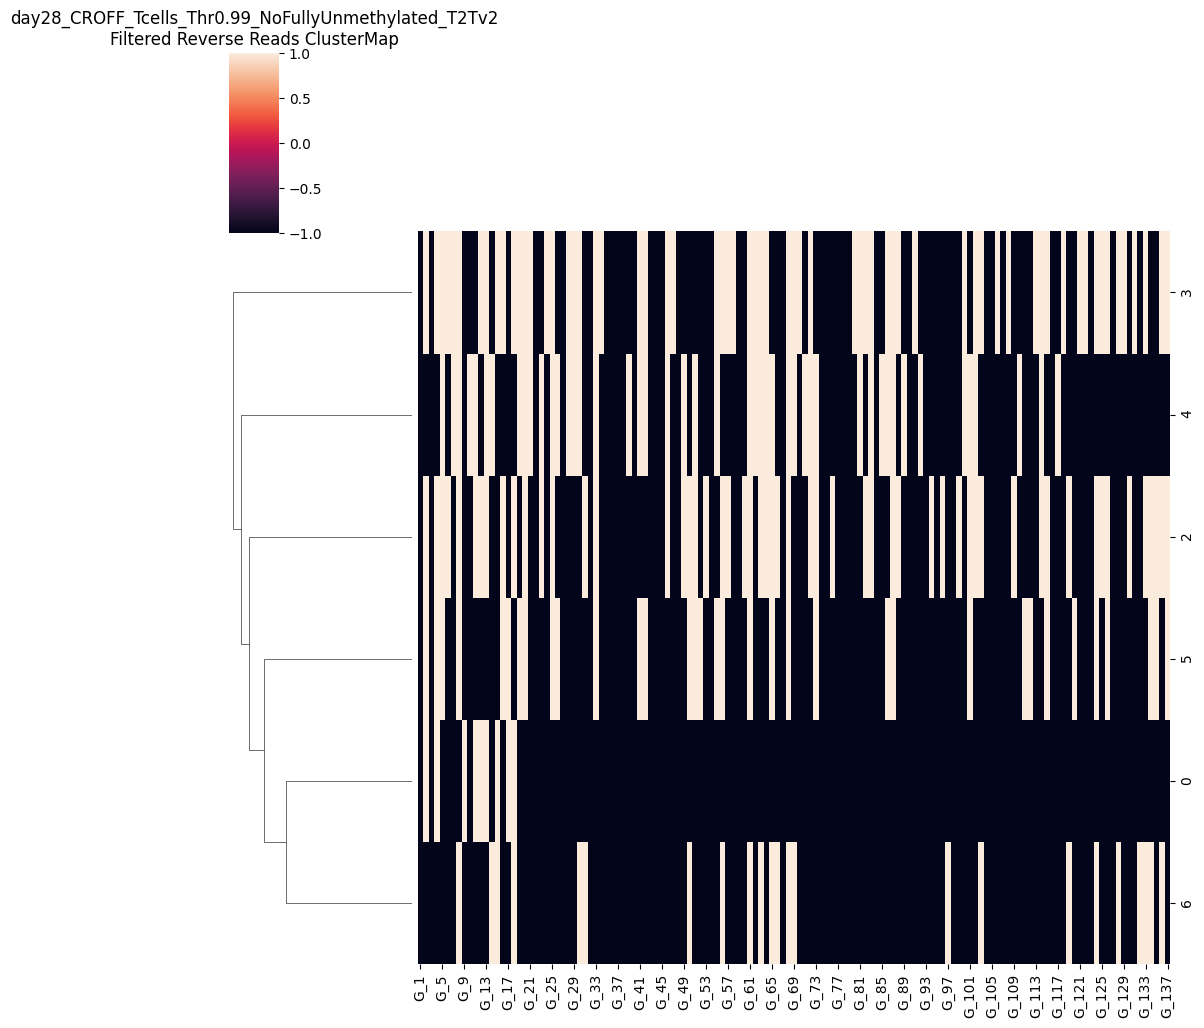

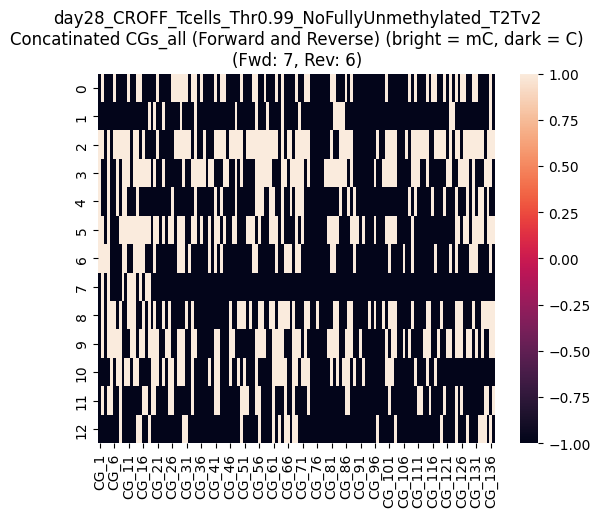

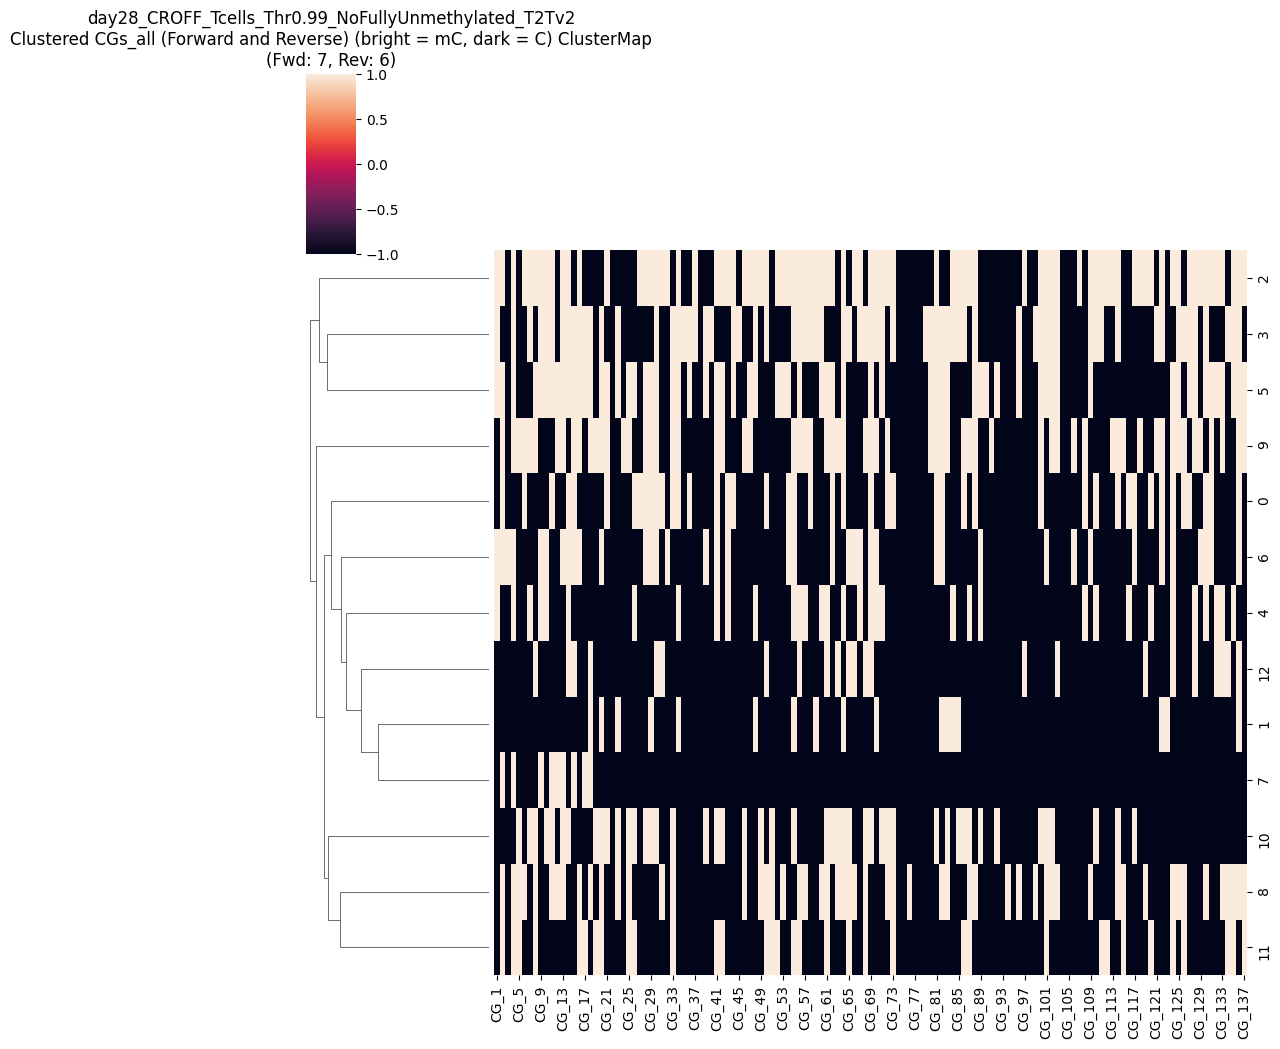

CGs_all saved as CG_137_padded_reads_day28_CROFF_Tcells_Thr0.99_NoFullyUnmethylated_T2Tv2_mCthresh0.99_t2t_v2_0_chr1:206583354-206589854_2025-08-02_units_combined_numFWD7_numRVS6.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


In [35]:
"""
Main pipeline for processing and visualizing CpG units on forward and reverse strands 
"""
try:
    # Process pipeline
    # CGs_all_silenced, C_fwd_df_silenced, G_revs_df_silenced, padded_reads_df_silenced
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates, CG_info_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


### ROI Extraction Results from  Silence  cells from ES:
From around  reads located near the ROI, 

 ~ reads have non-zery mC 
 
 (with 90% confidance in at least one methylated C the mC calls ) 


Forward reads:  

Reverse reads:  

~ 90% of those Day 6 CRISPROff cells are silenced according to Elaines Flow data

# Check 100% methylation confidance:

System: Linux
Release: 6.8.0-60-generic
Version: #63~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Tue Apr 22 19:00:15 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
region_length 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTA

          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20250721_nCATs_Tcells_UNEDITED_Day28_minion_merg…

          |    0%

          | Transferring 53 from reads.CG,0.txt into reads.combined_basemods.h5, new size 53   0% | 00:00<?

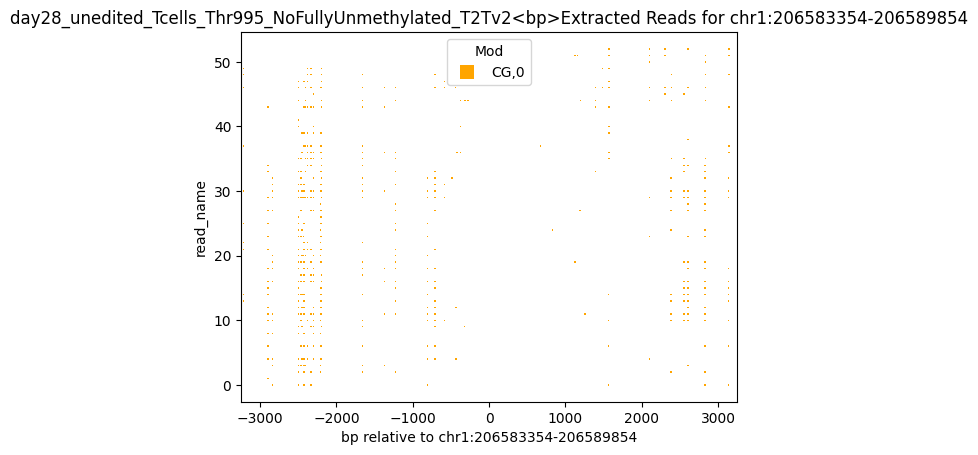

Found read coordinates: 53 reads
Unique read names with methylation: 50
Found 26 reads with full coverage
Reads with methylation data: 50
Overlap between full coverage and methylation: 25
After full coverage filtering: 273 reads with methylation data
Final result: 273 reads with methylation information out of 53 total reads


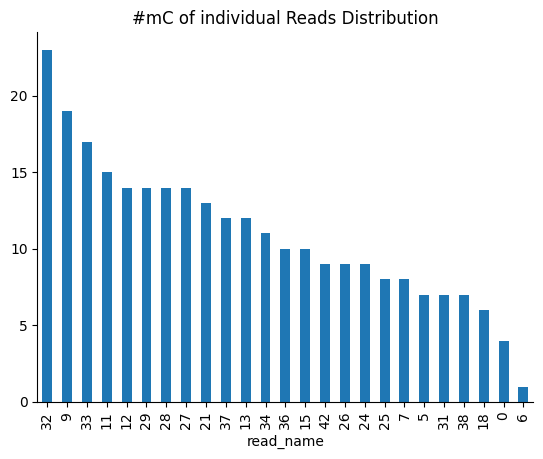

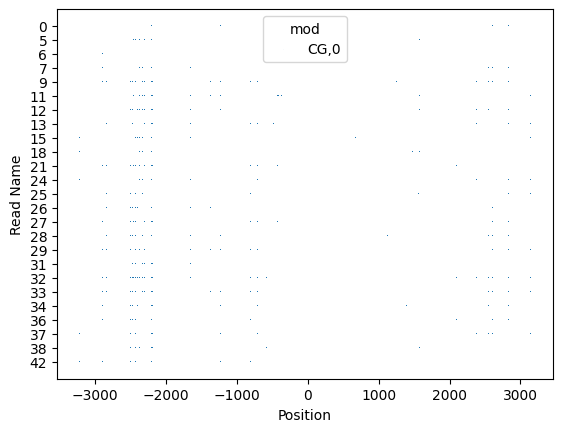

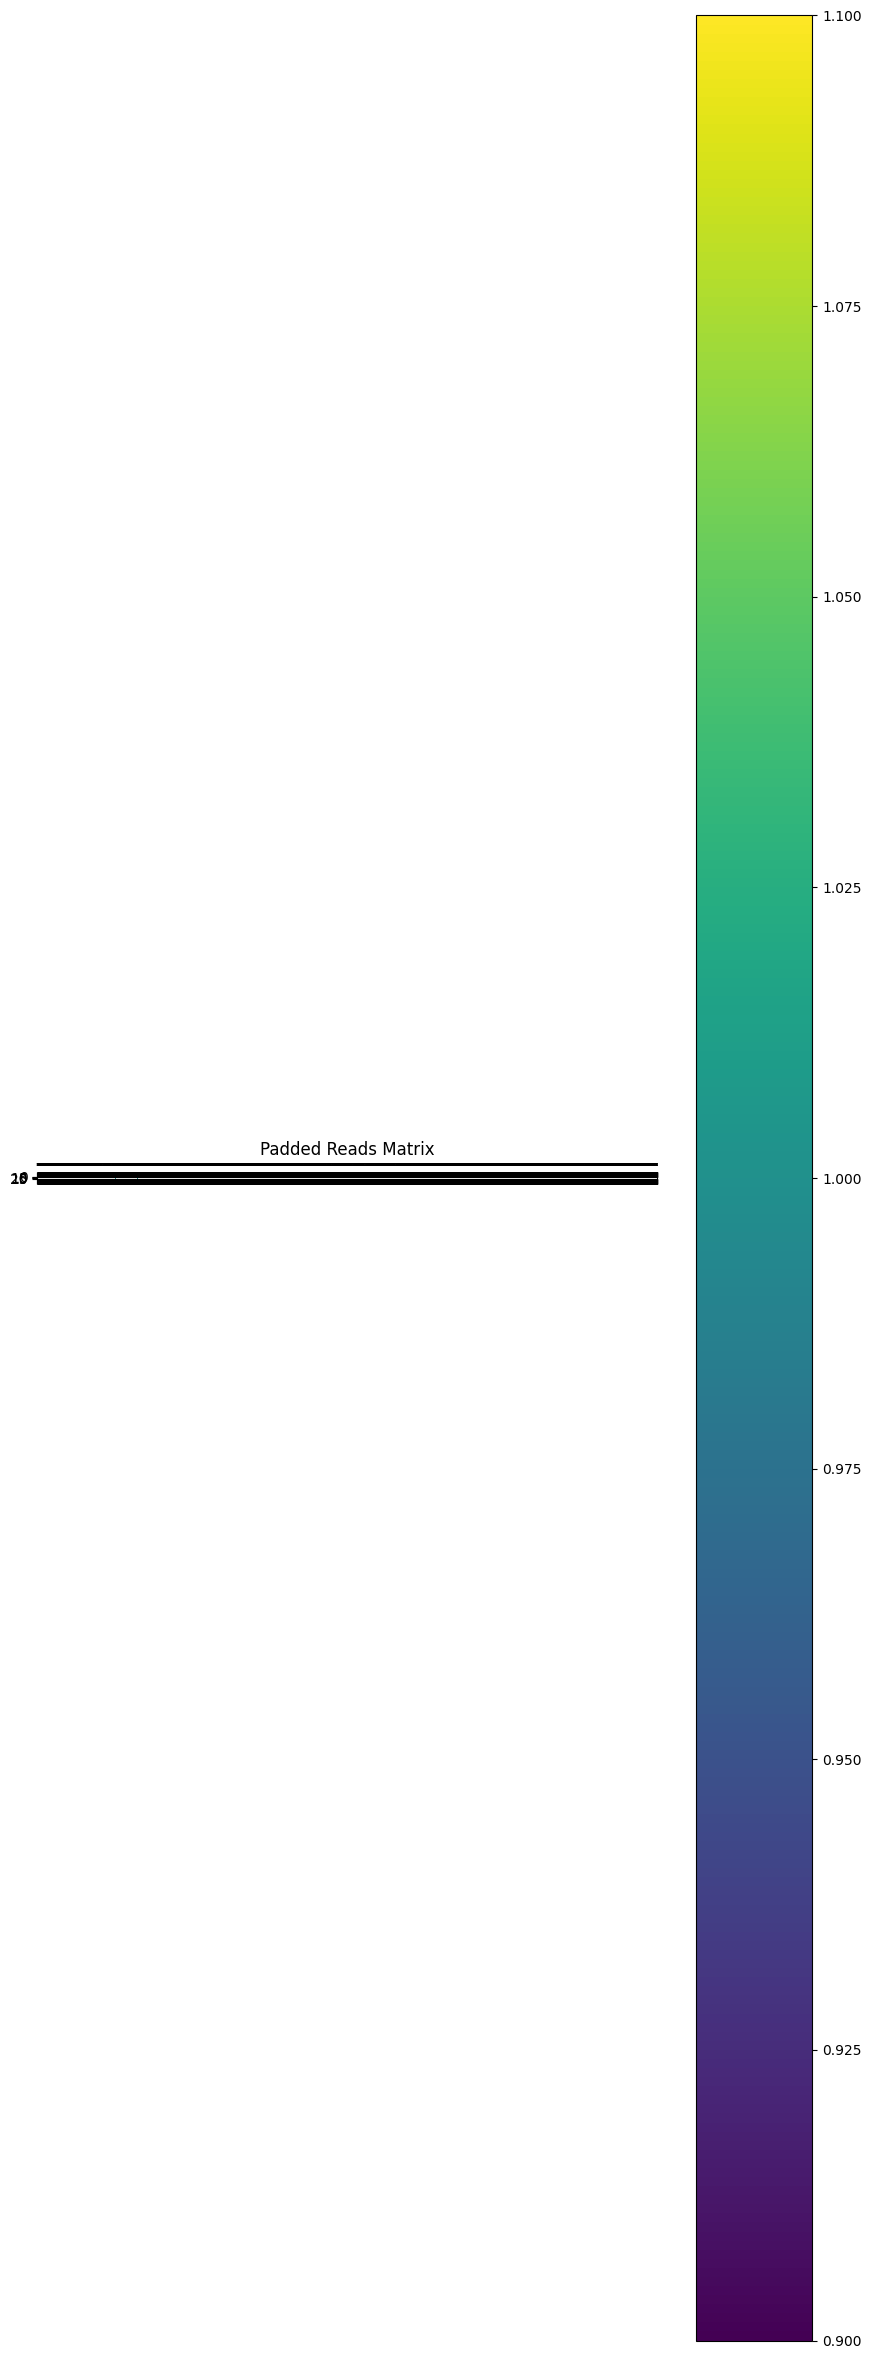

Padded reads saved to padded_reads_day28_unedited_Tcells_Thr995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-08-02.npy
Padded reads loaded successfully.


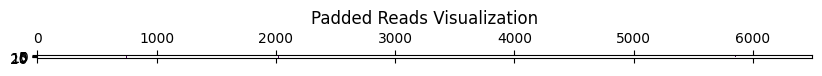

Visualization completed.
Region length: 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTAAAATTTCTTTTCTTTTTTTTTTTTTGAGACGGAGTTTTGCTCTCGTCCCCCAGGCTGGAGTGCAATGGCGCGATCTTGGCTCACTGCAACCTCCGCCTCCCAGGTTCAAGTGATTCTCCCGCCTCAGCCTCCCAAGTAGCTGGGATTACAGGCACCTGCCACAACGCCCAGCCAATTTTTGTATTTTTAGTAGAGACGGG

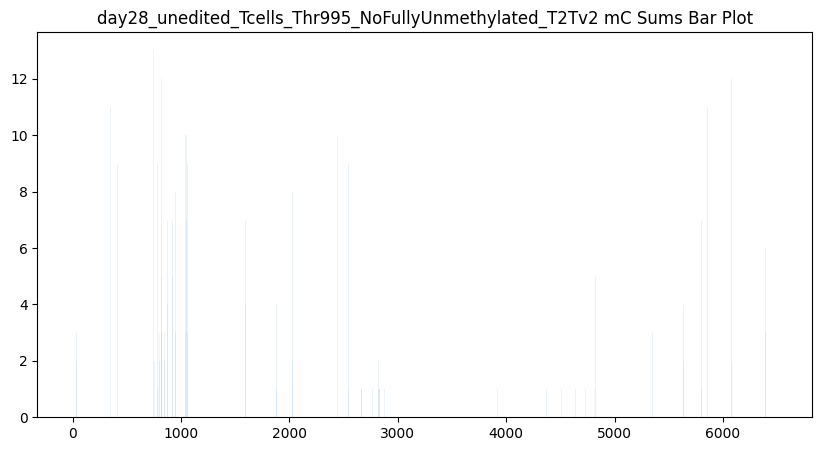

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


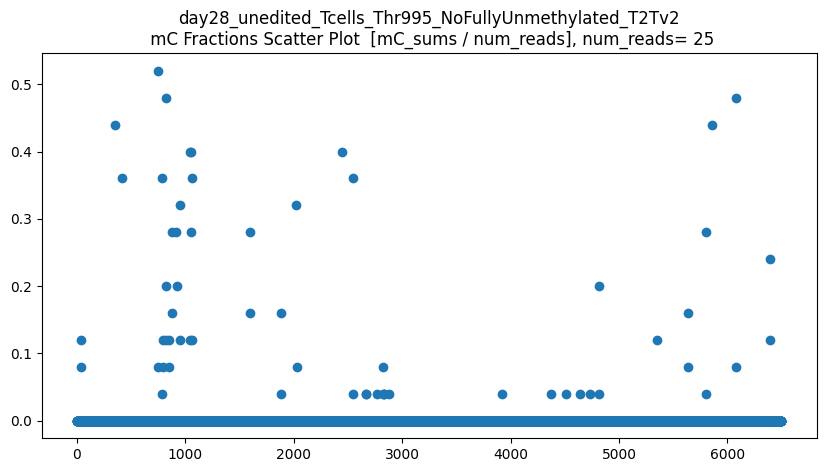

len(CGs_all) = 25
CGs_all.shape = (25, 137)
len(CGs_all_on_fwd_C_sums) = 6500
CGs_all_on_fwd_C_sums.shape = (6500,)


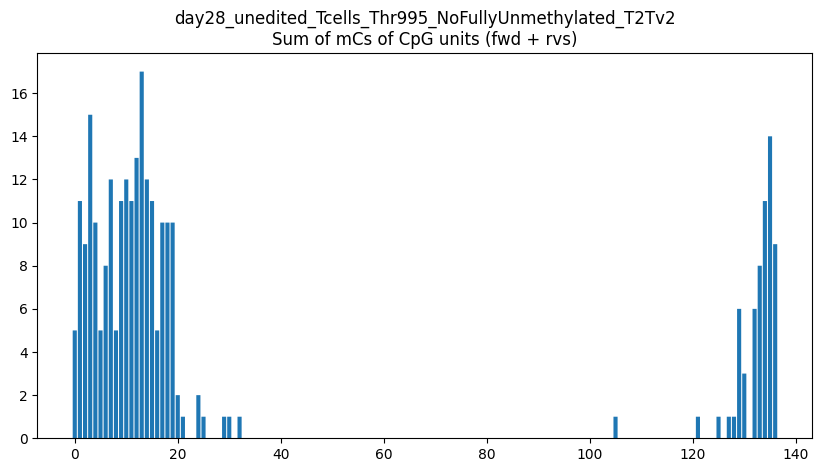

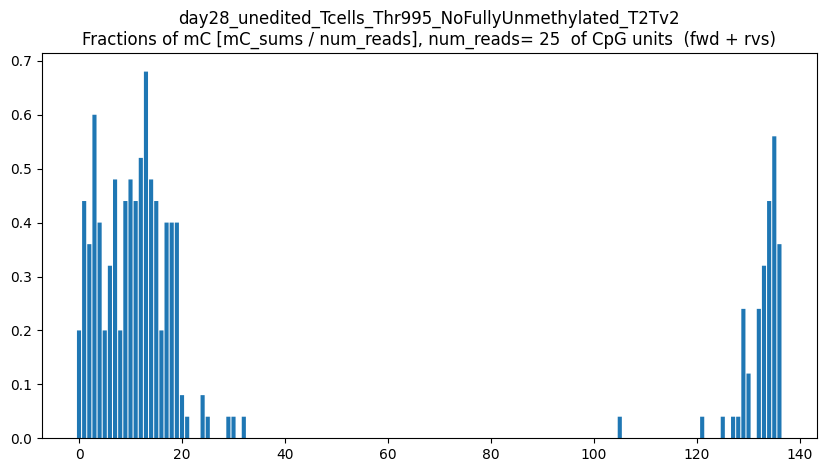

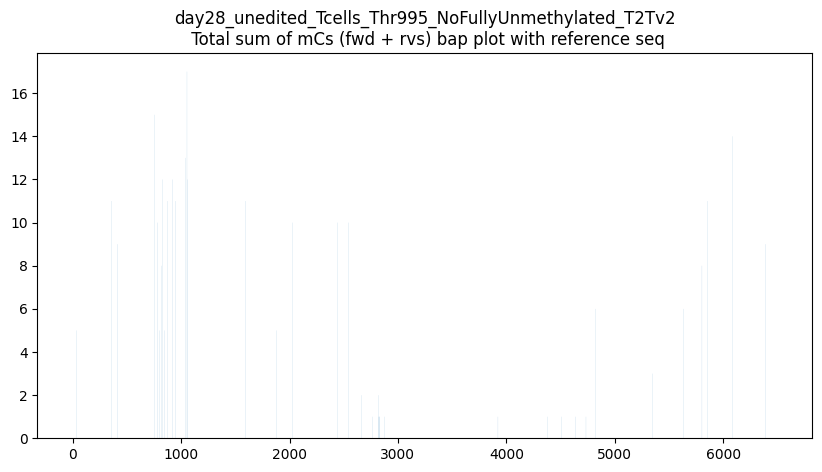

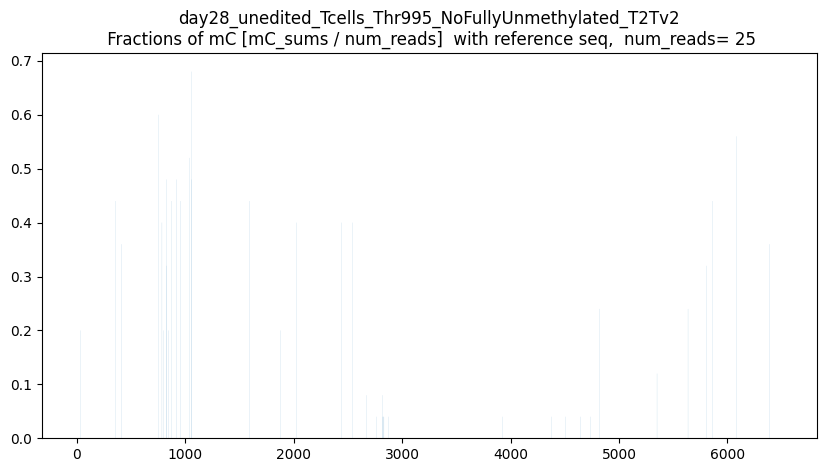

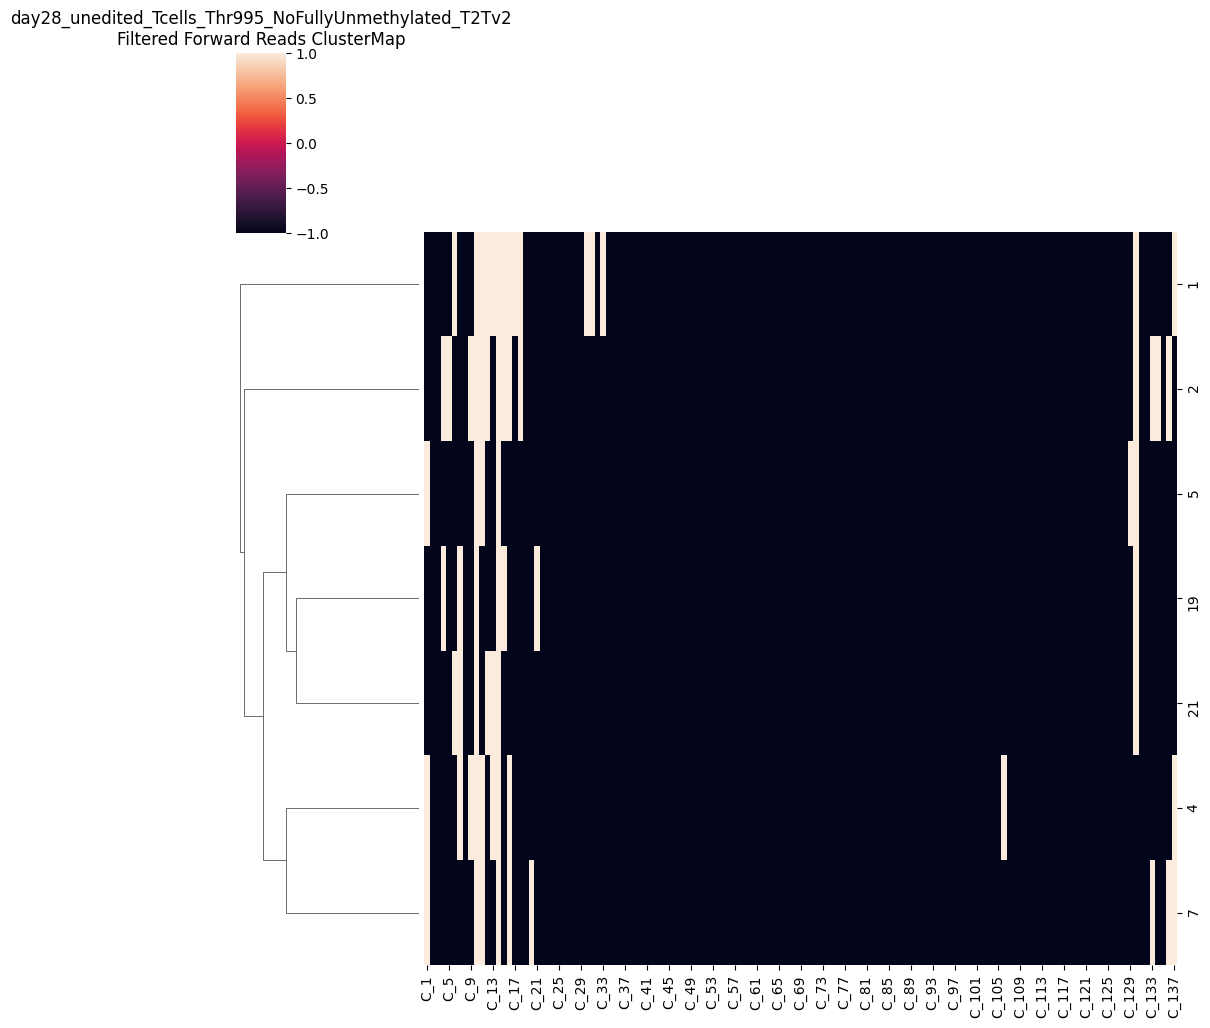

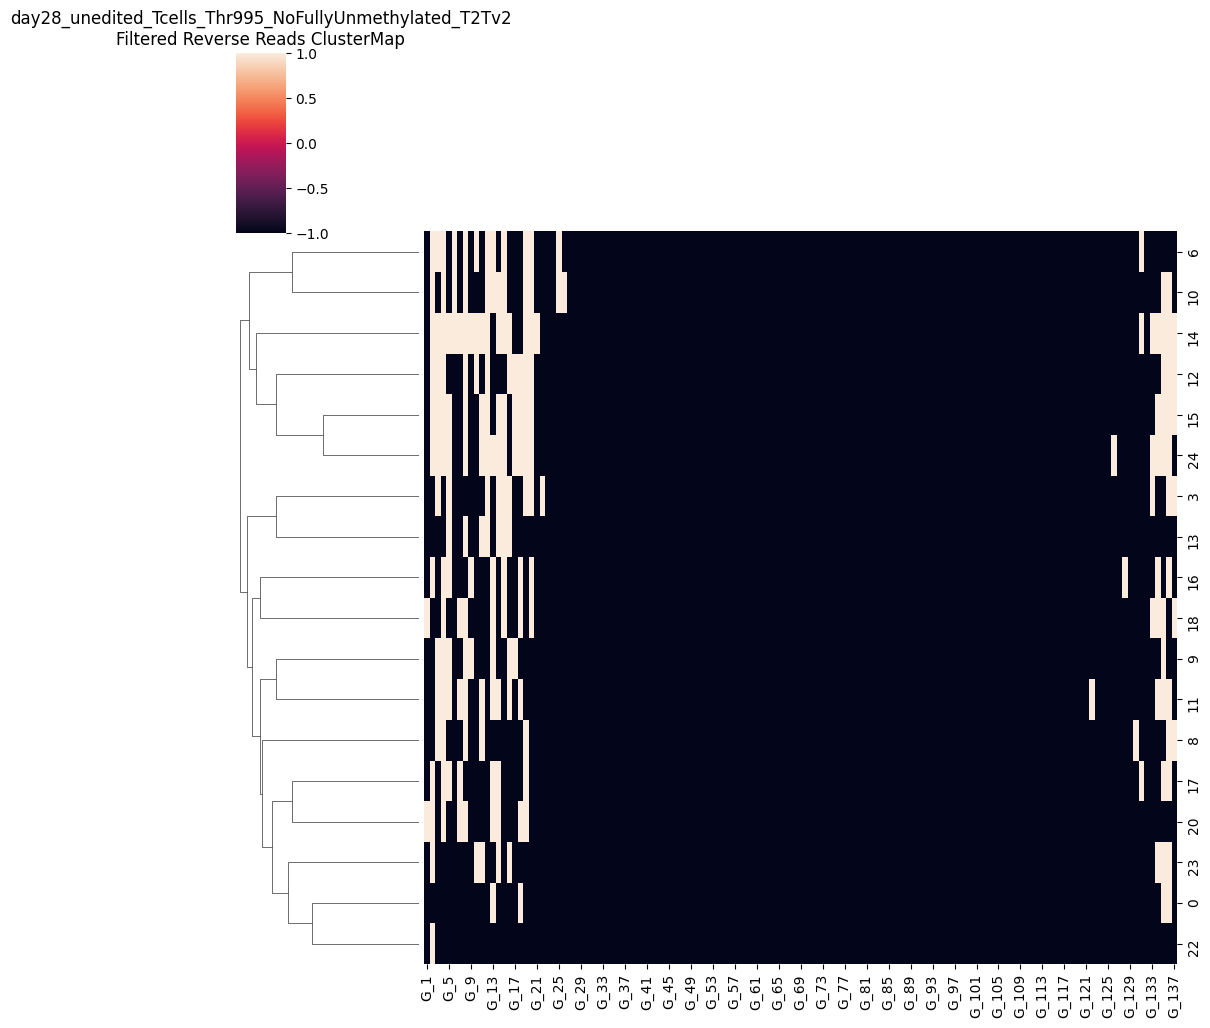

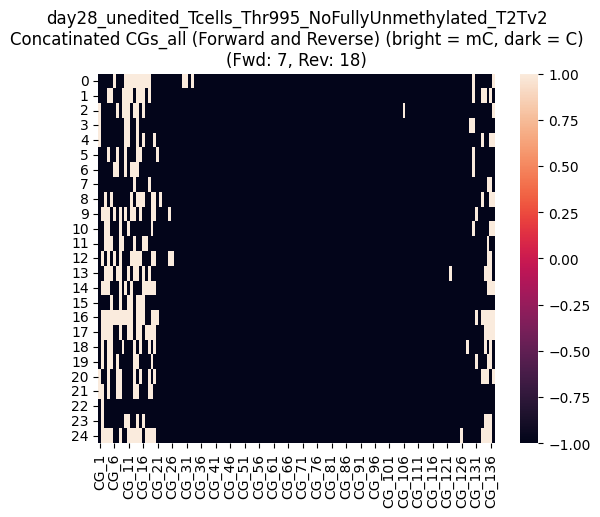

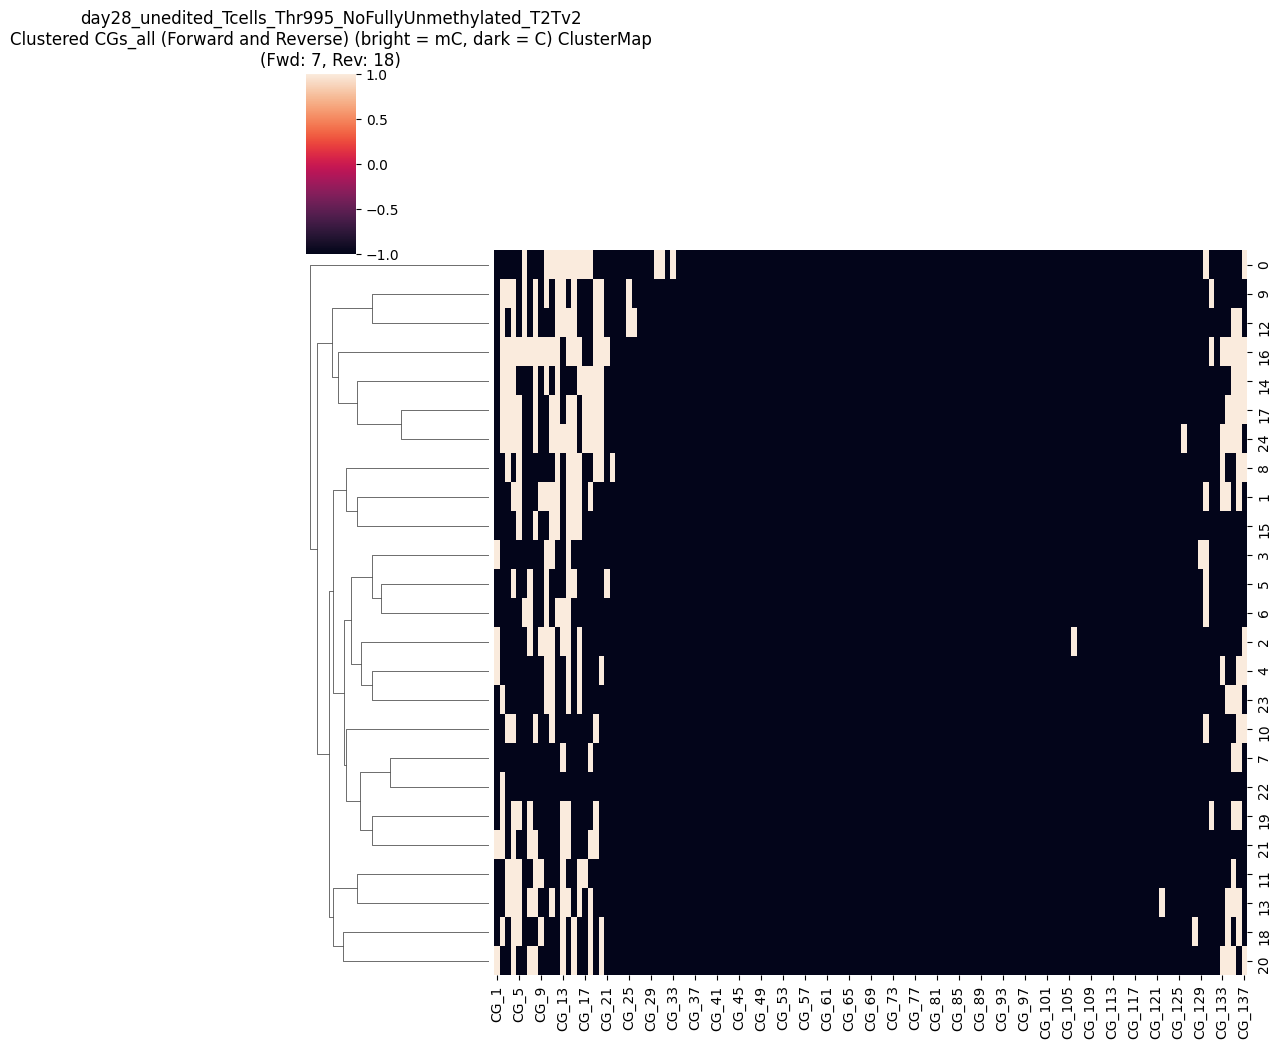

CGs_all saved as CG_137_padded_reads_day28_unedited_Tcells_Thr995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-08-02_units_combined_numFWD7_numRVS18.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


'padded_reads_day28_unedited_Tcells_Thr995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-08-02.npy'

In [60]:
system_info()


experiment_name = "day28_unedited_Tcells_Thr995_NoFullyUnmethylated_T2Tv2"
threshold_mC = 0.995 # 1 # 0.99 #  0.9 #0.99
bam_path = "/home/michalula/data/cas9_nanopore/data/20250721_nCATs_Tcells_UNEDITED_Day28/merged_outputs/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20250721_nCATs_Tcells_UNEDITED_Day28_minion_merged_flowcells_output.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

date_today = datetime.today().strftime('%Y-%m-%d') 
print("region_length", region_length)


save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

motifs=['CG,0']
ref_seq_list = get_reference_sequence(ref_genome_path, region_chr, region_start, region_end)


extract_file, extract_regions = extract_from_bam(
    experiment_name=experiment_name,
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)

keep_unmethylated_reads = False

if extract_file:
    if not keep_unmethylated_reads:
        reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)

        padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    else:
        reads_df, regions_dict = process_extracted_reads_no_fully_unmethylated(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)
        padded_reads = create_padded_reads_no_fully_unmethylated(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)

"""
Main pipeline for processing and visualizing CpG units on forward and reverse strands 
"""
try:
    # Process pipeline
    # CGs_all_silenced, C_fwd_df_silenced, G_revs_df_silenced, padded_reads_df_silenced
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates, CG_info_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")

save_padded_reads_name_np


## CRISPRoff keep 100% mC 

System: Linux
Release: 6.8.0-60-generic
Version: #63~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Tue Apr 22 19:00:15 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
Region length: 6500
No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.995 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20250721_Day28_CROFF_T_cells_minion_merged_flowc…

          |    0%

          | Transferring 28 from reads.CG,0.txt into reads.combined_basemods.h5, new size 28   0% | 00:00<?

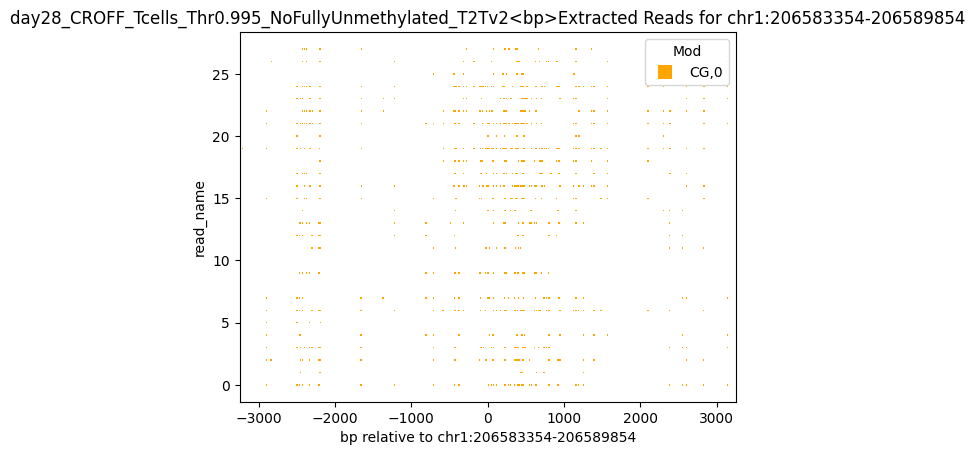

Found read coordinates: 28 reads
Unique read names with methylation: 26
Found 13 reads with full coverage
Reads with methylation data: 26
Overlap between full coverage and methylation: 13
After full coverage filtering: 469 reads with methylation data
Final result: 469 reads with methylation information out of 28 total reads


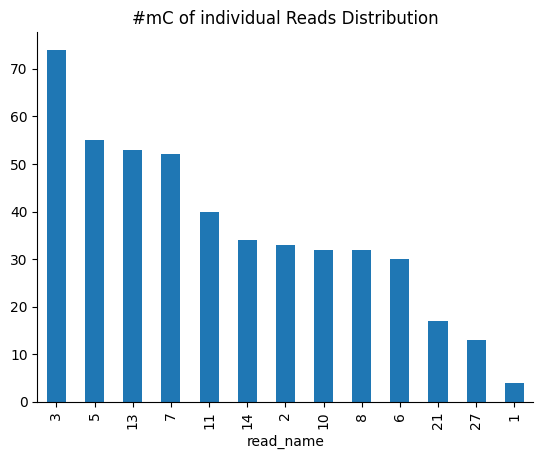

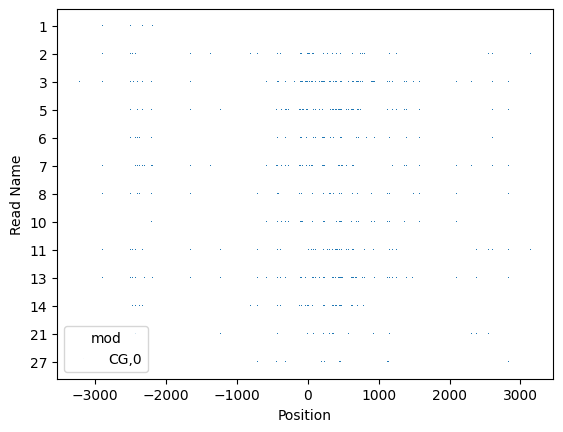

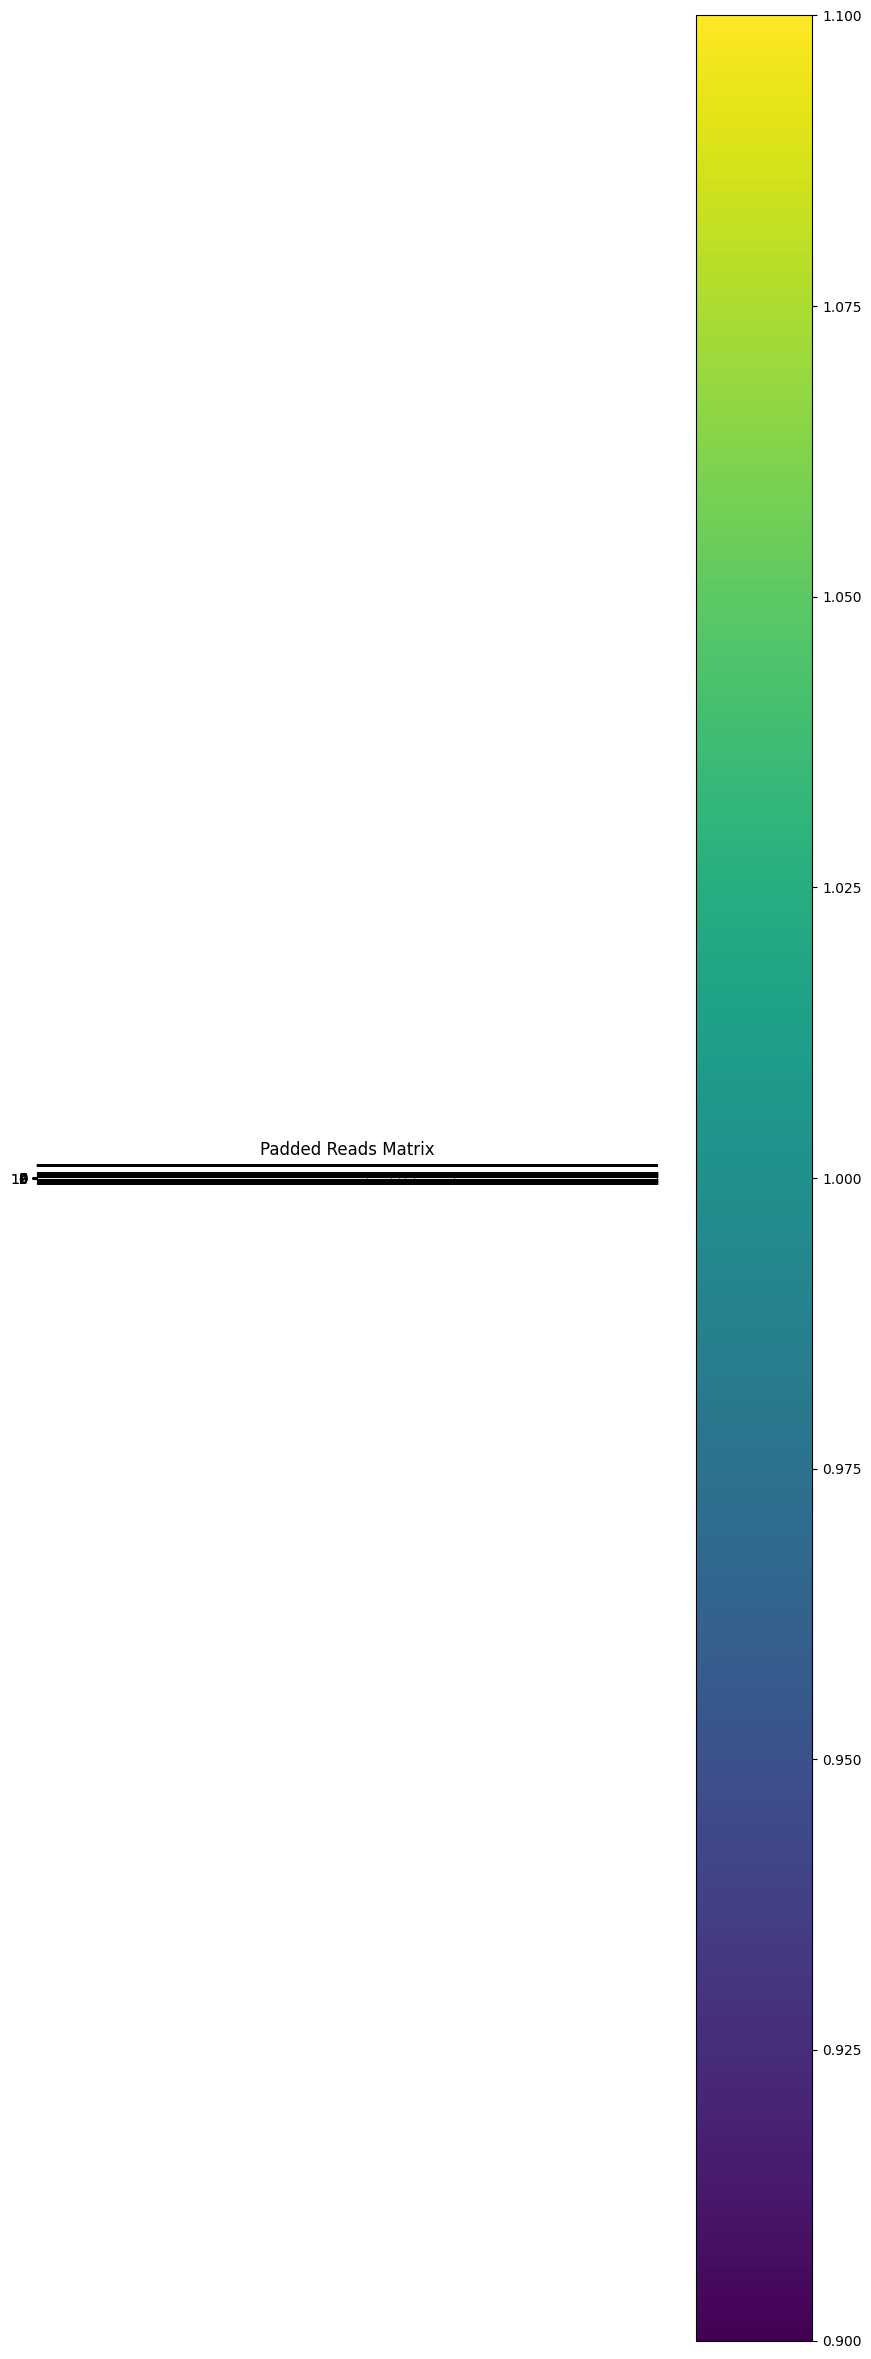

Padded reads saved to padded_reads_day28_CROFF_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-08-02.npy
Padded reads loaded successfully.


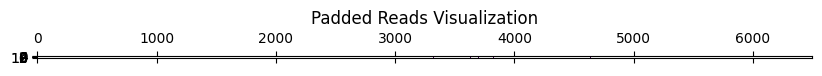

Visualization completed.
Region length: 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTAAAATTTCTTTTCTTTTTTTTTTTTTGAGACGGAGTTTTGCTCTCGTCCCCCAGGCTGGAGTGCAATGGCGCGATCTTGGCTCACTGCAACCTCCGCCTCCCAGGTTCAAGTGATTCTCCCGCCTCAGCCTCCCAAGTAGCTGGGATTACAGGCACCTGCCACAACGCCCAGCCAATTTTTGTATTTTTAGTAGAGACGGG

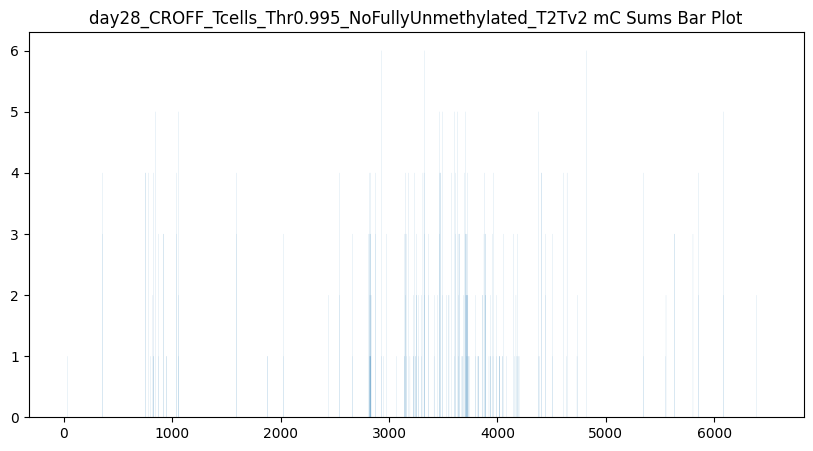

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


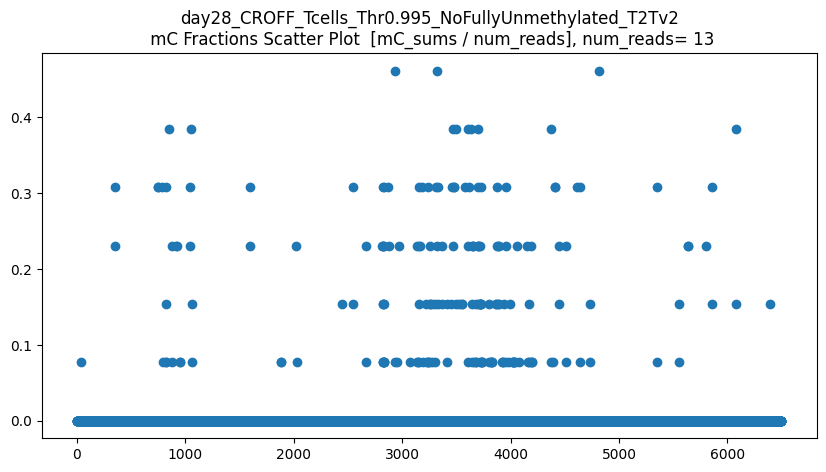

len(CGs_all) = 13
CGs_all.shape = (13, 137)
len(CGs_all_on_fwd_C_sums) = 6500
CGs_all_on_fwd_C_sums.shape = (6500,)


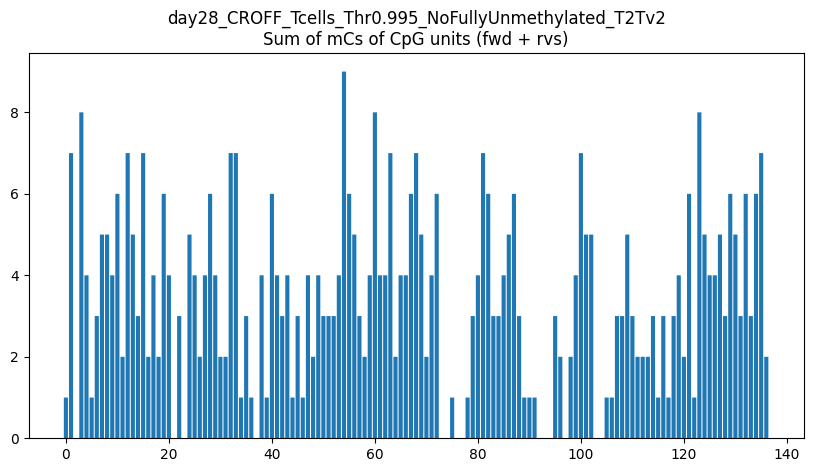

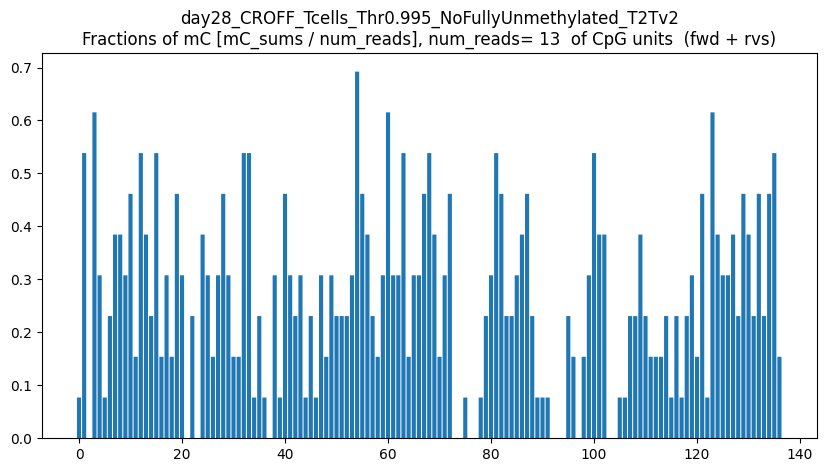

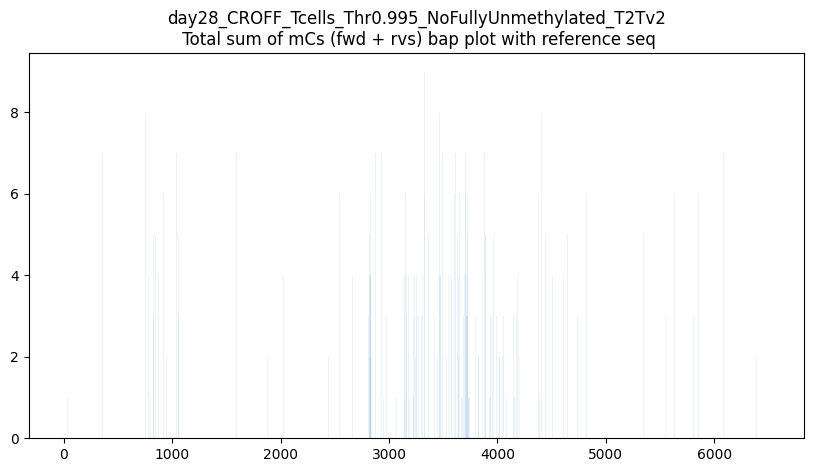

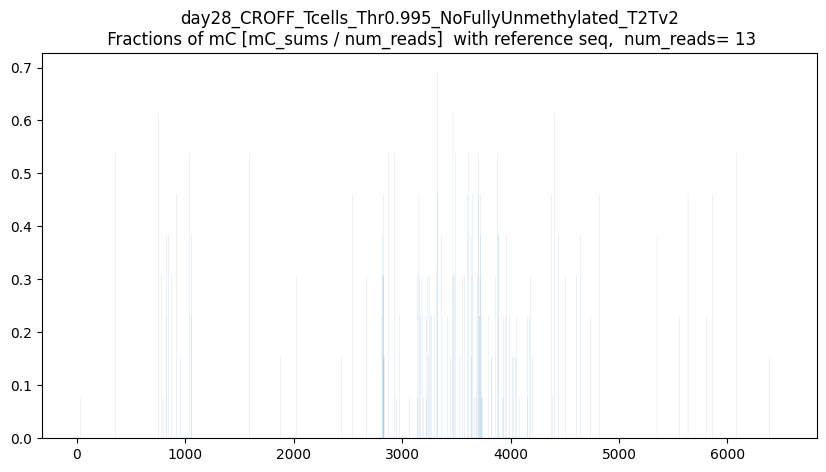

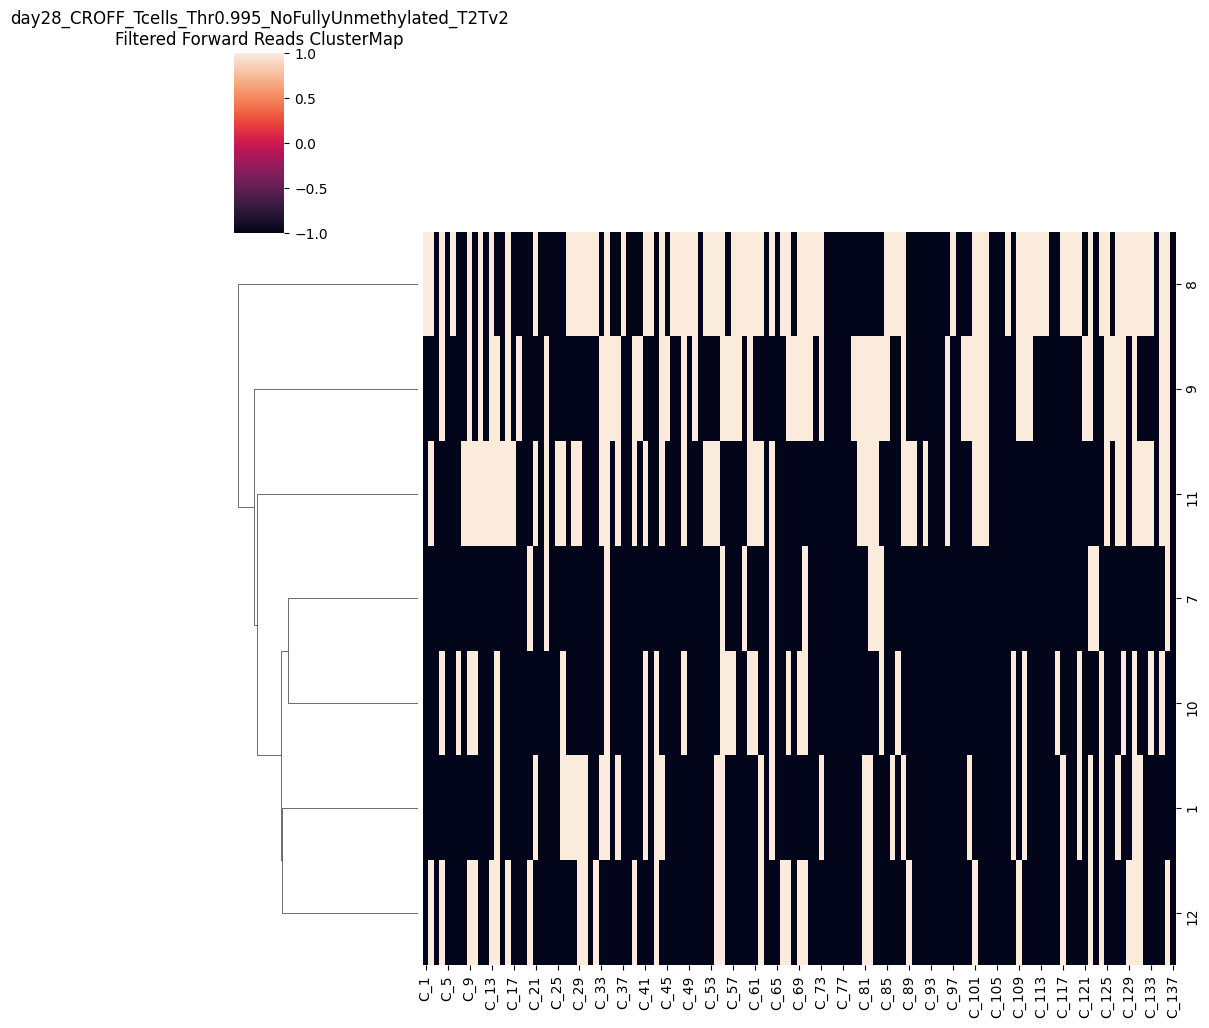

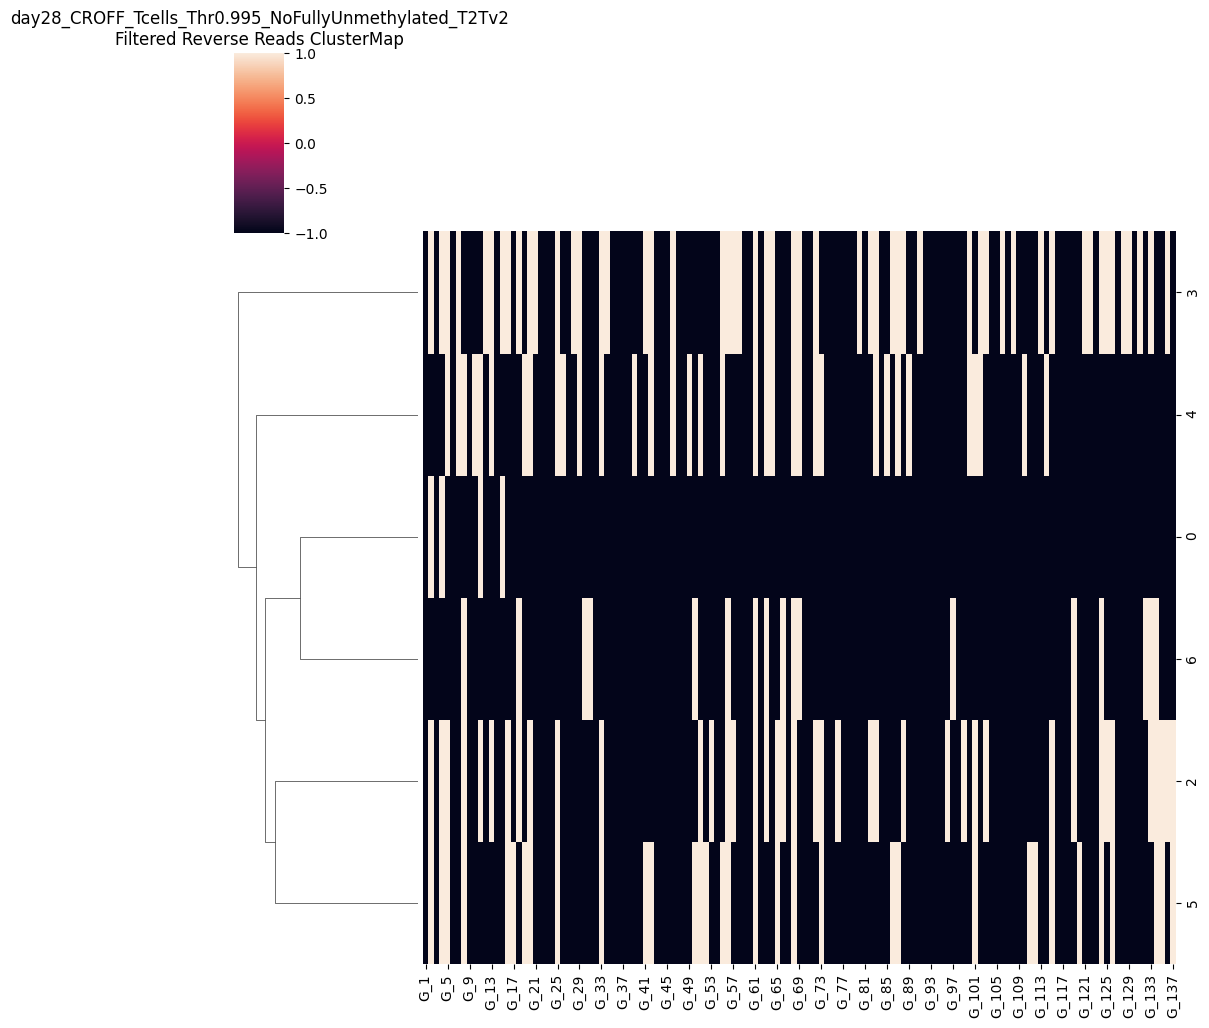

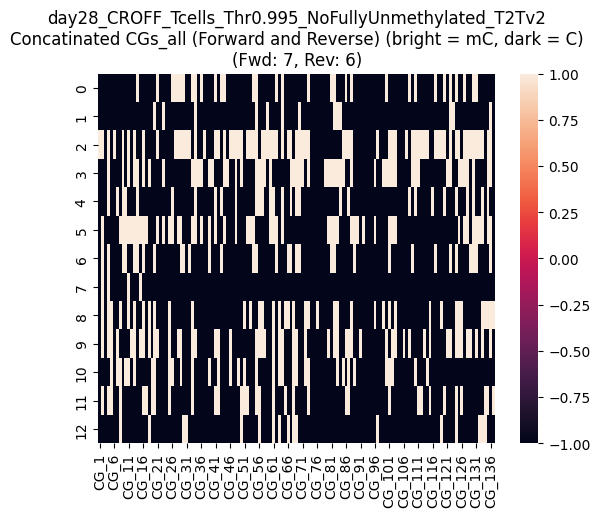

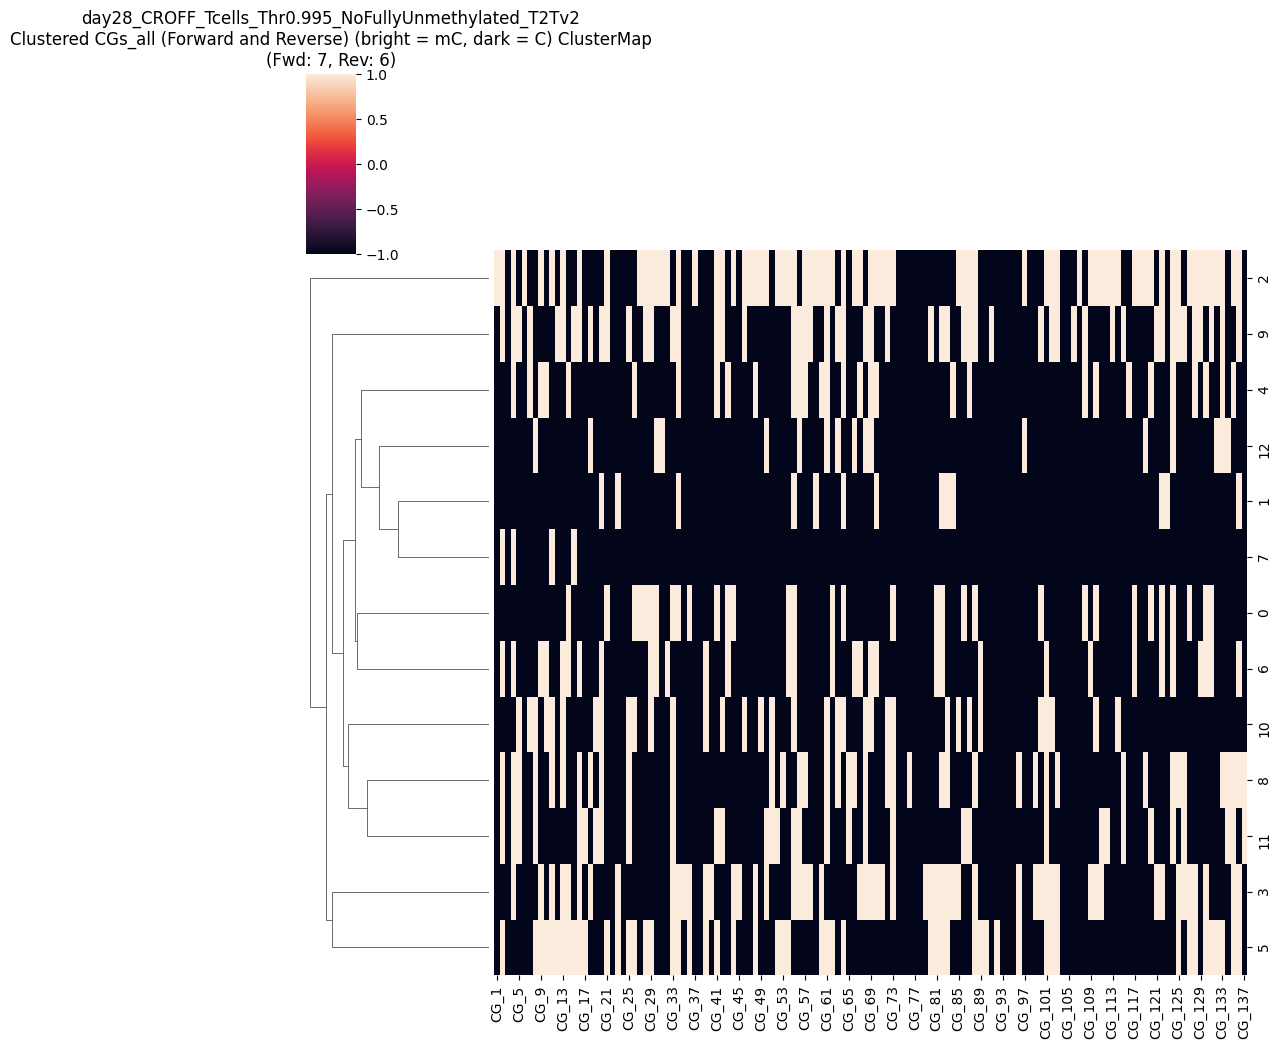

CGs_all saved as CG_137_padded_reads_day28_CROFF_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-08-02_units_combined_numFWD7_numRVS6.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


'padded_reads_day28_CROFF_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-08-02.npy'

In [61]:
system_info()

experiment_name = "day28_CROFF_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2" 
threshold_mC = 0.995 # 0.99 # 0.75 # 0.99
bam_path = "/home/michalula/data/cas9_nanopore/data/20250721_nCATs_Tcells_CROFF_Day28/mergered_outputs/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20250721_Day28_CROFF_T_cells_minion_merged_flowcells_output.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9/pod5_converted_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"


save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

# motifs=['CG,0']
# ref_seq_list = get_reference_sequence(ref_genome_v1_1_file, region_chr, region_start, region_end)


extract_file, extract_regions = extract_from_bam(
    experiment_name=experiment_name,
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)

keep_unmethylated_reads = False
if extract_file:
    if not keep_unmethylated_reads:
        reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)

        padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    else:
        reads_df, regions_dict = process_extracted_reads_no_fully_unmethylated(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)
        padded_reads = create_padded_reads_no_fully_unmethylated(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)


"""
Main pipeline for processing and visualizing CpG units on forward and reverse strands 
"""
try:
    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates, CG_info_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")



save_padded_reads_name_np

# #TODOs / Ideas
- look through each dataset
- try various confidence in mC thresholds [0.7 and 0.9 - done]
- try extanding to londer regions than my 30 bps [Done!]


# CG pairs coordinates information

In [37]:
# Calculate the genomic coordinates of the CGs
cg_coordinates = [(region_start + idx) for idx in CG_pair_idx]

# Print the genomic coordinates with CG order number
for order, (idx, coord) in enumerate(zip(CG_pair_idx, cg_coordinates), start=1):
    print(f"CG_{order} at index {idx} has genomic coordinate: {region_chr}:{coord}")

CG_1 at index 34 has genomic coordinate: chr1:206583388
CG_2 at index 354 has genomic coordinate: chr1:206583708
CG_3 at index 413 has genomic coordinate: chr1:206583767
CG_4 at index 751 has genomic coordinate: chr1:206584105
CG_5 at index 784 has genomic coordinate: chr1:206584138
CG_6 at index 798 has genomic coordinate: chr1:206584152
CG_7 at index 823 has genomic coordinate: chr1:206584177
CG_8 at index 825 has genomic coordinate: chr1:206584179
CG_9 at index 848 has genomic coordinate: chr1:206584202
CG_10 at index 874 has genomic coordinate: chr1:206584228
CG_11 at index 919 has genomic coordinate: chr1:206584273
CG_12 at index 951 has genomic coordinate: chr1:206584305
CG_13 at index 1042 has genomic coordinate: chr1:206584396
CG_14 at index 1054 has genomic coordinate: chr1:206584408
CG_15 at index 1058 has genomic coordinate: chr1:206584412
CG_16 at index 1593 has genomic coordinate: chr1:206584947
CG_17 at index 1881 has genomic coordinate: chr1:206585235
CG_18 at index 2026

In [38]:
# Calculate the genomic coordinates of the CGs
cg_coordinates = [(region_start + idx) for idx in CG_pair_idx]

# Print the genomic coordinates with CG order number
for order, (idx, coord) in enumerate(zip(CG_pair_idx, cg_coordinates), start=1):
    print(f"CG_{order} at index {idx} has genomic coordinate: {region_chr}:{coord}")

CG_1 at index 34 has genomic coordinate: chr1:206583388
CG_2 at index 354 has genomic coordinate: chr1:206583708
CG_3 at index 413 has genomic coordinate: chr1:206583767
CG_4 at index 751 has genomic coordinate: chr1:206584105
CG_5 at index 784 has genomic coordinate: chr1:206584138
CG_6 at index 798 has genomic coordinate: chr1:206584152
CG_7 at index 823 has genomic coordinate: chr1:206584177
CG_8 at index 825 has genomic coordinate: chr1:206584179
CG_9 at index 848 has genomic coordinate: chr1:206584202
CG_10 at index 874 has genomic coordinate: chr1:206584228
CG_11 at index 919 has genomic coordinate: chr1:206584273
CG_12 at index 951 has genomic coordinate: chr1:206584305
CG_13 at index 1042 has genomic coordinate: chr1:206584396
CG_14 at index 1054 has genomic coordinate: chr1:206584408
CG_15 at index 1058 has genomic coordinate: chr1:206584412
CG_16 at index 1593 has genomic coordinate: chr1:206584947
CG_17 at index 1881 has genomic coordinate: chr1:206585235
CG_18 at index 2026

In [39]:
import pandas as pd

# Create a DataFrame with the CG index, position in the region, chromosome, and coordinate
CG_info_df = pd.DataFrame({
    'Position_in_region': CG_pair_idx,
    'Chromosome': [region_chr] * len(CG_pair_idx),
    'Coordinate': cg_coordinates
})
CG_info_df['CG_number'] = CG_info_df.index + 1

print(CG_info_df)

     Position_in_region Chromosome  Coordinate  CG_number
0                    34       chr1   206583388          1
1                   354       chr1   206583708          2
2                   413       chr1   206583767          3
3                   751       chr1   206584105          4
4                   784       chr1   206584138          5
..                  ...        ...         ...        ...
132                5637       chr1   206588991        133
133                5805       chr1   206589159        134
134                5859       chr1   206589213        135
135                6083       chr1   206589437        136
136                6392       chr1   206589746        137

[137 rows x 4 columns]


In [40]:
CG_info_df

Position_in_region Chromosome  Coordinate  CG_number
0                    34       chr1   206583388          1
1                   354       chr1   206583708          2
2                   413       chr1   206583767          3
3                   751       chr1   206584105          4
4                   784       chr1   206584138          5
..                  ...        ...         ...        ...
132                5637       chr1   206588991        133
133                5805       chr1   206589159        134
134                5859       chr1   206589213        135
135                6083       chr1   206589437        136
136                6392       chr1   206589746        137

[137 rows x 4 columns]

In [41]:
print(CG_info_df)

     Position_in_region Chromosome  Coordinate  CG_number
0                    34       chr1   206583388          1
1                   354       chr1   206583708          2
2                   413       chr1   206583767          3
3                   751       chr1   206584105          4
4                   784       chr1   206584138          5
..                  ...        ...         ...        ...
132                5637       chr1   206588991        133
133                5805       chr1   206589159        134
134                5859       chr1   206589213        135
135                6083       chr1   206589437        136
136                6392       chr1   206589746        137

[137 rows x 4 columns]


In [42]:
# Calculate the genomic coordinates of the CGs
cg_coordinates = [(region_start + idx) for idx in CG_pair_idx]

# Print the genomic coordinates with CG order number
for order, (idx, coord) in enumerate(zip(CG_pair_idx, cg_coordinates), start=1):
    print(f"CG_{order} at index {idx} has genomic coordinate: {region_chr}:{coord}")

CG_1 at index 34 has genomic coordinate: chr1:206583388
CG_2 at index 354 has genomic coordinate: chr1:206583708
CG_3 at index 413 has genomic coordinate: chr1:206583767
CG_4 at index 751 has genomic coordinate: chr1:206584105
CG_5 at index 784 has genomic coordinate: chr1:206584138
CG_6 at index 798 has genomic coordinate: chr1:206584152
CG_7 at index 823 has genomic coordinate: chr1:206584177
CG_8 at index 825 has genomic coordinate: chr1:206584179
CG_9 at index 848 has genomic coordinate: chr1:206584202
CG_10 at index 874 has genomic coordinate: chr1:206584228
CG_11 at index 919 has genomic coordinate: chr1:206584273
CG_12 at index 951 has genomic coordinate: chr1:206584305
CG_13 at index 1042 has genomic coordinate: chr1:206584396
CG_14 at index 1054 has genomic coordinate: chr1:206584408
CG_15 at index 1058 has genomic coordinate: chr1:206584412
CG_16 at index 1593 has genomic coordinate: chr1:206584947
CG_17 at index 1881 has genomic coordinate: chr1:206585235
CG_18 at index 2026

In [43]:
CG_info_df

Position_in_region Chromosome  Coordinate  CG_number
0                    34       chr1   206583388          1
1                   354       chr1   206583708          2
2                   413       chr1   206583767          3
3                   751       chr1   206584105          4
4                   784       chr1   206584138          5
..                  ...        ...         ...        ...
132                5637       chr1   206588991        133
133                5805       chr1   206589159        134
134                5859       chr1   206589213        135
135                6083       chr1   206589437        136
136                6392       chr1   206589746        137

[137 rows x 4 columns]

In [44]:
CG_info_df['Coordinate']+1

0      206583389
1      206583709
2      206583768
3      206584106
4      206584139
         ...    
132    206588992
133    206589160
134    206589214
135    206589438
136    206589747
Name: Coordinate, Length: 137, dtype: int64

In [45]:
CG_info_df['end'] = CG_info_df['Coordinate']+1
CG_info_df

Position_in_region Chromosome  Coordinate  CG_number        end
0                    34       chr1   206583388          1  206583389
1                   354       chr1   206583708          2  206583709
2                   413       chr1   206583767          3  206583768
3                   751       chr1   206584105          4  206584106
4                   784       chr1   206584138          5  206584139
..                  ...        ...         ...        ...        ...
132                5637       chr1   206588991        133  206588992
133                5805       chr1   206589159        134  206589160
134                5859       chr1   206589213        135  206589214
135                6083       chr1   206589437        136  206589438
136                6392       chr1   206589746        137  206589747

[137 rows x 5 columns]

In [46]:
CG_info_df['CG_name'] = ["CG_" + str(i) for i in CG_info_df['CG_number']]
CG_info_df

Position_in_region Chromosome  Coordinate  CG_number        end CG_name
0                    34       chr1   206583388          1  206583389    CG_1
1                   354       chr1   206583708          2  206583709    CG_2
2                   413       chr1   206583767          3  206583768    CG_3
3                   751       chr1   206584105          4  206584106    CG_4
4                   784       chr1   206584138          5  206584139    CG_5
..                  ...        ...         ...        ...        ...     ...
132                5637       chr1   206588991        133  206588992  CG_133
133                5805       chr1   206589159        134  206589160  CG_134
134                5859       chr1   206589213        135  206589214  CG_135
135                6083       chr1   206589437        136  206589438  CG_136
136                6392       chr1   206589746        137  206589747  CG_137

[137 rows x 6 columns]

In [47]:
CG_info_df_bed_format = CG_info_df[['Chromosome', 'Coordinate', 'end', 'CG_name']]
CG_info_df_bed_format

Chromosome  Coordinate        end CG_name
0         chr1   206583388  206583389    CG_1
1         chr1   206583708  206583709    CG_2
2         chr1   206583767  206583768    CG_3
3         chr1   206584105  206584106    CG_4
4         chr1   206584138  206584139    CG_5
..         ...         ...        ...     ...
132       chr1   206588991  206588992  CG_133
133       chr1   206589159  206589160  CG_134
134       chr1   206589213  206589214  CG_135
135       chr1   206589437  206589438  CG_136
136       chr1   206589746  206589747  CG_137

[137 rows x 4 columns]

In [48]:
region_start, region_end, region_start-region_end

(206583354, 206589854, -6500)

In [49]:
# CG_info_df_bed_format.to_csv('t2tv2_137_CG_info_6500bps_chr1_206583354_206589854.bed', index=False, sep='\t', header=None)

In [50]:
# CG_72

In [51]:
region_str

'chr1:206583354-206589854'

In [52]:
# output_path = Path("/home/michalula/code/epiCausality/epiCode/T2T_v2.0_mapped/T_cells/CG_info_df_7Kb_region_chr1_206583000_206590000.csv")
# CG_info_df.to_csv(output_path, index=False) # Save the DataFrame to a CSV file

#Todos:
- Compare the extracted reads accross conditions and cell types 